Things I will try the PASCAL/Imagenet Setting:
1. Take bounding boxes that are just rescaled to constant 256 x 256
2. Try cropping the boxes carefully. 
3. On Picking run the experiment of trying with different layers - how well the network generalizes. Create a pose embedding. Do visual reasoning in this domain. ie. two buses subtracted from each other + car shifts the car in the right way. 

Initially I was making an error that mirror flipping was on while predicting the relative rotations. Even with this I got some reasonable weights while training from scratch. They are plotted below. 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
codeDir     = '/work4/pulkitag-code/pkgs/caffe-v2-2/modelFiles/keypoints/code/'
expDir      = '/work4/pulkitag-code/pkgs/caffe-v2-2/modelFiles/keypoints/exp/'
snapshotDir = '/data1/pulkitag/snapshots/keypoints/'
import caffe
import os
import my_pycaffe as mp
import my_pycaffe_io as mpio
import matplotlib.pyplot as plt
import h5py as h5
import other_utils as ou
import collections as co
import numpy as np
#import plotly.plotly as ply
#plotly.tools.set_credentials_file(username='pulkit.audacious', api_key='9cqniif4ai', stream_ids=['gx56jz4arp', '8fa9r8ogoo'])
#Experiment and snapshot paths.
#Load the module
currDir = os.getcwd()
os.chdir(codeDir)
import process3d as p3d
import process_caltech as pc
import process_cities as pci
os.chdir(currDir)
expStr = 'rotObjs_128_kmedoids30_20'
defFile = os.path.join(expDir, expStr, 'caffenet_siamese.prototxt')


(-0.5, 79.5, 79.5, -0.5)

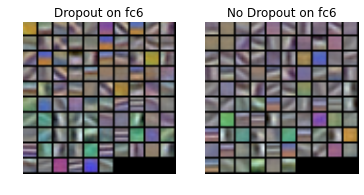

In [13]:
    #This network was trained by concatenating fc-6 features. Prior to concatenation the fc-6 features had dropout of 0.5:
    numIterations  = 60000
    numIterations2 = 90000
    imSz          = 128
    expStr    = 'rotObjs_128_kmedoids30_20'
    modelName = 'keypoints_siamese_scratch_iter_%d.caffemodel' % numIterations
    defFile   = os.path.join(expDir, expStr, 'keynet_siamese_deploy.prototxt')
    modelFile = os.path.join(snapshotDir, 'exprotObjs_lblkmedoids30_20_imSz%d'% imSz, modelName)
    net       = mp.MyNet(defFile, modelFile)
    #Network without dropouts on fc-6 features. 
    modelName2 = 'keypoints_siamese_scratch_nodrop_fc6_iter_%d.caffemodel' % numIterations2
    modelFile2 =  os.path.join(snapshotDir,"exprotObjs_lblkmedoids30_20_imSz%d" % imSz, modelName2)
    net2       = mp.MyNet(defFile, modelFile2)
    fig = plt.figure()
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    net.vis_weights('conv1', ax=ax1, titleName='Dropout on fc6')
    net2.vis_weights('conv1', ax=ax2, titleName='No Dropout on fc6')
    ax1.axis('off')
    ax2.axis('off')

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWwAAADDCAYAAACmois2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvVmwbld13/ubzWq+79vd6dScoyMJhJBAJpdYgBHGlomDHcXKLd+8gMumSCqpsl9uyEty/RBBYpuKQyoPVOqmkmA7D0kZ+8H3xgmo4msaJzEYN4ld9BKS0NE5OmpOu/f+mtXMOcd9GHOtbws1YMcHWbDHqV377K9ZzWz+Y4z/aJYREeFQDuVQDuVQ/sKLfbkv4FAO5VAO5VC+NTkE7EM5lEM5lFeIHAL2oRzKoRzKK0QOAftQDuVQDuUVIoeAfSiHciiH8gqRQ8A+lEM5lEN5hcghYH+XyjPPPMMP/uAPsrW1xT/4B//g5b6cQzmUb7u8EvfAdzRg33rrrUynU7a2tjhy5Ajf//3fz7/5N/+Gv4ip548//jjWWlJK35bz/dt/+2+57rrr2Nvb45//83/+TT//4Q9/mFe/+tVsbGzw+te/nq997Wvfhqv87pNbb72V66+/nuVyOb72S7/0S7zjHe/4Mx/vcA+8sLwS98B3NGAbY/jYxz7G3t4eTzzxBD/7sz/LP/tn/4y/83f+zot+59u1WF5Mvl0b6cyZM7zuda/7lj77S7/0S/zKr/wKDz74IPP5nI9//OMcP378Gl/hd6+klPjwhz/853Kswz3w4vKK3APyHSy33nqrfPKTn3zOa3/wB38g1lr50pe+JCIi733ve+VnfuZn5L777pPZbCaf/OQn5ctf/rLce++9srOzI3fddZf8p//0n8bvv/e975Wf/umflne+852yubkp9957r5w5c2Z8/zOf+Yy86U1vku3tbXnzm98sn/3sZ8f3brnlFvnEJz4x/v2BD3xAfuqnfkpERE6fPi3GGNnY2JCNjQ353Oc+97z7aZpG3ve+98nJkyfl5MmT8vf//t+Xtm1FROTTn/60nDp1Sv7Fv/gXct1118mNN94o/+7f/bsXHJf3vve9UhSFlGUpGxsb8slPflJijPLBD35QbrvtNtnc3JS7775bzp07JzFGuemmm+RTn/rUn3L0D+XPIrfeeqv84i/+ohw9elSuXr0qIiIf+chH5Id+6IfGz7zUGnuh4x3ugefLK3UPfNcBtojIzTffLP/6X/9rEdGJ297eHhfV3t6e3HbbbfJP/+k/lb7v5VOf+pRsbm7KQw89NH5+c3NT/vt//+/Stq28733vk7e//e0iInLp0iXZ2dmR//Af/oPEGOWjH/2oHDlyRC5fvvyC1/OP//E/Hhfr448/LsYYiTG+6P088MADcs8998iFCxfkwoUL8ra3vU0eeOABEdHF6r2XD3zgAxJCkAcffFCm0+m46b9R/tbf+lvjd0VEPvShD8kb3vAGefjhh0VE5POf/7xcunRJzpw5I8YY+fCHPyynT5+WV73qVfKBD3xAUkrfwgwcyp9Wbr31VvnEJz4hf/Nv/k35R//oH4nIcwH7xdbYpUuXXvR4h3vgO2cPfEdTIi8mJ0+e5PLly+PfP/7jP84999wDwJ/8yZ+wWCz42Z/9Wbz3vOMd7+D+++/nox/96Pj5+++/n7e//e2UZckHP/hBfu/3fo9z587x8Y9/nDvuuIOf/MmfxFrLu9/9bu68807+83/+zy94HXLA9ZNvwQ381V/9Vd7//vdz/Phxjh8/zgc+8AH+/b//9+P7RVHw/ve/H+cc9913HxsbGzz00EMveryD5/zlX/5lPvjBD3L77bcD8IY3vIGjR49y7tw5AH77t3+bL37xi3z605/mox/9KL/8y7/8Ta/3UP5sYozh537u5/iX//JfcvHixee896ddYy8mh3vg+ed8JeyB70rAPnfuHEePHgV0c9x0003je+fPn+f06dPP+fwtt9zC+fPnX/Dzs9mMo0ePcv78eZ566iluvvnm5333ySef/HO57vPnz3PLLbeMf998883jdQEcO3YMa9dTOp1Omc/n39Kxz549y2233fa81yeTCQD/8B/+Q7a2trjlllv46Z/+aR588ME/620cyrcgd911F/fffz+/+Iu/iDFmfP38+fN/LmvscA88X14Je+C7DrD/8A//kPPnz/P2t799fO3ghjh58iRnz559juY9c+YMp06dAlQjnz17dnxvPp9z+fJlTp06xcmTJzlz5sxzznfwu7PZjMViMb739NNPv+A1vJicPHmSxx9/fPz7iSee4OTJk9/0e9+KnD59mkceeeR5r99xxx2UZfm817+V6z2U/zX5J//kn/CRj3zkOWB36tSpF1xjBwH0m8nhHnhheSXsge94wB4W3d7eHh/72Mf4iZ/4Cd7znvdw1113Pef9Qd761rcynU750Ic+RN/3/M7v/A4f+9jHePe73z1+5sEHH+Qzn/kMXdfxwAMPcM8993Dq1Cnuu+8+Hn74YT760Y8SQuDXf/3X+epXv8r9998PwBvf+EZ+7dd+jRACf/RHf8Rv/MZvjJN+4sQJrLU8+uijL3ovP/ETP8Ev/MIvcPHiRS5evMjP/dzP8Z73vOd/aVwG+bt/9+/ywAMP8MgjjyAifP7zn+fy5ctMp1Pe9a538aEPfYj5fM65c+f4yEc+Mt7ToVw7ue2223jXu971nIyRb7bGXkgO98BLj8sgr4g98O0mzb+dcuutt8pkMpHNzU3Z3t6Wt73tbfKv/tW/ek6w4BsDDyIiX/rSl+Tee++V7e1tueuuu+Q//sf/+JzP/8zP/Iy8853vlI2NDbn33nvl8ccfH9//3d/9Xbn77rtle3tb3vSmN8lnPvOZ8b3HHntMvu/7vk82Njbkx37sx+R973ufvOc97xnff//73y8nTpyQnZ0d+f3f//3n3U/TNPL3/t7fkxtvvFFuvPFGed/73vecCPnp06efd/8vFHB6ofuOMcov/MIvyKte9SrZ3NyUt7zlLfLkk0+KiAah3v3ud8vm5qacPn1afv7nf/7FB/1Q/pfkG+fs7NmzUte1vOMd7xhfe6k19kLHO9wD3zl7wIj8Bcyg/wssf/tv/21uuukmfv7nf/7lvpRDOZSXRQ73wMsn3/GUyJ+3HOq3Q/lul8M98PLJIWD/KcUYcxhwO5TvajncAy+fHFIih3Ioh3IorxA5tLAP5VAO5VBeIeKv5cF/7f++DwABJCUkRhAwgBiHGEuKQgpCCJHlsuM3P/l1PvfFy7z9r7+N73nL90AQSOCswxqLsw7EkEQwBpy1OAvWwB999o/5xMd/h3vu/kvc/6M/yGRSUhSOwgregTMJaxIxRUKK9CERk4C1PPzIOf6fj32GIzvH+al3/R+85tbTlN7QNQ2L+T7nn77A2Sef5sq85+oi4MuKoqyoC0vsGn7/f/wRz1x8lnf88A9w112vwzuPdR5nPQaj9x8isQ9ITEiEmCAkw+f+8HP819/9r/zgHT/CvXf+CIIFYxAsIiZzhgJi9VjGYAxYa3j4qc/zqS/9JtUs8YY7bmdre4uirNjePsKRI8e4/ugO1x3boSgS3kVWi33m8z0uXbnM42fP8+nPfoGndj1vuOcnufGW70UwGAxkl1ckYRCMJDBgbJ5PA1/87K/x0B//Jj9833289e0/gPSR2AX6pqNtO9qmo2s6YtshscdIxDkoC8sjjz/G7//P/8lf/st38uP/+zs5snOEspyQ+kDqe2IT6Jc9u5f22L88p1kGVsuevf0V5y8/yxfPfoWnd599WfjU/+v/fABrDM45rLVaqCGCJMFYg3UGYy3GWVIKpBT49H/7FL/3h5/lR97xVn7g+/6yboIDYoyOeTp4O0Zf//JDj/Fbn/wMp2+6mb/x1/8aR4/sIClijOh8SDowDobQ98TYY61jf77kwd/6FF979HF+8G338NrXvIa+60kxYa2hLAqmkwn1ZEJZ1xRFibceEUsK8N9+73f52P/3Md50x1v4a2+9D+fd8wfEgEheF6z3+7lnzvKJP/gtlv2Ke+6+lxuuO0WMEYvuR+8szlvKstSfuqKsa8qyoKxKfvPj/y+//anf4kd+6Id525vvYbFoWCwa2vmSbtWQYqQsK3auO8H20aNsbs2YzmZMphP++PN/zK//xq9y/MgJ7vsrP8aRrSOkEJAkSIIYIylGMAcHXEgpsju/yqc/9zs88dSTvOP7/zp33nYXq8U+zXJOs1oQ+o4kEe8cdV1STydMZhMm+ffn/sfnePCT/4Xv/Z67+as/8E6c8yRZT7i1Bjvsr3EhGDDw5FPn+MR/+y888vWHX3BtX1PANqFBRBCJWMCZYcdbEkISizMgXsE0FgnvdMp1YCNGUABBO4ilJBhj9aatxRkLkhQQc5exZtVz+dKCuo46+YWhKgxVaalKh8nAL16wSRBjsLbAGEPoI4u9FYvdJalyIInKV8yqKVvTTZp+xbxZgRj6EHFACpCSXqc1ugi9L3DOY4yFKEQRvb6UIdE5EoLu0Dxp4jBSYYzRiUyCYnWeOLGIWAQU0C1ItCAG60p8vU0XPVcvL2h6R588BgvGcmS7YmuzZLq5STUpEWe5Om8oqwoQjC0wrgIcwzIRSaiiSBgjWKOKUYyQ0HkAoetaFot9YtsT20DX9LSrlmbVEJoWiQFnhLK01HXF5mbNdFphrUGMR9yE5KZEW5NsJNqeSEcQS5SKID1BLL0Yok2IqxDz8jmHkoRkDVYMkoSYIimlDAAomBceX3gdwyTjHFpj8NZ8A2ALxgiiqnocfwxgDNbotk4CUQwYhy8cRqcWkxW6iJBSwhpI0WCMxXufW5ZGVosF8709Xf/e44uSejJhurnJZDKhqCqscYhY+jbQtB19HxDR86vilgzK+tsYMGKyfjfPufiB57bWUVY1ZVXRrBq6rqVd9SAJa4Wi8JR1SVXXVJMJ9aSmjhV93+mRrMU5B1gF2ySEKEgyJDGIWIzxeF/jixLBkVcuIokUAyn2SIpqICZIMRKDArYxIEavPaZICJGUBOc9O0ePcP3Jkyz295jv7bJ/9SrzvT2W8z2a0LDcm1NUBeWkop4pYO9e3UMGzZunfhjDPDJ6zry3BYMgGDH5sy++9q4pYJemJ0kipqCAbRUsxTgESxq1mxBNJJiIJQEKxt4VWGtwgzWTB9UYg80Wt8FiAYtQFAUGQ9cn5vOevrc4nyi8oSgMk9pRV47CG5zXwcFYjLWIqOXedz27l/e5PN1lWnvKwlMWjtJX7Gxu08WCPnq6lOijYI0liC5nDKpErMM6h7Uuq5oMzHnjStKpSxFiSKRxcg2S9HpMBgNEMMMkilrcGLWyRQRJavKW9YStYydIMbK3WDFfrhCuIDES2o4Ut/Bui41ZyXRjgyPGcGTeUtY1xizxNlHYSBIZrSUQxAjWKJBYIzirmzWRsOgHQ9/RrBakLihgr3q6piU0KyQGSmepq4LZrGZzc8r29iZPPTvDOotgiGJJkufAGqyzRAtCIgTousiqCSybnjZE+kGRvUxiIM+J5NWqyjilhAhEY8AoGIF+brhca2ConFY80+2qf8gBbJfRkzJqtSACfYSQFKmtZE4zH0ckgUlgB1CwWOtHt2jwSsuqpJ5MmW3MmM02mE6nlGWFserx9l3SMV91dF0Yr3VU2KJwLTIEIPUixBywsK1h0EvOOyYbU2abW1jnaFeWvjGEvqUPvYJkDPQh0PY9Xd/S9RVt245ehskHE4QkQspeRRrWgjE473BFgfVO95BRSz+GQAwhz5F+PkkkSVorGgQxulcHhWStoaorNrc3KStHPVEFV00muMKznO/Tt0u6rqdPkbbvWa0aFvOltqgVeZ73kx2pEbzFHDTyh9F7cbmmgF3ZRCKSUsjAEzB4UKNQbWZRC86miJcemwfR+4K6qnHW4q2j8F4tdFEr2jilGhCDt5bSOaaTCcYaYhTaLhFiAJMwVrBWmNSeuvJUlacsLc4avLP4wpCSgkfbdFy+cJWZq5jWJRsbEzY3J3jjObK1g5ga6yfsr1YsVg2CobeBvI0x1mKdWjXGmLV1ldLojqmhnQh9ou8CKeT+wwISB4vFYBKYZPIbhhSVJiEfWxBIet56OuH4yevpmpbdvV3apuHy5Ut0yxXLq/uQOkoHZXWE2faU7brmeBOoJxMMcwrbUdoVmbXSCcrUyNq6zoAtCZGEM7qZY9/Rt0ukF1IfSX2L9C02dXgHW5sTtrc32d7eZGtrg62NKWef3MBZS0pKh8WQwCacsVjvEZvopaPvIqtFw/58xXzZ0sVE1/VEefl6NtuDAMkaeIf9lkSICWzkuZZn3qUmW8y6cfVLg8NgZQBtUevPWlz+fEzQBWiDIYjDO4MjH8Oga0xSVupq4IjxDPPoC09VT9jY3GRja5vtIzvMZhuUZYnBEEKgXXXE0NO2PYtFQ9f1iOj8e2tw1ozXlxDsAUtajCENlqNRwNO97JltbrJzbId6WtEslzTLJavFgtVSSDHQtT0hRtqup21XrFaeZrXKAyZ5OWZFQSLljaTAmy1lb3GFw5UOV9hMMen6Uqs5ki9UDRMjeu2jxyO638YsGIP3lnpSUE+32NyesX10h629bSZbM65eusT+5UusVkv6vqNfNqxWLatlM1rKkgRsXieZPhsVUMoe1bDFGdbHi6+9awrYdaHgFESUt82L1qCb3uaYp3LRiejAWzBYqqJmVm/inKNwntJ7vHNq1RnUQk9CioJD8Nbgbb4d68DXJKxq4z4hJPoYWbVCVal77q2h9JayElZNIEZBusju1RUTN6cqPM1WR+wD02nNZFqzszGjqGo2ljXzVUMbEletofA+b8IMtqIrV2IkhUAMMWt6veaYDKFPpJDGhvHG6IYY189gyuWdrnxl3shGLTOb1XNd1xw/foLY9zTzBZcvXmL3yhUW+wvavSWFTZjUI0SwMNuaUZSlcrBEStmllgtEEVLKPDZ6H8Ya3Xwk5bLzavSsAN1wqes03hAEK4nKW3w5YTapOXr0CDvbW2xubjCdVlSlpyorXbwYnLFkh1e9KSwBixGLRCH0cdx0MUZiDGuX82UQSSHztPq3QUgxqbeUATvFnhQKrFOrNqaY3eNESlG9xHw8OwL38LeC4UAGDpKS0HeRtg04C8GrwaH0IOsYB2rhgyGh3qxzjs2NTY4dO8psc4vZ5hYbm5tqWWMIXUe7bFjOl8z3Viz2liznK7q2QzTMQ1HoOlAr1aobP6CLUQvb5jsxGLwz2Ru2VGXBZFpTFJa6LggbU5aLmsW8pFkpJx1TUH44Qd8buq4b731QbGrmKUWHBesMzg80ZP6dx8QYSFnBt31Yj/HgJWTlZpIM9tYBCxtEIl2zpFns4QqP857JrKaoCuppxebWjCtbE+Z7uywWc9qmpW07jLPZkjYjSJPHwVhd78YaxAzebL470RjIS8m1BezKkkKiTxBRoMoGNcZEBKv/BnenUMAyxlCVEzam23jrM2AXSk94tYT7JPR9JHQ9xIBJPUYsYDC+xNcburBCJEpP6KELgjGRohOKwlBkwK6qyGLREWMi9rC/11LIAm8NbdOSYo85tsNsUrM5q9kqSlbtjGXTsbdsEYSyLHQtmAHsspscArHrCV1P7AMhJGIUpUOi8t8D9+4MFG5gMZVCMXZtpUkeP2wcrTNndfHWdc3xY8d1w3Q9NkG7v2Sx3Gdvbwmxo10uCKknmsgpe4OCr44mRbpCnZ4mZrd+2PyDBeXEIiQkhQESKGSegSuSQg+9YCKURiirgo2NGUd2tjlx4nq2t7ep6wJnDSIR53TpOWsonNMAlAEHOCxWstKLCoaSlKPVgG18aaLvGkuKrYJyktH1jQNgJ7UBg3M453HeYr0lBvVGkiQNvGXLztoMIwMrQv4DRqtvPG9KhK6nazqsjTjn6L3DjyBlMUZ/kKTQJhqTcM6xvb3N9dddz2S2QTWZUpQ1BghtR7dsmF/dZX93znxvyXzRslh0dF2HIDhrKAu1DmM048WOTvxAX5vBQgVf2HH9em+oqwKpHIYJxhia1Qbz/Sn7u1fZu7pLs1rSrpb0XURSJPT9OAwmw5ohGytWLXhfOIrSU5QeX1j1OjKNChBToul6uq7HZiCFHJ9JCWRNt+gYy0gLphhZ7e+yd+kCvq6op1M2t3aYbm9w5Ng2R0/ssH1sk6tXLrN79Qr7u3vs7+5T1qUaptbgvAK9ArYGG421GSHWy1iyorcjxfTCck0BOwLJGMTZkRLQAEtS7tgkNSBFocEZtS4RwbQ9Mm9JNhJsxLgI3iFO76YLUQG77ZHQQWrp5ktICec9ZT1RyyBEbAiYIpCiLgRxhoRa/iSgV1czDSvPWJIoF75aBfb3GiZ1w8ZGy7QoqAuHtRVF4UnAZN/jnU66M3mxpIiEROi6EaxjSOugh4jykDnTAMBYwbmoOj7zjXbwpWUdGBksbBCs7ZVDFUtKjo2NDU6ePA0RUohcKi4h8RIRy/6y5cLFXWxh8d4RJdK1HY6eGVfZ4RnEoS41djA6FASsJUkiEfJrQmkWylFiKK3FlRaPo/KeSVkp/bG1xcZsg8J7Yoh0oaNvVqwWCw2QWYf3Jc658X4NEUmBFLI7btU1LQqHkPDeflNL5FqKWA2KJ5NIRteUzufAiSpoRxGMONR/OBCEYuBi1y/bA7b0aOFly0+5cUFiILQrQrPEGkdyGitJ3hKdWtHOewW0bOGlEJGkQFCXNZN6grOO2CdCt6LvelbzOfu7++zuXmW5aGhXHX0QZFwBw4XH/Dsr9TXHs/4t6cBNpMzUqKXaNXOs00Co9wWzaUVZbFNVjmpSsJzPWc1Luq6l71qKwj9nQAYqbsyaGjn+bFhk48IOXi5mpCU0WSEp/cAYFOI5f2ZefgDRFCPL+S67l56lqGv6ZoaVBGlDeWwik7ogbc3wTmNlzsFkWo1ZP2ORkVmrHZM59yG2MQQlDyqLF5NrCtht5lexluTsaEna7OobY8bBdAd4IxEhLRvi1X0iHmM8vXWZ9lBXpusjoQ+ELiChhdjQ7mp01ntPNZnqDcZEHwI+6udTjBgrGBIikUiiE0OfPX1jLa4oMM4TU6DtIvNFy3TRsLFsKOtaLcHSUZaOtmupBs8gu/feoJ5F3xG7ltAFYh/Voh4iwRiMdVhXYJymShmbsD6sF2Te3ZIncbDd83YHEtZ2YNRqbzrheLXB9slNnNGAp3clMULoG9rYcenqPn3sKQqLcbBaNXgCm1zhqC1zREw9FRhcUQ0UJ0kjX4gRKqMco7eWynoqX1AVFRuTKZuzGRsbGtAqilJd02bJajlnub/H/tVdUoxYaymKUjNqBj5XIpJ6YuiAhHMWXzjKZME6fOfUK3u5xJnMq0r2OiJY5XnFZk/AgOQonVpwB63mDBWiFp0GCfObBsipnFHU+4oxZ0iFQGhWhNVSA9rW5gyKHI8pS6QoMHZNY8XQa2qmsRRFQelK+iD0fUPXBRb7C3YvX2Fvd4/9/Tl9H5UmcAWuqDA5cC6S79PobxE1esxgQudA+Cgjp670ULPcYzW/SlEWmLqm8FBVJbONTaYbJZtbNfP9CfO9mtVyyWqxpKqHlqYjYuveGKPi6z3CaPiZ7GV8w/oQybpE52wM/GXQHz240X9URbPY32P30gXKuqZvlpjQk7oVcWMDWzgckemkoCq38B6sSUyndVYYw3znnTsAcz5nYgDq4XdSb/IlEPuaAnZvPUZszjnURWiEITeMITVIMwWgzxlQpEQ/n7O6eBHBAw4SGElqfUkiJHWVU0iZV+hpF8tRU8UY8mIzmg9tFIiii9k6TWoFkzQ9znrEGFwGkLKqiTbgbCIh9BGaPrLqOqp2tY5aS4+3aeSSswFCCIm+T7o5ohCTKFgDYixiLMYVWF9jvU6DtQnvQ7ZgUuaN127amtFUTl5IOKcURdf37O7us7O1jZ9V1JMJ191wA5IMFs/+/i7z+T4igeUqcfnyAgi0TYezwmYdODbtxvmAtYJImBwPSISUxnkrnAZbS++Z1RVVWVGXNRuTCdNJRV16nJEclOxYLvZZLfZZLeZ0bTMu1r4XQkQVuwghJbqUiORAUulxIeC8pXAFRVe8rBZ2Pa312iVlK1ItSWtyPrakMQXPqL2CL9x6TA8E6UZcGS0xFLeTwTKkzh2416S0lAbddB+F/LbrOrz3ORdcQbxZLjX3XyQHExtWTUfT9DRNz2J/ye6VXZaLJV3bIznlr6hqqnpGVVcHLFlZX+MAnAYGBX+QIx4/j1qqfbOkWewT2oLYtoS20dzrqsQYwRthUhWYzSmFMxTeUFVFVmpKI8UMqmqq6LkG40bvLxL6CMZqPGqkkwxjjaABix0B22Zwt14BNSaysaP/vLF44/BisCERVw2tddgEviowzmKt1oNMi4I0rZmUxWh8DucdrGidajV4dA1lwE553XyTDKhrCtjBeiyJMbySskuV1YukNcGfEnSRbFUI3XzO6tJFEp6UDLFTnjQltRhSHhCTBisw0SxXGQQifd/jfU5tMgacpjeZpO6pZAubHMQTVwAaGCjKkqqqFdzpwQR6gSYkVl1HuVpicw6sxB5no15DXsMxomA9ArYuBBloDeNUmRQlrqyxXvlvZxOF1/tDEs4pRRSzF4KxDHntkBCjFjlGaNuOK7u77GxvUbkNirLkxHXXY/EUtuLZCxcQHIvlnKZtuHJlRYormqbDW2FrEjk66/OCkWzsKYgkMQQZ8l8jMVtXhVV6pPSe2aSiqqbUVc20rpmUJYW3GIma07tYstjbY7WY0zZL+rbVHOYodF2iD0BpMx8e6aN6P8ZZXFlguw4bLd5aiqrEupcvD3s6mzKYdcZpcM05DWIPVmAIkS5qgFFSpChzwYnRNTmAyZCTOyDIsNGtXa+nNWBncEo69wMNG5MWgyklot6Hc2p5N6vlaGX3fU+zWrKYL5nPG5arjuX+ivnenK7tSKhicUVJNZky29jMaZ9ZgduBIjOISSOtAEPYLHsS+T5M9qQlRvpmRTvfp3cFvXc0C09ZFdR1RVWX+lM4vJvgnabhVlUJqOWpWR4p51cfwI2874Zso74PiLXElBRqssU9aEaDBmg1YM86c2Pg/6Pk9GOTPVRP5UomPXOXAAAgAElEQVQKW+CTIbU9PUtMEoq+pqhKitLhCwveQzZU1irWMBS/jZ6ySXlfZUWTZLTwUzzAybyAXFPAXrQ93kLlNXneFKVajzoNBwDbEEXoBw4HIYRA1zZEcerSd0EXXuw0BzMHV5x1WXslumxJjLnVaJBHsJm7ymlxw4QfsPI1OKNuZOkdk7rMlmbA0OO8I/SB1XKJkZai0Ig0xuCzRZEksWoa9ucL2lVL1/bEuM6zNtbpYrAOawu8KzJ3q+BjTaAw7Wg928zHYYa0L5MVtr4fU8QQMEbo2o69y7tcqifIas7WxoytjQ0mZcXxo0cx1uDLgt3dXebzOc4EmqbLGSE51TAXJQzEqp5aSOTqSmdwthhdT2sdGKjrks3NWb4nBd2ua+i7hhQizaqhWTW0qxVd2xD6jhiVq7fGUFiLEVVysQ+ErmPV9qxaje6HoJ/VII5mBbyczYeO7myR9a5mJRRuDdh5Rfd9oAuRFAOSIrNZDQwgA9lMzamtKNAf4Is1CLU2ZEE9s2Q90Xo0Ez4rhySEIJiUsCEH5LLHt1wt6bpASsJiueLq1T3m8yXLZUvX5T1jDL6qcUVBVU+opjPq6Qb1ZIOyrHWuzZr2EzE44zRCPIKhHQ1KY8BYQ+G1VgIEkwImdkpF4hDpCdLR9A2pK4hdOeZP29TjTcSMxXJJM4MyHWedBhudtRRloYFdO4xbUq5d4mCWaeZTpju1QCkrHbRuwjrdkxijRUh2uAmNzzgEYk+UCBJAgnr5oaNvC4rSU1YeTKJAcAeckBTTmvrK7M2gOpRiXBfHZSLmJdfeNQXs3UVL4S2TylFacPhM2ie9716DcJISIRhWXSJkU7Tve1ZNQ4gQov4d+4D0nfJpRvOdvS8QIMZEm5P8B60VJRBjypNhnwNIQk66B8DQD8a2MTijlob1Pi8ug5hA0zZ6npVQ1o6q9BRlRYpKY6SUWCyWXL26S9toDrGIVgQ65/CF0cDiSGTKQGTlv3uQhVpQIlqaciDvdaQqjGh+u0SStIgIXdtw9dIlSgPNXkE4eowCi7OWjY0pySRM4TDOIcbRLfdpO0jJYAXakFh2MacYKjiOATRjMo3jwVqEXOiSXWHN7y1JUXm/NvS0OZ2xa1pWiyVd22p1WQyEoEUSSpEp0IQu0KdE17V0TcNqsWK1alg2LU3X0cdAkphd8pfwGb8NsjmrdXycwZeOstRsEOfWgNuHQN91o4Vd1epFxZToQsobVDI25GD7N/Dbg8scYhypgB7oMgAMlGAfIn0XxmwiQ8Sgc7lYLmi7jpgi+/MFFy9fZTFf0jY9MZmRP3W+oJxMqGYbTKYzqlqzSKwvMvWX0xFJuazdrj0FAU0jZEQkrbBdewQxdMS+IUUNske7poN8odZ2WZUUZaFAlkKmLCHEQNtpkU1KPZiEcZLTGY1eW+wJoaPrLIJmmAz0aBcCXQwUxuUc+sEYQmklK7laFEJS2i/J4OFEUuyJIc+Xs/Sdw3Yt1nuMs5RlQT2pKEqL96iLjZa/d12HMTZnEw2mkI7TANhjEq0lK6YXB+1r2q3vR3/4lEb4nYKgHXw8NWk1Cp7W1kQf4KHH9zn7TMupE0c5vrU5FghqhkcuP5dcBWYt1thsoAiX9+c8e/UqJ66/kVM33coQiR16YxysIoPhUnSFLfZ3eer8GUpjOXXdTUwns+xKpRy00T4k1mrxiHOD2+noQ+Thx89y8coup07dyM72DjGXt6rFryXrozY3alVb67DWc/6ps5w9+3VefeIUt113KrvVjHxhVsAHZk3vIUni4t5VHnv2SVw95brrb2I6qSkLx7SumU2no2vX9h1tp5VYTduS+o5mteTC5QsYabjrlh2uO1If4Nmeez7N7VWAHgIzD525zCPndnntbbdyy+mTeo2DyZjyRo26eVLIVZRJix4uXt3l3LMXue76G3jtbbfjCq+8bwxKiXQ9oQuEVn8P5d84Q9u3PHvpWebL+UsGaK6V/I2/9qMKShkw7Jj3O1jY2SpUchIR4asPPcojj57hltM3cOrG6xgjBQNtPY535rchW91w6fIuj599mqqccuONpyjLUhV43kMpHaiWzd/WoLrQh54Lly7Qtg2nT93E0e0d+sFrOVAKba3FF4X++BLnPdYVPPXUWb5+5mFOn7ie156+FTA54+JgCPzADYz8tWF3sc/Xnvg6Xd9y+oYb2NqYrQOCQ9CPXB3sc8aUcwyZII+dOcuZJ5/i9MlT3HD99ZqPH4N6ZznzxfuCyWRKVSk9oddtefbZZ/jqw1/B25IbrrspF+ENtu2a8rM2p9llKioloelazp0/w3y+yy3X38ixrSPjBjR5njXXOvPfTlsFWK1p44mnnuLhrz/OiWPXc/OpW8fkim9cqd+4do2BxXLO2fNPsLt/9QXX9jUF7NlskhflGFl5kU8OAKquZOgzH3eApxwLUuxQcnuA18sg3PeBtuvx3lEWxfp0+f3RkOXA9eT3Ukr0occYgy+K52QhmG+47gHkhzuS7BHEGCkKn/sevMD9mhcegb4P9H2P8xXelevxOqiRDx7tYAwqBkJoc2DLj/TKQQBYw8hzX0si9H2HpDj2nBjPO6YcyYFvMS50DBrkiZHCew12mQHUD17mCy2vzPH2Pc45ysKvM4QOfMWY5yrY4bspJfo+5Jzxbz9gz6aT8fq+Ven7QNcHykLHSg+w/vVSdxGj8s/WaEB8HXAdPK7BPF8vmGFcJAl9UAtb+9u4cU9+I630fJpJ8trscquIHNDMZPbIbTNuIw7Cks5TDyJKXWQK7eD5jBm8CbXiZaBFkxCSgnNZlBQ5zvPSsj53jJEup4W6Axz28z4+zMEwhpnLGAqdyqLQ+37eGV5c+hDoQof3jqLImS7yfMDOZ37Ovh7GLGav6hvlmlIiP/pX36y8rS8g9w95vkgeo0gfer70pUd5/OvnOXnd9Rw/ekzLYb2jKBxlXTHZ3GS6MWU2q3BOtGAjRUxMfPXhx/nDP/kKt9x8irtef3suJlDrPIVA6IUQ0EAmHklGU31i5MrVSzxy5hGKScntd97O5uamFq4YoxYxOrTDYsoRC6y1dF3LQ1/+CpcuPstrXnMLN9xwAmMVPHXM1/mioA2ArFV3UkR49NHHeeirj3D9DW/gxtN3Q7bAU1K+cFhVQ9m+tbk9IcKVS49x7sxn2djy3HL7q5lOJplvdHjnxqCKkHs9iPYpsdaxWiz56pe+wP7uZV71qps5srOjgcCgJfN939Nltx4E7x0+A44vHGfPPcVTTz/Lq06f5uZTN1HWG/hqogp1cM1H70SwTimTPvQ88eRTfOXhR7juxHHueu3tlGUFxo9RcpuDxUPu/ODKhtBzefcqD3/9cS5cvnItl++Lyjvv/d5MY9h1cA3WdMAYQFyD0he+/Bhf/dpZXvPq09x266l1iTKgiurAhj4A5BjDU09f4isPPcbW5g6ve+2dTKczBKuB60wLel9kikS0orbX4O1yueThr3+Ji1ef5ZbTr+a6EzdQlGtL2jqnfWKsXee354BYSpHHHvsaX/7SFzhx9Dg3n7xZO9JNJ9pZryqxOTAeegXXoZgoSeLKlSs89PBDiCRe/7o7OX78aA7WW6wzlEVFWU+U1mkCq8WS1f6C5XzFct5w7uKTPHP5Ane86k5ec8vtasGasZZzVOajfZODeCCcf/YpvvjIVwl95MhshyIryWEPDlXSGh8yFFWNLyuw0KeeixefIYWe773t9dx6w+nsbXNAJ669k2HuhqrOh85+jT/+2he4+eabeP2ddyqhEHOvmcHSVgKdodBpUIS7e7t89aGvcOHCsy+49q4pYL/p7juUZy4nGJv54G+wMXVtCyKBtm24dOkqZ888zbEjx7j1ppspvXKEdV0w25qxfeIEO8eOcOTYBmUBKTQQAjZEROBPvvgwJ2+8nre+5XupK4dzELuOvu1pl4GmSfRS0qeCmLzWAoSOJ588w5PPnGe6PeW1r38tJ06cgNzcyea+DAaj3HhSXtxkimO5XHDh2Qvs713l5ltOcecdt2FdqUoqb+KDyfzaIEoBewhUPvzQoxw59mpuu/2dYD0YT0xWlQoalLMScUa0xaXVTf7kE7/Hhae/wNaRkte87rXs7OzgjfZeKYtCK62c1wImTG4WZfHWs3v5Cs8+dZ6+XXLLLac5fdMp3Tyt9pRomobVapW5S6GoCqq6oqoLyqqgaVueeeYCN5w4wRvuuIN64yjlbBtrNY3SSsARsTbhbMIX5Nz2lqIsePTxJ7ju2DHe+Ia7mE43MKYgJrTdgHU4Y3I72oBzyre03YpzTz3FUxcuvmyA/eY33nmgveqaGhjS3DQPeuCm9efK1X0efvRJTp+6nrvf+Lp1ZeLghwwW2AF+ZOCkv/Lw13n8iSc5unOUN7zuezhy5BjJOKwvcUVFWdSUZaXFMH2kX7X0ja75q1evcPHyM+wtrnLyxpt4zavvpKoqyrqiqid4X2RqQesKrNM4h1Zkat3Cww99hZ2tI9x282s4cnSHrZ0tZlsbTDdn+Bzwa5uWvsvVwjlIeO7cOc4/9RQigdfdeTuvetXNOWisBT7T6YzZxjZ9m1jtrbh68QpXn73ElYu7XL20x3y14MLVS9x848285S+9WYvSbAbsDJQD9wvk2I/GYL74yFd59NwZoovccOwG6qJa8+0IIWjmiTHayaKebVLOZuCMduFbLojNktfd/Brecsf/NgYlh0wPsOvA8ADYVtdESpEvPPYVbrj+eu7+3jcioh5WygkICtom9xzymVLTZnHnnz7P+fNPvjyA3fctNkaikEHIccAHGa0TXZdalCF5GjQ1Tt+zVuiDNkuK4w9Ea4FSB9NFjNXUvMIXzKYbTGpH6Q2h6+l9z263oIkrmlXHogtEU5KSxYTIokmaeoeQjMbgc+4hBhn7FCfRvGQETBKSREKmFXS3OsR44hA4grGzm8l9QYwo6Gd2ep1FIgabNOdZjNH2kWmo4gKThtKS3I5TEhLSaJEWrqAsKopsdRW+0GKJshyLGmIAiXpMn608aw1l6ZhMCmIQvHOaPldY6krdYO89VVVSTSrKylOWno2ZFichkRQ72mZBEKNA4j3eCN6CzyBkMRhfUDpLUWo1WAIimjY4VtAZo2shqecl5gCv7jxmoF9eJvG5J4R3dnB0DlhZjGt6qEbVsEsuGrNasemGdLJ8TMmxnbFM+oAOcJmG0tCPRRjiIEMHFu10qFYj2m9kpYDdNZqRA2izpL6jjT2xb4h9l+k/bQXbB/3ty+LATeSvxux1dVGzeSKjBzhYmkMF7xBrOpgjHWLQrp3iM+/rsb7EFzWx74gRuiawnDeslh3Nqifkpmi6ziPJmnWQXnLangHnMgedKyu1blovfTLb4IZTN1GVFW2r9xz7bsziAf1gMako6xLjDAStpo15XsbOe8OpAW2zd5BqEURMrmRODNRd6LXvTAw5cDx63OrlOu9w1mdFabWAzL4QE5HX3p9tyX5r0ne9phglcusyvUEF6CH3kewOCHEoO5Xc3D8anNWgawyijZP6hATJVbK5xaqNWIlZIYBznrqomFYFVWkIrqSnY+U7jDRajrtM9EaI4iFGll1+mAGgaXNDhscaJBkyNwb3CNDdqnnR6gY7jPWaCrf+hH48r+zhmPnFkatyRihM0uwWQZWAWO2twbAgtYc3RrApYbL166yjKifU1ZTCK+/mfZGbwxf51EJEiCQkija9EbUEvfeUZUFy4J1QuoK6rpFc6l9V6gJXdTE22anrSb5BLV7q2iXSR2xRYQvNwy69pTQOnCZIeecoXIHPxQWC5t4HyeOYKaCUcu/lNGTe5pQyq9WOfyoC+c9ZND/ejo26hiCxVv4NlbwDCA8usM7xwRxpl1PeDiyGMTtn+I6gmSRjAEEbFWOtAq01HoNDkiVFQ+yF0EW6pqfPPTRSPNgNUjnS0EEMPd5rVa/LQF1UJWWsNJ/bGU1ly0bF0IBL++Gg12LWNMrIY49W6Do2NQQSjc29uKuKoqopyopupcdr28By0bJatBmw14pGco+bZMhth9PojIw0oYxRkDFeNZlOue7kSeqqZrVa0Lcr+rYhhECIcTTEfF1T1DVYcK3FF542X3uSdYbHkPW6jhUdjB/k4risnGVMRzRjtepAnWAGTzuDdgZqd6DfyQvJtS2c6QVjEy7FnGBwAKh0lHFOaQUx2hv6YONvxcCcCSlmdCeMgDWOwnh1lSNAGvsxmCSYqIrCG4u1gvWe0mXLBoEUCFHokh67iylP3hqAtSLJ6h6RbHWPvKRaud4aQmlG19g5q5RFXmDrVDzWkRm0dNkcNMeAyvVsFkv6ZOjjUKxicNZr3qtlPC8IWKEwmtvqi4rZbIeNjaMUVjsbOue1ZNmYvNHC2AI19oGu6bTpPqiVZgqM07xo6/W83hUUpT4JxDuLdWilXeqxJldoGrVo2nZFG5dgPdYXVHVJrEqSeIQSXIU1JWXlc4BUM3dUOad1TEEG485kwE44tJGQVhB+a8GfayUud8dzB/S2GK1MXD85ZkiDA7K3RQZzn5sA2SHzLVvQxjDGJlIa+sYNYyGAxdgC7yt8UWJ9ifEFlgLEEUNP30b6Vr3RsdFYHiybueMYledOMdJZ9Qqtd7jCU1RaxOIKjykMbbN6jqUcs3eorIC2cfCFxfYdxnYa98lKZqjUVWpIe8aUVcVkMmMymzGZzKjLCa3pkV7oV4HVvKVZaiVmHC3sTHdYsx6nYUx18Ac2at36NVv4dV1z7MRxtra26PtOU/RiN3xt/GzIXl6UwP58j7KuWeRxH4uCJJdBDDTYgUDluL2HCUO9DfVu7JgtNmRaDft+VOA+54EfzO98Abm2FnYAYzS1y5i1hgHRPgtmzWeBllcPWnUoDbXY/KACw9AhXYZdLoKTYbDW7SolCanTJ9j0Bs31FbW89Qk0gcJH2hgxKYFZZ5QYo48uKr0CpDU2d5bLlvCQu5MtQW8NsVceCoOm+HgHIed5H4ikM1gHw/+NHBgTqFzDVrlLF4QW7SWR0GKVsXcEIMPzNBLUdok1CW89dTllUkzz030sViwmJEQCse3p2077rwQtTunnc1LQ8nLBAXoeZzyF9VRFTV1PKMqaoiyBhMRA37fZw9F79kVBVZU0/YLQNsQEWEvsK0Jf0veevq8IsSbFGtDMg2Gz9H2PGcqJk6j1P2YQ6L06l1tSimaIPDeN7dsrB/tZaz/jXHAx7FxQ6zjJ2qMcvqtvMgTOxp/BuzbrfhnrfNzBOnd4Vylg+xLrC4wrkWj0MXtdpGsCfaeZVumAZrPWatB+NsUYoety298+Kj1nDNY7irKka0tc6TCFpWmW62wFM5RPZ8A2JicVWO2EdzCzasQznUdnHd56vCspipK6qqmKCm8dJpncjEqfVtR12tgtpqFeQvlm52wGbR2TodWFGLAyoGZuTZGDe2VVsr2zxbFjJ1QBmtyDJ3dRlPykoGXXs+r04QmutFqSnyfM5OMOpu9obOUxIceHDOv7BXJ9ScAYR0po3GsckyHNVxuxOW9J61O8qFxbwI5DNGDdgW50j2AEOFd4Yop0be4ni3a904bpasENXfCMiIJG29C7hCss3mg4c6D/Qi+sVpEUW1ZW1IV3BmM99XTKRrQEY2He4boE1rGoXH6ggWdWT9iczrA5m8LZ9bP7xFqSzVxV1P7QqetxmQ92GbBlSEo+OAOCKqqBu86La2iKVdsFO+UzdCbSmYR4DRBa48en2GCM5iSLcmazYhdnAhZDhcX1kdAF5dGSAqxEBeu+6wh9rxH90NJevUzqGp0IPMYUei5X4FyJLydU9RTnC4x1yv11UTd5EG2Ti2EynbB9ZJs2BFarFSF2OctkSbNUzrYoMz1TFVS158rFZwhBq1dXqzmhaxVkUkLiMG4mP+mG3OjIgAirxWJsV/pySEoJrMVKQobAYbbWBvpsADQZctczz5FEAWLY4uuGZ4MbL/kBCGmkFuKQOWMdRVFT+BprlQpBLDEkuiY/mq3tdP5D7m+Sr886x9bONkevP8Fiv2Q5dzTLJWkZCF2rlqA1dIWn7QpcoYDdrjJgm4GJGuoHx24eI/0wWNMMRlIeDfU88/NNxWiflKSecOoToYuENq+prGPGRlICfYw0XZ97XQ+KfOCWYXhc4KAwtPpTx885x6Su2cjNmmzh9CEHXsvJRSISA4vVikXTsGobEj1lVY43peyHHY+tO1tG/azKaU0NDRx0SonY9xinHqwRwQo5f9+OWDEoPBmoq5eQawrYvt5SjRy1YdMQmdBuX1lTG33YZwiJts1PHsmcVJEzHLzzuc+tx2JyAKSn82jrSmcoRuIP+l77W68WAilS1Y6q0gwV7wumE7VRrbHUbSThmVdOC2KMpfIV03KiC81qUGAokknGIFaf/Rj6gKSg1ixD7wHNV1Uwi8913Q9we0IeC5NGC6yyS7b9BXoTiS6pBcuQpaKVlwNgx6TNhWbFHs5EiD2s5iRrCU2HhIhJUYMsodNClH54rp1Wb0kzR7KF7YzDmULv1RYZtD3GOlUsXUffNXTNEolRH8yQgXUynbJz9Jg2cMKyWC5YNU1WLLpoiQHpe0JjaBeJ5f5e5uglPxRB0/cYIv0yEAG5LN7IyFG+nI36YOAxc7mzkpL6OmvASaLBY/LTg8YagNFoUYUrA/8zMoFDi82h3SZjKpjJ3p61+hQZZYsSfdPTLlu6VUPfdPo4LFm3NhgCc9PNGTvHjlLWnnpaslrMWc3n+H1P37X6FJ8MfAmBqPMH2bF0mv2i+dJpnfUgWfkMqYomK5/h1sza8HHG6V4RkBDpe31Qc9dqkHH0OwbqAMaGYGOQQAdyjG/YDIZG1iA/xKOGmIIb+3K7XGBjcYUZn6OYTAEu4XxitSwpCru+AZMPKmvAHidMb3CkfDVNT98YPEhnM7gP3obT9Ngi/wythWNW+i9F+F1TwN48dmN2Z8K6p2+K40MxYwije5+kxdjEOnCoxH9Zaq1+UbicgqSd+0KIdJ3NbppTFzwPZtsG9vZWxFwxN5l4/alLqspTF57CWSZFQdtFul7Y3fX4XL3kTYG3JQabXTmXeVpl1EWyq540PYgcAcYo8BWuQJ/baEfXPevc3NdNc0eTidkK0oVW2SWb9hJYQfzgzmb36cDz+aJI5tssG8UcawKpWdJdfpqu2adrtbm3SULIvYUV5NMY7LIx4KXD5jLdwjpKNzygeMjdzkUXsadrGj1W26jFZqz2MjEwnW5y9Pj1lPUmmzsn2NvdZX9/n6Zd0XfaO8RIzI8X67VFaNsikvDOMasqnC/oXGK9XnWnDLSuG+MdhqZr18UnL4NoHaH2TEdMfs4hI1csmcpKOYYxPIdXZU2GSLaskTU9Nn5fzPrpNQfAb6iai2n9DMlmudKnw6xaQttCirld8bpRrrGWalKxdWST6WZF6Lfp2xXNcsFiPtenvnQdfUwaBE6RmAI+F6AZq/vRDhx7TNnTiuoJZiNrqAQ8MFh5vbjRCHDWYSVnb3Xan6dt29wzxkI2UNbHMTmNdVCWKePGAQc2z8FQzj88iOP/J+7NmiTJrvvO3118i4jMrKXRDTS2BgG22ABBipCJQ2oxk0TJRiabh9FHnRnNvGiZESlwJ0iKHGJr9N5d1bXlFou7320ezrkeUQ2gZfNQLIclqq0qMzLC/d5zz/JfSk6kODKNtyQKTWzpUrccPoYERvaGLYnWRboms3D2KurFHKWgq6/qsZ9VT+4i+ionH77oXMM6yaKdc2I63Ao0tmnFh7YmAf+j4cyL9XRcX4iWRwxUGyxZvWKXFaNqLZQEtpUBmxP0gG/E07HvGtFqsBZnpKTKCeJcsC7LTNBYvBFVOYB5DtzcHJjnwDjOrAfPeuUpFyu8H+i7hqbpuDhzxAz7MfHs5lJaGSmTxpm4nwBLwpIqQcLWZkYhhUCKgZQi83ZPDlGDi0gyFhU0Sro9ZZ3bo1aHkY3okMEoQGtmzvxuOWVr39squF7Mi40GbEPMltYesCaLfvS8JfkCOrwVmdmZnGYtac2xPYSjD430hlNWdqiXfEVJFNZkchYNiDjvxb4pCeOuyPSR2uSz1jMMK6xraZqOYbVhHA9M40EU48KEIRHjAaaookDSguq6nqbt8W0B4zAcab9on7IOsaw19Lu9zj1ezlUz66XDXGrOVYfqVfO8HKUVykkQW4J23Z/m9J+oKffxfyffq1mbWM6p2uE4SbAOgZyS6LU7mXdUB6fl4HMW6zpxSFp1bM5WnF1sZGA8TUxBjY5DIMwzw9BTCSHO+xN97KJ462O/+Kg/c7yOn68ebtrGUQPqcR+ZxkAIiVyMuEW1hTYZIdxRM9MTCJ05Dh/NSTZeh/zHLBhyCoRxx7RviTkR54YYlPBzErBLPTRNxuYJU6r/42lFxMnJW04Ko1olAtkcs+Taq3Zy76yXdmPTyNDdKbt4GaqqxOrnBe0Xuuqt78EmsnHa06oliiGliE+qEZESthkpeBFNN4a2bYVV1Xoa7yhZrKNIhhIKyWeiy1hnaBwUL5hUMExz5OZmzzQF9uPEPFnC7Gkay3rV0Kx7Ls7X9Ks1xjXc7hOPrq5o25YcAtPNLftuoFSXcoVYY+TGZtUkFrnYxGG/I04yebYFHEcUiARHAfxTNCMny/CjCEzNa8+rdZm1F6f5kvNRGEgHjjEHYgGTs5R/xuLMhCFTTCHbhGmykIViEa1wnRNYL4QI751YclnHbDK+9Zgg9PK2bWXTWCfStBTIAfKEYcSahHECLZTBmwp1zROH/RZjpEo5OztnvT4TOc9xZHu7ZZoO5DwzT1uMszTtM13MDt/2ogyHE41w10iLxppFL+MIH8k03a0oBb6kKxeBHCbN6OwSUGt2acXcoHr2ldMdWP370EwN3di1bS9iXFl7wKYUjiw7YR/mFHV4XEghL+2unKqanViuGcqCUa562HGeZQ86S9d1uFXH5mwgpUiIM9M8cxhnEa6z80UAACAASURBVFuaJjZnq8XWyrpmGS7KMFBbXvno11qv00JpEecvhVJEOCxGQ5gy45iY50zMUFyDbQea4sF1+Mvu5K7ZpedvTtyqzHJPzXKPqlQqQI6BeX/D1FpCTlhv8QeP80YkUYuoACaFUDadI017SgrHz1FnE6UeP0adoNC4rC08aW5TXXdOD7qm1XXtvbJMBSVVqFVUVk2YIzroF10vNGAf88QjG0yo0k70qbOgNHLOGNeQssUq9746motJbB28ZBERCpHsDMkWos0k6yie5WRKQYgDU5CJ+WidltKJOUJByrO+7/FNj3GF9WqFc440j4y3V+wbR9ZMIMdj7znXA8ZUodbE7nAgTNOS0TQ66HFWyidjhaRSSsE7dXzmGPgW2iwijWmSBCao2YX87mW5WCmzHAbrjuVZcUXuQ9aswyCwr+LVW65ZRKsa62imTgaZWm9XuhA5YaKBkiDNxDCRkqA66uCvlJr9wWGcuLnZ4X1L03b0/YphkOcYQqTrV0zTSMwzYdowHlZsHl2paE7Hen3BanNOsR7nWpxvlLzjlj5pVtGfTKIdrrDu5WXY8niUvIQhL+0Ms/Q7BX6oUgYs9ZKU63XCqMH+s7I4tb2ycETqLy4FNGCXFEXtMmTxNEUOau+s4N+dAzJzFCZiyZn5cOBwew0GhZ52tK3DadLT+IZGA9kQLDF6Vmp3Vcv6yp0oyoSMMeKSO2ag+r3mJLOv+99gKRlSKExRMuv9ToAGldzjvejfC9b8VJOntpGOLeV6S+TPslQ0ixEAIoUQw0gKBw2KhpwtLhly0qFjiRI0AUxDihPVYb0mmfUXHTXBn+tk67vLanGnbVDr8E27fFkFDiyHScWWZ2kthRClTfw5CKgX6+kYo2oLHFfdYp1kvGw6pzfCtTTF4rxsdMnEpeeditHswVCiIbtCDoVkhe2VnKd0x2l1TpkwiRi/0MkNU9KvKOiVnD2mCM647wx9Jw7ic5g53F6ys5lULCki7uaLMproG9csNZXEdqwBWzJp7x22nBxWxixCVlUfuyjO21mD10MqYxZzgKxuJaYgRBl1U8wYivOIvkmD8UpAMYgfozMqh2rAOu2dG8HL+gZrOCqUNV6zJV3YKaiUZyYqGaaUIDOHGJfDVvwVavlWOBxmLq+3tG3P0BfaZhDBHmXMdauVQDZzJIaRMO248+CRwix7zi7usz67AOdUF6NdjHlzluc5h1kIHznRDZvFxPdlXDFXckw5ZlrAUiAbmXOc2sHVjFPkUsvSgy0L4UNfIQv5IpXKHKzYYjlQS5YAXWIUM+IkLkzOic2edZbOOzFzLoY5CMEn58S037K9ekopWfTdx56ub2kbJ+zVztM66UXntqEUx9A3zwXsqjudc9SBtidFaY8VTamNNdhSBdp06GmF5FayHOIlBQ77wG43Mh4mYoxQCt5a2d+J52CCRasOm+sk6Disr+2QxRhZgQ5y0xIlzZQ8LweinA3SoilFqoSMQHB9Fof7JT2ykhTldKTBL3NIfZ6YoseR3ieFfVrn8F2Pb1tFWlWjZKNxMQGSiNSAHcPny6u+0FX/Z3/4/ef6P8cH7xbYTl3IJWdimHn86UNSinzy6SeAej2CYnOh8eqq4d2CpezalqHv+NHPfkYIgavdJe8+eFuzHBU8944n1wMfPhw436w4X69YreRmpmz44JNPuLq+Yj4c+Mn7n7AensngJ6NwI/1SFINXPZBcMmMIXG13HGLkRz/5GfvDuGRUNWBLZsqCABAWpWz89z/4iFIKP3lww//5g4+p0EdFfC3VSa6ln1WPRRzvPbzh9hCIVzf8zQ/fYTX0gj4oSkLRFxHdC7eU3t4Y9vs9T66u2e9GfvSTH/Ps6nIRqDFUadC0fOYqeFS0Q/Hg00fknHn/o49wztN4T9N0bNZrhlWPb2SzhxhFYzhnUg7kOPOzd99jnmcefPqQP/rTP6brByFiaBbi6+AzSyZSZTVTzjx5+pjLq5ejIwLwF3/146W194so8gLhOwZpgAcPH1NK5sOPH9H+5Q8XOdbqpA3U1jU1v6mJ+INPn3AYJ54+e8xf/u2fMXSrBWedk3g+CtdB+rJ1bUJhnA48vX7COI389Gdvs9/vpCtupe3oG22RNfJVESIVvPbTn7xDjJFnl0/58U9/JDA0Y/GtZI2NaljXQaDASOXQv7y85Ob2Borhb3/4dzx68kQPWml1zVNkmsSmbpomwpxEfiJlYipc3z4ll8Injz7mr/0Pjm0jKo79mN8eB47y56PLR4zzyJPLK37wdz9kNayOLRpth5+aHkh2LfrmIQY+/fQph3nihx+8w0Ht7ChHYpRZeuaS8xtzrIZ/+tF7hBR59Pgxf/3f/7skSppZH70etVKlJoIyl7i8upJ79kuuFyuvutn8sl/7XL8L0NOviIBMjArl+/k+pTlZ3BX/Wg+CEALTPJ+QXeR16++qeE2rAdQeVwAxJsZplFPeVZQEp/Uop3fqZDZEoQhTjyKbwJ1opjz3A6evd7xmVcXrGkfXHCVOf+4e/dyLQUiZKSSV3vw8jQ3zc7e9lCLU5VJEKMq5z7y9cvJHWV6j/nUIgRAjTdNoW+cYhCq+uEK8lr6ctghiFMyw956urS7Tx8+2LGpNi2oBWktIKaOrYfHf71XlVX/58/n5S2RKT+RVT2L0L7pOP9VRXtXRti2nMMG6/k7Xy/EOSmIQYiDltIiB1W82p3voF+1J5BlP0yxoKX3fz/9MfdbPrxWp2lReFWibVqvM06z52ONfBrf154too6ccRWrh5+RVPysjd7JMkSw5xig6Oc3/Dw9QbX9MszBB26b9hXHo8358jpE5BkWENJ/Zk58ZzJ7uDbQ7EF+SvOo//PZXqRAw553a28sQsXa1qsxhSoUwR97+4CM+enTJ3Ve/w/mdN5YMsX5KRc+hsMeTvy9cP3uHJw//hi+/fodv/crrP/eQbM3WcyYtTX558FfXO959/xFhHrl75nBeWikhiJsHlOUENYYFfG+NwIhubgspt3z9a1/hlS/c1/JH3qe3lsZ5TCrkEAjTxHyY2e12bG93PC07ns0zF1/4Jq++/ibAEvBOP/uxFNMHaSw3Vw948OHf0bctX3ztq3TdQBXZKpVNZaVPLZTh44IZxz0fffg2+/0Nr732KudnZ6pCZxdRdt80NEpYSGkmzpOU5Tnz/keP+PjBE775K+d8/WsXEkypAxq96bUJW9NF/c9PH+15570rXnn1Vb71a9+UUjhk0hxEXfEwEaaZimN2rsE6TzGW3eHAhw8/4vpzMpEXef3mb/421YBi0dEopyJBR13nGAMhBD59+AlPHj/k3vld7l/cOen12iXhWIZUCv+qra5nV1d89MnHdL7jS6+8xtB1WGsWeJj3TrG98hW0tzyHmd1+z/sfPeD6dsuXv/RF7t29o6X9CXHDWZkZeBUeMhajOiEffPghP/7JT7jY3OfVV74skE8jfeL6OeumPMrKSgDfH/Y8fPIJrnG88Y1f4fz8nJwKYQ6i7jcKTNT7hm7oVAmyVzKJ5+2fvc3777/LV754xuuvnS9oqdNdUOqCqpeeO0+vdrz30VOa/lVee/0t2m6tWe1pgDxR31sGioUYRh49/CHj7jFffv0r3L97nyXQ1t+lB5ZZmJfHjOzho4d88PGHvPbal3jj69+Q3r8xR3SIdYsueX3JrCqHV1eX/PTtn/Dk6ZNfuPZeaMD+vX/+G1I+OU/bdfTDitXQsxo6AdAXQ5xF92CeItvtxP/2X36fh88OvP7Vf8LXvvVv1F/taEdVqEHw2IutJ/Q7P/oPXD75Cd/65uv8L//ud5ayUG+tMCcNhBiIKTKHJLBD4J33HnJ1vWN3G/jqFzv6zjNHy24/sbvJ0q9cHJKhG1raocE50cF4/6ORkAa++91v851ff0sDuqUxMPiGTdNjQiTs9uyvbtg+u+Hhg0/56OMH/PjRpzw77Hn969/lH/7Ov2cJ0osim25mVEeklmbW8f7bf8b1swfcPVvzm7/xu5yfv4JxDcWI5nejLiJGhaO8F19ESuHq8hHTuOfx48CvfvObfPUrX5YgoJZN3WpgtVkx9J5VZ5jHLfvdNSUESkz859//Kx48esZvfPdV/vW/ekPJPEVVzuT/qrkoOWNSXuL2D/7qUx483PLGt77Ov/v3/5bBt6TDzHS7Y7zZsnt6zeHqVoa2xtL3a3w7UKznwdMn7A67lxawf+9f/lvRWWlamcNYQ1L6dKmog5SIOXHYH9jvd/zgL/6Ip08f8eVXX+Pb3/iWBGpVZ3OLbrnqvjeyX6zzZFP4yTs/4/LqkjurC37rzd/g/sU5betYrwY2Z2v6vqXrWoZ1R7dqOcwj++nA7faWTx8/5r/8wZ8wh8Bbv/qrvPmtX5GWmBd9+a5r6Vsxw+2HHucasB5jPdY2/Of/+//h3Xff5bVXvsJvfeef0nqRLBbn9rQ4QQkT9RSHXXj87FMO455m3fA//ZN/wte+9gZhjuxvdtw8u2F7ecX+6op+PXB+7w4X9+5w594d+r6n6zv+j//wv/Phh+/x5htf4He/93XFcR/RYLX9UVsL1TrOGsMP337I08stq3tv8Ov/6H/l7OKLVH166Tsjr6EJo6xRsCYx7p/x13828zRteevN7/Brv/oWtuZNNV5rS6wG43oYQOHP/+rP+eTTB7zxxjf4N//6f6ZpZT62Wg0Mq56u7WiaVjRpEHhjDMIZefudn3J9c/1yAvZ66Gh8Q9ev6PuBru/pmobGeUhCS82xMI2Zwz6z3UbCLAHWO9GyEC/BI9nA6DDOmSNlGaS37FWMSISitB+6DAkq6qRiIx0YCdgY8E2LsZa267j7yiushobDmGm7ibbpJXsyReFNlm5o6YaWxom7RfvoGeEAWIGmmaYRKJ0B2zT4boVvoCktaUSUA12PdaIVDjD0PXcu7lJZcKcZhbTuEjrxo06qeq8SnxTEx2+WIWGxpGLEf846JZ5IL997CyUzTQdx1pDcm4KTKbr2wAUP7bFW5FLbHsBATJiUaLsBQ6FxmaFJhCR+eAtbTVOgXPt/S3MWOi89fGM9tu0xvoVkMD5iXaDqgVsrMpy2HWj6Fa7tWE3jS8Vhi3a3xWjbTcSwIiUGShb2KxRcKTSm0Hu7zGL6YcX5nbuagetwyZygH/KRRQhRpH6z4ISN9fhmoJiWcQoYG7E+UJTA0/UdzjYMvaVpRbMjxELX91jrWG023L33iqBCGi/7se/oO3F0sU5grDFmmd3MiRyFgi7Y/EaZeVCKE8ayTTI802qhZtqFIvR5I/OTvu8ZViucC8Qp6uuovC8GZ6rOSEfbSlATpxdD33nON8NyuNXh5hFBo4vK1ACe6TtpfQqMsKXQQ5UtNrX7LQif4rKAsiwYMsaOYMRlplLIT9Fa6LM6dcBaqvmCyD0Dfdty5+xsCdhtK5LHDoOJcqjPKapsrbRFD7fbz5VdeLHEmdbTdj3rzRl9L75rDoNJhZACYcrs95Hb25ntdub6euQwnhJQUHijTM1BaMkWwTsLxVVP2HKc2McE4ySZXKOuRGLNWUOfBCIjv0iPS8lk267nzr1X2Kx7truJtpvoOpVjzBHjPMY3dJ2o0XWNiOy37Y7tQQRrQgZwYKRfGPFkJ31a33qsn0k0ZBqybcXcFunznW9WgqFORctPbeMUmZxLCWoAGQS2ypYURtfEPO0IqtIWs4SBghCRKhVWtE4yu92NmpXK5DzEquWbcNaK4luA1FpS9hg70PYOm5KSbQQna0m4ImxKk9LRiUU3SNYNZW1ZtMGdET2NjCXiCcYTSEQETjknwxigaR0YuU80Lc3Q0w69whFfztW2HTKWNeQYiEFK+3maKEmCdg1gJkW8wr0whq4f2JzfIYSZOAvxSpxaFKmg2tmlFIyzJJ3ryNDXYlxHSJbDfmaOmVSKklwCTdcyrNf4VgxtfdMyzpG27bDWMgxrzi/u4htH2zZ0fS/ZbCdrM8XEPAXBy48T8zQzT/Ox5aFVgXUy0K5cIGtqww14Ltuscwyz6GznVBYqNqWoTIK6v2QhdIlEsRhnY6BpPKuh1cG5PXbX6il3opcucENoGqPqjoYQDXOQbLjgJAksaGIiw1Vlj8vPZ08p1StWMfG1xV9bJ1rlFqWlW3WNP53XNN6zHnpaTQYNBqtt0ZgS8zgyTSPTNDNPcr+vnz0lTNMvXXsvOGBL6t+4BlsseUqS+o8z015gPdtdZLsLjFNhHA0pgjGF3u05a64Xim4qSD8Ts0znZXiIlt6ZhoP0oJLhMItucjFWoWwcF4ORU9g4j7Wih2FcC8bSNgN3732ZOxdnrPYT0xiZ56SCSVEb2CLu3zQWZwvjNNI0TynlVliIOWFTWnCrzon4kQ2FkCchk2x3bHdb9rsdYRbSDXEPhycQBK5VM4FC1ZaIUBLWSFAlJ5ieYUqgbVfcOe8YhpbDGMRJO2TFnoKzBUvC5ECJhpIied5SssAfpylw2M3K9hTChvMN/SDCUq1vaXyLMx3EQAlhwY/bEnEl4EtEDhJVM9RpeiU4OKsHbMqoxQPOWrqmkSyvwH67Y47S5x/HkVQMCYdtJ2xwlFlMeBfm7Eu4UpoEahirVsukQVsDK3XsYCg5qWa5/H3bdazONgvZJehXjEJ8qdjuWAykQipJBtpFqsD12QWN80xBCFbTJMOxaRxFfN8U1ucrBs1I+37AK0JoWG3YnN0VuWErXIRSPCHIgR/mwDhOHPYCtRsPI/v9RCk1w3bqtQrFZmH1GQP5iD4uPI+EqtTs2i9PzmJNgRxJcWaeJ5z3MmgrSRQyG0vTKUlH102jzERry3IY2Kqnr4G6zqScg6b2lgtqBKJGD6ZKApgTNI6KjCEJhRgzHM8e+Toyj4+nRdGfUgZD1sRKcdQ5BsJhT54muSdJKqcQ5uXZxygKpTFJjJnGz1/bLzRgt21H41u8bTDJkmJi2k8cbvfsdkG+DpndmMjJM8+GlAyGzOD3nDWX0heVGdcSsA2n/bKynJKt2R8D9mQxzlGsijohcEJT1OreZHGpKUX0bZUS37QDF3e/xP379xn2s7DJsiHNiTRHpa8WCYAuU4hsd1va9j3gRnqZKeNSosleIYUyHDIlMabENMswaL/bMx72alQKJuzg8BgTIiZKWS0LSgc8SrjBCg6VFDDTM8iBrnXcvegZ+o7WF6a5MM9KHU5ZtbTz0gNPKVDiAYrovExj4LCf6VovN7skcaqJEYuQKobO0TWGMk8ke9TzMGQcgULElExS+sAyJi1Hyr6ivnGqIeOspW08fduSjSFYQ0nCyBvHSbw3XYOPARsncjBMYRahopd0xTASgwS3ECbVxZEAXIfsC1WsakxoBGi6lmGzoanGy9OMm2dm1VwpimcWLZK8WG4VigTs8wsclt1uT44T0yQqfYYoz9Zkii341tOtBtpWfBuNtXT9SghKSUwJjLHkpGbKGizGw8h+d2B/GNnvRw4HIUxZ5Rc4bzVoWilz1RexGKvIEOkF5yr2VjgGbFcDNpAjOc7EMBNiK3pDRaQmnHf4VgI2oFBFlScwx+G/czVoFzWUFjCBMycuPdoezbnyEyVgHzHyFS6r4beYqtwMaLA+ZcUr7vqI4JBXEFZ01RoRenmKgfmw1zUTRTslBKZxZNIgXoOz3DvUQ/UlBWzrV2Aa4uzIIatAeWB7E9juI7tDYoqGkEQdzrZGWg4ms7LX3PWfiCuEKTLpw2KK9nWPzWk5yXOhd1cYk4nRME6WjGEMBu/BO0OIlraRE95WU2ADFEPWMshaj/dr+uEevoGcLRQPudp3qfBMCVBmYhwx+RmN7+XGqxohKWNyoXGermlpfUMJZRkcWm9V7tEvC9OEa+z+Q1HeS1EDp6weU/JyQFmrsq45YeIzKJG+9dy/s+Li7JxpHgghq5WTZB4hySlesvQcU2ogTaIfkgvhEJj3My4VXM4kDCnM5BgwJdHYQtc4htaRTSEiVmIYubdtKwJVyYirjXZjqGI8Er40+7RFN54Mv1Z9z6prhDpcMmmeyFEtwnSYJAeW4lXzyY56CdfN9WNiiIyHUUXxIzGKKYQ40ah8p5PA07R+6XH6tqdfnxFjwMdI20dCDIR5FKGtGFXYqZBShGSxSmNu2pbNxTneeMZxZH97xbibyGEkxYNWXpFcRG/8/M45U4qkIIc/OVFiIMyTOnOLhVWYZxF+UujhPEfGKTBO8vdHmVdoUEKMxCkRlAQqmmvJRosMzTFLE5LjuFArXCNGB84ZkU5VJJmzRxp6QQh4YZ7xTvZ9pcpX1S3RvxbySUrSgKuHHKVQUqEkeX/S0z4Kv2KEkYh+RlFBUEkKoHIP5Ft1uFnQNYl8jmKRoM1SVQDMYWa7vSXnzKxa9CEE5klIYLaisdRH0zqLbfzxdPgF14sN2G6gJMscDGGfONwGdjeB29vEbkrspkJWD8Su6aUEch5LZnDX3PEPiEaomqaKAlUvNet0gFAWRbPB32CQjHicHRGHjUYou15cXPooOGFX5SL1tI7JKyLB4XxP153T9y3GtFjTiIKf8YuTSE4HcjwwzTtCKBKwa9NLywJXCq1ztE40NtIytKhZvQRso+YHJt3ixo+xJerwSrLqkjXQqY6D0UBuS8HmWwmojeNi3XL/zkBKvYjrJKW/psI4z4yKcY8pSFY1H2gbJ+pvcyIeAkkHMdkZShS5U1uKUu4NjXfk4rGq/Aeoa4Y5VkAapEEFklS3uIr01KwFhEo9dC2dl5mCyYmsuhhFsxljatCuuN1lWP9SrpvrJ6IWOYrgUqpSozFjnRdvzdKqJGlD2zdCBddZQjsMuNjgU9SeaSKEjhB1U8cgrcMYIDicMkZ927A6O6Nz4k+Y08y03xFiYj6MIuNJUjq2VmgWYghSVUXRkR8PB6ZxZJ5nxsPEYb8X/kMRIadUIITMrO9BlrVmjxjpL+cCtmgQY0lDbZE9aYrCHjX4WEQL2hZJNlCmr3WyD50Tso9XRmQFy8k5o0YAWXroVButksQarVQxLGkf5VIWD8Va4FRp1rL8t7y8cbUS1BVVChWRBoZqtG2oWbW2eZYFqCQ4fa+nizOGyP6wl87CNGnAFshlSknaxToX8I2nGKcem/UU/PnrxWqJlIYYC/M+sr+d2V1P7PeRwwxz9hSHCso0tP0gZgauwZDpyi0bnoDLMr+rm73oCNF6SqVVI5VZ7w6IEJKnuI6EI2UIOWNiIUSYvJ7o7sgyMwYOk5RCBmHL+wIGS+Mb2naFtx6LX/SkU8xEpKXSNxucFWC/BTGfNVmMFUzGlEiaJ0KYCSku2W4mP3eYejPTuZ1kKKaqG9YiztSE5diDy4VeWu+UGAmHA/lwwCB6Jp1zIgfYGDrfMHRWF4wnxsh+39HoBNw5dxSYR0wTvO1o/YCzLRRLjIVpnCX7T2nRPJhzYZ90GGrdAukzej9K3ShoULdWJ+mSvTTWYUshzbO4oKSj+7WzdpEBcNbSeEfj3ZEd+BKu3X4ruNkYKUkyf+8crhvoOnEjbzsxa1ifrdmcbVhvVsBRvAlTcN5grKcxnq405CJkjxCCkqkCc5jpV7I3rLF479mcbXDui3Sto2ks10/hJo8yOAyReQqM+5HDdk+xWQ6VlNne3vD06RPJ8DSjnqdZxMvS0XNVn5r0updhG1Skj6nlk1a6psopGnFNIUtP1zadLs5CjlEOYkXSyJxfIKbeiWCaWPeVE8EvveG65us+z0nMrzNgrNz/lDMxF4K2AEM1pwZcEYMTU4yqLCqSSeNiHSAaHRq62jgxLI4wEtKL2thlsqkmw/U9muVn6iU6M55sLcWBMQ2Nz3h10mlUFKppRQyq4Gj77ecO1F+sp2NyzCGx2ydud5HbXWSaMiEYspGT0rWtegYOotTmGwyFjj1rcyXIggrKp06fJWBnI6poMtKxdG6UnraxZNdKX61qA5RESIYpgPNSgjljFCQiQ0ptxy0BmwKtcQxtizcCMSpaBobisNlDKXRNh1PZSWsKzrC45ThToKSFQBFSJOjiyhyzZgBnE10zy2HiKozILFrcwqU12vuSKXfbCTY8xcR8OBDGw8J69L5ZcLG2kfZDsBCcITnD0Irno0AeFbPtLN42NK6jcT2N63DGUxKEKZLmhCvSg669tlAMYzZYnB42YE96fMcNr7AfHEV1z6uUcE6JOMsAJms27pwE56aRCsVV/7uKfX1JV1CXHmPANVKid11PP4gC5LBa0XTSCqkBu1d2ZE6yFqw1GCfaM1YNbzHC4gwxMs/C2m1CQzf0C/O2FGi7nq4XDoBwogLztMUWoYSHEBkPE/vdnmySKPnlxG635eryUkWGpH0gWfYoQvuNP8oXcITB1mvJVrUvDU6JI2YJ2BRRqnSmYF0r2OdcRLQtSq+fnKhehpW44yzqJiVf1RgBNEExMrY1GgNyliFehfnKGF7QZCGXpQ9tKDiZhGBMVvCCAg0WXJmaICDVQW3X1cGmHJZy87OVgG20AjyVcj0OKuWeLdpA1lH88bfVFpH3XslOXpnZQvl/aa7ph9kwTYXtmNlNhTFbAhCt4JnFPbmn7Qfafr24NxsKnU+smwDUsvhYJuViSASyqZWOEySBUUNZY8nVvNeU48kcIRoJyDYJckLE+g1zMse+labtFdFgUtRBX8EU8R23ZsaaiDeJxmSZfBske/QO2zaYtiEbSyyFOSWmFJlSIuRCLBZsg2vbRXnOd55+02tQ0p6bYSm/Cur7llQjGoNtesQPMTEeJna7A8Yc+4FCx6/3xKjuhOy6ujAFI9oyDAN92zD0LcPQMrQDnoYSIOwj0UQogcZC68zRJNU2JDcQ9WB0RWBsGoO07yefRxTsBCNegJgS0xgwObKfZuZcSL7B9T39GvrVQNe32MaBNSpOf+wTvoyr7xrV8RbiSdt2DKs1w/qMru+F9OItxplFqN43ckDFEJj3B+lXekfxDp8yNKKN44y0ykwjraamdfS9MBtDCGy3O87PJ/qh8Ru7NQAAIABJREFUpd+ccc97UhZp1HjYEac9ucA4Bdz2QCzSk845M44Tu/1e5wACE02pSqPWHgEq2yDQOueUjq6ByOiZW3u7i75MhVNgMFYGj95XGF7RPn8kRwHX+rYV1/Sup2m6JWAl9WOMJ6YP0vqUbL5Ys/g4FjX2ME7QWq44UonYfJxxGVNwLuOMOCvVXL3kY3sOe6zcKUnQVBQtLcxyb0TUSiqLKln7nFY2lTltlvlNykm5GVWEF/1dhmJFDyhptUwpCyLol10vNGDf7iPTIXK7jxzmzJQEopWtYBRd2+Dbjqbr8F0n4uhWBlnOQuOLnoalrgW0aoKToUC1nrZV8lDtmWyF3Cy9Ofl3VwrWFfWLzFhrCam+LseMIAWMHSX4OQnwlSQRFZIjGNpAFUfyXjCuMuX2FGMIKVNKUHH4yJxVf9dYnArDgKh7uU4ZUFY2gR7s+iUZfipl6bejcMSUEuM0sT9I9met0I2ttn9q+VozF6sKbkXLwabx9H3Hqu8kYHcNrWtwGZgTYT9TCKQy0jcO0zRK7jAk44m2IxcZeDmjGbiR3uUxtspuL9kQszy/kgsxiOXYOAXmVMjWYZuWtitSLmqwrv3DvGyQl3O9cu8uTdsyrFYMwyAH3WpNv9qIG7zTvmpOeigqqqcg0gTjQVzKk4PkIHlK8fgsz8saRUUYR2MsXdtgjSWEwO32lu1uB0720Or8gvPpQJhnDtsrJrX7ijEwh8QUgwYBMbk+jNNx4JaV1FSrQycBWoT15cv5RgPQUV4Vo+qQtfI1ZgECLDQvU/HWBlC0Sx0KFha9n1NhpFKU9RcLPpUqKy1/r+2MZd8jCUuWyZY0VGTQI4PQhSEsmH9nhYxiTVH5BBF2M85onKgBJitH4LNGAsegTRFRulM3+VwQnfqUlwy5tmutXdS85V5VeLLTtaLBrY6/Pk8f54UG7MtnW6Y5sdsGwlwW5pprPE0jdNqmaYQRZWs/TG+ccxTfCOICFSVHUBgZxFvRyCmFEQNZTno/JRspX/RhJ4XxUArZSJmUsmpr5MycVBO3FEJK7OeJaRxp5okpzrSNwTeCnIhhXpTjck7cjjtCDBhjGPqO9WrQ8hJKybJ5SmAcD+znkSnMxKT2aFXPGnmfIVuizI40vqnynn6mUiGOWKkssi70nJlC4DBNIgWpk3TvrPZKdaOp47X3lmk+kHPEWPCNpe0c3eDpOk/jDN4kTJzIcyYTSCYRy4ynpXi3zFdisUxFxJ+k0S7956JoANSPz2pRmHIhlNqZFyehkCUTjDEvGbRxRoeuaRkSFZNZWA4v6XrzzTdxvqEdhHTSdq1qjXvFTUemKRDnUQ7zPGsbRQ/8OGKKJWchJJEdKVqSs9Kqq/h9L8+v0fZYmGe211dcDytCGFlvNqw20oa599prjOuOcdUz7sTyCwqT6JTqc4K5HMtyjMwSpCVjVcZAg6gVCV+xCKtC/A6jRhglZ0KWSspqP77yIyR4V/MECbhVWVC+kuo+a4VWhC0cQyRMAd9Jy6a23GIugnm3VpMsVLitYOtBqIPSECU7TxrzpK8csQQdXmsgLYpIrHOV6nBkshh1LMmfZM3UCgOdp5micqrHdZHVus15aZ8aazDeLxW0/Jza/Rk5HI07wiELeWF2/7LrhQbst999hxgy05hISXpeznu8b2kbT9fI9Nw5h287sJab20tiznz09MDffHCj9N2y3KyS81HcXa2qivFk43j47EDKhd3tNZ9+8p6c2uhiSEmzsqJOLlIuycI1XD19SJhGtjvHux+8z+XVLdOUVLO5pWktvkFdx0XhrmQ5rXf7HZc318QYefr0GR9+8JHCj6z6GMqimw4Th9sd28stt89uRFIyzBzmERDBmh+/90huXgHxsTuqBpaKHdWSymL55NEVU4hs9wfef/ApTy6vteVhqI43ztUs6Hh6O2+53e243e2JKXKzveLJZc9u7Oi8xxtD6634XyrkKptEJNFp2+TJ5SUlFx492vPjH11pviPv2NYxURZSk8my4EVmu/DJwwMhZC6fXfLjH/6IME88ffaE3fWW/c2WMAbSHOlaT9N6wZF7h207rq5vGcfDi1y6n3s9enIp2WgrOi1OxcxAdGpCnBnHkXEcyXEm55nHj59QSuHp5VPeff9dqt2ZdVoum/q8juJPtpFg+vDBA+Z5Zru95v0PfsrN9pJu6FlvNqzPNjoIn5n3O+bDlmm/E0f0nNgd9uwPB2JMPLu6pHv4AGR1SG6q8xGranxVpM0YYRpe3VyTc2a7v+HBow/UOcWqsYR6khpxRa94b4yQUp4++5RxOmBD4qOPP1KyyMx42LPf7TjsDxx2B7xvGbZbLm+3rC4v6dcr+vWKZ0/lnj15tuOn7z2VytPol1W7s0XPHaKKyKVcePj4ljkk7HjNk8c/5bB/JkgzHX6nUjVFNEGsvXgK43jNeLgkxMDjJ495//13j4YMxiwxwywHh4JWFUlzqTLFt9stH3/yseqfyI7FSLup9saNcYI8K3KgPXnyiHEcf+nae6Hyqq9/6Ss69KslrJxkFUfpjN4oPcHBcHX1mP3+itfuDNzdtMfyoB46Gr0WcUVz1Bm53E48vtzTrc5Zn91d3sdnhwMn7brldcM8sb+9ovWOe3fv0fhGSiZ9b2aBfZ6A3fW9xJS4vLpknEbu3bvLer3Sh2ieew9V81ZA9GpMnDOHeeIwjdy9WHPvYv3cPfysiOTxacnr7w4jl9e3NN5z5+wM56wOW+pnNSdtOFNvIFWn+vL6lilE1sOGvuuXnn7diAuSxlYUallaNk8ur3h2dc29VwYu7vQnj6ksf56+acNRt3i7DTx9NnJ2dsGrr70mjihhIgXBNJckSnA1sFE/h3WEELm+uWYcx88tH1/U9e1fe3OpYJaBeK0AqoB+ziqRKRDMp8+uubq64c75Bednm5NNb5aFKNmbZm01OFjDdrfj6ZNnWNtwfnYhwkHOqYuQOgapuYaYTSQdtBdSStxsb5nCzGZzRt/3J5/kuEKXjHDJNOXftttbrm+uWA0bzjZ3FgH+RdO9/vxJe6Re0zxxc/MMTOHe3Xv0XadsxIqZTqrjbZVBqa5IXjTRnz59wtXVM+5eDJxv+mUN11t2OniuA1mp+gr7w8zl9R7n1mw2r+BcW5sax+//zHOtolUpRXbbx4Sw5eLiDutV3ZPPZ9T6CDk+fPndt7e3XF1fslqtubi4ON7l5XsrXl1bIcibL8A8TdzcXDGOh1+4tl+s+NOmGngaER+qvZ1cFueVGATKlGbFJ8aJgmUya7b2bMnQko59xdBSVM1E5UxopZSCma/AjDQms3GiPdw0blHYk9uWRVA/CV61KBTnYALzLhOTYTdOeC/Qn0rKqXTb+pgXh2h0sp+S9M+aFaW/c7J47bL4XSnYUmjguCGBy8cPGT/9GO8cXdN95nA6Xr8oNIXglnvcdoKTfu4nTsxfj+/puIBEfrWhX9+nX51ThYRqnzMZFkurWpEkCiSIWbJclz1t7mrIkfukB/QSlPQ+SNVgcHaLYaaERNmOOOcYTCNtMMdy4Il7tpQpBjDWMtqRvd3xy/OQF3ttb0Q3PeuB4vzRCVsIM16cfxoWjLazwnjDNRS/Xu5L/syhBvp0ivQSciqEKGSPxhn6zuGdoZQIKYgzi76WtwbbOui8JEbWEFNmihMxRc6GRgLfZz/QSVK0EEP0fcUJbgCcVDdLkNQ1seyL+syrIa+um4KYZXTeMrSCqirFn8xlEMp2zoLAigmbC8ZKPxjA2jO8v3+CsagBt947+T9jUHx/wer68k1h2BS8T899ztPNVJ5LZMQoe5oKOVnO1h1376z0gIDnjYaV3KMGBKW+dBq5vjFCQz8EBQCom1LT4L3MlxY9cNRZSFtM25eFEvmXv/cv8M7Safuj71qEUR2Zp8g4JrbbA7vtgcNuz2675e0Pf8anl4/41q/+A771rV8lh0hSEfVSMm3XsFr3nF2s6IdWTmOAkvnLv/wb/ut//SO+8toX+d63v83dO2vOLwb6BrpWWf85sd1t2R32hDiRSsI6+PjTa77/F+8wpY5vfPNNVusLClbYYJXrr/hgQxI1tLYBk4nzyAfvvM04TfyDf/S7vPHWd6WkNR6sbB6DZtnqXWes001l+evv/0cuH33Cm9/4Mv/0t35NMwhZRPWMqA8VNBsyElTf/uABf/Dn/y/37qz4nd96k4vNCtl5ZQmchZo5VUq/IEaurnf80Q/+lqc38NZ3/wVfev0tUpbeag221hhQGU1nCt6qoWrO/M3f/Ed2P3rCW996ne995w3pzVHLZQCrg2QvynZWyAHFWH7403f4/p/8gK+/+jr/7Lv/iH4YwDlduFClZVvf0dhG5FkLON/w6eUj/tOf/Wdu99sXuXx/6fXbv/nbQuYIshmHVc/FnTPu3LtgGHqarpG1g6A1xjHw/T/8fS7//E/5+hu/xptv/Zb2jR3VZq2oF5hZqNdSjcSU+PjDn/G3f/3HvHL3gn/8m99jvRpIMWAoi0N67UE36s5tvcA094eR//IH/433P3if733nH/DWN984wVbnY7CVv6Dq1iArgL/84c/4r3/+t7z2xTd467u/q/BVIeFkzZCTepmdGhHgDLc3T/nZT/6SdQv//Lf/MV/90mvavslE9UrNCeIkvesUMylmQZA0LX/ydz/g5qe3fOuN7/Ddt/4xpz4ztbrVXiE17Aq6o/DBx2/z53/9fe68cpfv/fbvsN5slhaOMdLIrgblp4mQbzzTPPEXf/yHXH76Cf/sd77HP/x12ZPOQeNF/ApY9lRMYoRcFCHy3/7kr/i//tMf8MrFfX7lK7/Cer1mtRrYXJyxOd+w3gys+pZqnxiTABPmEPjkwcf88Z/+Ifv97heuvRcasL/6ta/TOEvXOrqmoWsackjMh4n9bma7m/F2j6Ojcx2tbenaj7HWcn5+zquvvibKVpPoSpScaTrP+mzg7r0ztfjyKl1ZeO/dj7DW0viW9XDOxfkF9+9tOFs5NoOl8wZnMtv9jt1hx37cMc0jKQf2+1mMFZqOL3zhPucX98jZKH1XgnXItZ+eta/tgcx42PH44cfElHj1C6/xxte/qbAoj7GNutxIJh6jPNhK1jbAe2fngOFiveIrX3xFN9TpFPrEEOmk3VEwXN7saLyj7zpevX+XexdnuiCPSIpSySo6ZMJqxtbe0Pc9bh/ZnN3jzt0vEpPoLlTOsRGQNOSEtwXv1DcvZ4Z+jTFwvlnx+qv3Rc4WKwMm8VySwGs9xjWCaFH8/MNHz3DOsRoGvvjKa6zXa4x3IuuZwRiHtZ7GdXjXCm2zGJxvSRi69rS0//u97p3fFw++eRKkxtnAvXt3+MKr93UI2AmMssDuMLHbT2w2Zxgj8qoXd+7JYEqNclE2aqlSBAiKQga0mcvVGdZ51qsNr7/+Vc7Xa+ZpJKdASWEpr9vW06r+uW9b2r5jP46shgHvHffvXPDVL31hUYBkofjXfPXnA/a7H3+KNYamaRmGDY3zspajtF9SNdHWlkrtzTat51nv+eiDnr6F17/0Ot944+vkoISdagcWihhm7yaxPYuZbhgYVmvO3vspGMNmc4dXX/naItxUtT/M8t4X8zxAsvOb7TXeNbRty8WdCy4uLigl62D0SMIrWnHKPMHStA37w54frdfces8r9+7xta98WfRMvKVtHd4eM/KCuFXN0ywBuxj+7kKMQBrfsRkuOF+fsTlbc+f+Xe7cv8vFxZrNpldETGKOhTkkxnlinEbatv2la++FBmzRvxVTUK99yBgl+G53IzfXI7v9yH4cyTFToTjLtfQt5YZmdaEWiJB8WVtY7L70Z8c58ex6wnczrk046xgaGRINncU1DW3f4248ZNjuA2EWCnzTO87POu6cd+KEE2UYUCfPVintVQinlMTOJ7rGsTeGlfVcuEYHg0q1tRZrhV81m0QqMgUvqu1h5wNLSbYE8mMmUfuKZam5TjQNjjeLooQUU51CtTa1AFVb256ollVnmpwJ855pvCGohIkpiijJkWofkVwh2mNWk6M2JYoV/QXjNTPOOuA8KqNRZEgq/Y5K/dX3rXKKEqTlsy3OOCaTlRBS0QRzSgv1/WVcqWq0hEwsiTglwpSY50wbMzkCCh/LUWjVWeFsMU6Mo7DZZG6ThcqfKpQ0qRTDET43TwdKTrimYdic0a3W0jY87JmDkFFyjgvJqO1a2l7U/OYwq+b5sp2WPzGngcc8lwgs1Z3+7TTuub16TOs93hqdMVToW8E1jeyrpqUbHKvVQI4DbSNQxXbY0K7OCeNILCMlTKQiJLI5ipRuDKKR7zsr6pmqK10Uuy/B+tSXvDIShZlZJ1tCnhNacE6R+bBn7hoZUFqrQz+BEFfFz0V6uGsoJeK91eclBisiegU5GRIGW2oCJszUGOJSJaUgdP6cC2HOhDkT50JKMpLHeDCNIK9UjTHEqDDh8PJgfX0jLt0OQ4lZyCOHiWmcCdNMjLPSVAVv65wXGBHa2zqhpy4LrYDJyojSf5de55FYE1PhEDNX21Ho66mHJASTpmnwvmftnOhkSB5Dr5rBjXNsVj13z1eiP13Qnq6IT1ktP+WgEAuo1ha6Rsv28RZz81RcLLIhanZtTCYX1fHQwZBkrpFyuF7u2Wm5twDy6+eu32H0vmhL+jj40CaePQmI9VvNMZuoJrHLz5RAma/I0yNKMvKVpaeWU5D+uzMUZ8AbhVUBTMc3XQ+aKoqzvH9hoy6qiuZ50ks20hOPpWBzWlzCHTL0FN2GpCqJQkZJ7vOhTy/6OhpIV+ysIBNyqesRMAiT1mqVojCxnAIpHEjRLJje2hIRyFuEAs4cERclRznEnKfpBvrVBmud4HitZTwciONe3NhLFMiaGklMcRZHcjj2TJeAUP/UAF2TBOq6P1ZpJkdMHHGuo7FeSD7WqwqfBDo5KFq6vmNYDeS8o1F4a9cNrIY1wYomkGTWiekQOOwn9ruRFDMlZnwbaWY1F9H3knSNHSWHzbIHKtij3vfTXrcxMj/zzitiSmB2znm8E+E1V6Vj1ZoszJNUOKUQ5sR4EGZq8JbQZAFLoMPT2haKaladYQ5Zc5pj+zCVSod3amjS6ixI4L1FpZONaqz8suvFBmwnwkKkJIpgKt84jzMpBmxJOFtUW7oH42k6KQeqc/jzh81RloVlc1TkSXVnEQjzVAo3uwPjNBKmgXlaiT5w17Nae/rO4yy03mBtYbO+lIXnHWdDz52ztWSFlUBgvW4S7T2qKto0jdiS6FovGtO3T4lPPiTOUgGUlORB2Ewmk4x8LhFVShgiZXepn+7Yp7YcNw2KAz1mFUc40anjdtFTTYKzUm1z1eXgpFf5md5djjA/g/EhpjhMMmJukzIpBRnkOItpHcX5ZRNYM9VfjRxp+dhHLJVQkMWluli1KTtR3kGgUJFCyEkx9lLyNla8MOV80vdvDa4RduDLDNjPcQY0gCyHZyXZKZTSOR0GajabcyTFcXme8nz0MBOpOAwSWIzYfWBRUw/rcG1Ht17T9kI4a7oO464Ftpp0mF7UpR6YwkSMcQnUuYiO9fHIgTqIruJaWdtwFBXvQqjmrYn0Tccw+AV/3vcDXdfT9hKsm8bTdA1t3zGHLW3nsSnTdx3r1YrYeEyBOAa2+cC4G9nd7NlvRzExKAXbTLh2JARlLhfJVqtg2JK6LMkIxwSm5ni6wJ0V4+K+62UgrDjz45dg3Y/m3kb69IqEmefIfjfpnlNdEQMoFK+2kCrMt+TCFI4chFISlaojHUKp9JuhI5aECVXpLyqJ7/MrxxcasNMsGUOYJ5FvnGR4OGmZZmym6Ryu8wzDButbul4CtsGIbGFJShM/4UsU1KlCWgqicV1LaNHhPju7Qxz37Lc7TMqkKeJwpFC4e7fn4qyVRbRp8E3P/btb2kasfPquZd33Cjdq8L7FO6Ej15Q2pUBMM611xPVM2zSUHJl3zxivP5JWSkhSHuUAJVEs5EqZ1QBnTSaFrQY4U2PzMUuo2dzpyaVtEenDnT5gsyxuIa8cA7YE8KPOrkznk/b1EoMbOfM7UrEUUainUmuNBiDnLc5HIeM4R+tlQ+UUyfNE1kFaLQKsVie5KqUlNWpwsMjGWotVDO/Sc9dMqopxLRAoa5Q0xXOds7/va5komKIB+rjhjTH6eYRlW12RqsBQ33rO1v1Jv7jy7hTeapSlurTSHNe30lpMajIgrUBL24kHo1FbunncMx/2wsRNCaaZwzQKTJJCSJkppAXLfIxRS02kAZsl4FUp0rPNii+//irrszOG1bDQ8rtOqPi+Eeu5qhdvHXiryujGiMVc29F4S1H0RNeMWJxmpVF62CmDP4BvmGdxXJdqm59/5rU6qRVMQf77pIrwTcNmc87Z+cWCMXdNI2JdqhFijcaTnKT6DbMkD1nEzrbbvVLH0TaWzhs0ALPorUhlOoXTRDNTalVZe/z2efOFY/p0Olb9xdcLDdjVq+ywF+psSkmVyCQ7NS7T+hbbdGzONjTtQNd3gIL5UWsw5dnXzFJ6fpEcAySP8fnIfgL6fuDenftcPsncHq6IU2TcjqRQOOwjh8OG9OoZr716l7PNwPmm8Mq9W9q2I1tL17QMnQjuiMdch3fiRVmQodscDHModL4hrgKN14B9eMrhplno7WmelqBdrMF42WCCbxZFtBQE8iV9r9ONVBsN+kCX53hSCz6XKtcSPStkUJiCOasqoKlputB+JfsvOFNYNTMX/YGURYPF2hNdXpE8E6iVSRKQPHSNlvlxJs4HXPGUIsHeoLoLqCBQOmY+kqFIsLdKzxePxrI4CxXMkYlan7utim0vl5puaotH+1TWmYWObMxRv1rWrFF1O7mGoePuxVrV5mrmJcSVo4u5rg/rcNbx7Gojbi0xMR4OzPMs8gdNRzd4XNvR9Cu211cUpOcdp0iaAofDpFKjEGJinOOCta/3Fo7V29IyAzls9a1fXJzxjW98hfXZOf16Rds04lHYtiIJqgI8U9X1TgFbZiTbEialbxscDlIhDIG+3dP6BooRgt0kAmnFOrJxTDVgo/lJrnyA45uWNaWbwMhhbs0RLtc0LZuzC87v3F1Iek41t601lKyVSRFFwRQCYRolvuTCOE3cbvfEoGiYIsYSJSeVRW0FleNU/AqnGbYcHvVrQbVWXgMnnQJYkjjzP1jYLzRgT3tZXPud/Cl6tdJY997Qtk7EfVZnrDcbvO9o25MedkEGV7XWNCywtFMxqJpVVhjbZnPGl1//Gp04EDCPIjR/u0/kvCdnCFE0sKcZLjY9IXlyMVLqxEicZyhGBkxzEmquObpjxxSIMeK8YzocSDEKFrZr6daDbOAixIUcRX8EDHiF8xnZ+NYU2uEZGKWmF0EXVMcMu5zAx171KRQ2LZLwslhkcHfyDdTTXAeXS69bXgtEle1i0/Pq3TUYjzPS47PGSLw1yGBQTQREOc3St1Wf0oIaQmTRwpVqgTooNtoWMf8fce/5LNl1XHv+tjmmqq7pbng0PAh6kZI4op4oKaTQm/fGfZn5ZxUxn2ZiRnZGoiiRogFAuPb+uqpjtpsPmfvUbRCE9CKmhYO4aKC769a5p/bOnbly5VrLoi7mkt5CNpLZU8BIVllwlOIEZCmGUiwmy/Rdzl+Wgzz7y3pLyuYpjLIs5rkyGGW1pC5JqWRFsu/NZsXzL1ylaNlovfREnNMg4uXzK5pSWmO4fXuN85YUI9MwMGy3pNjRdpWnbOlXawkipjAOnslbUgiM87RAhUJIlaadxUrFWpcCsIBbC3d/P6DWNJ7Nek3beihZ7L1KJMyjHk6RUiLTPDHPE2EeePLwHvM00TVrVZdEzR1autWa9cEhB8cjuzEyTLI/Ss4U1fcW4wWW/s2eCSL3VpexDPDo4ahBr2aqBu2H5EwJedmPUQNMUtebqLZd8zyxPT0VH01gToYhihNWztVPUgwOjLGk7LBJNkndY1HIZBIzGqeKmEjiEoUJk6PQVGulc6nN8aXXs1Xr2+6Y58BwMTLNk4ihl0gh4VxH23RsNiuOrh4LJGK9LIilXKxFgqVYMS+Q7LQyIeo5Valm8r6Hh8e89tobNN6TU+Lx4yecnJyxHRPDMDLNmd2QmYJlCobyUsM4qxiMyaR5Jgyj/v/M5GpzTbq5YQ4Lc6FpGgYVJzfW0vYrVsdHojp4SSdA3KfLMmwD8l7WZNrNXUDKz5At2UimuTfhrQFbOSSm4otFNyBIZuSERujMfiScutolaFddEh1fAQzeW44PVrx07UhwPW3IOCsd9GJEuyVpk0UojoVVq0M6xgnH2no1OFXoArM0ESnKAjFuCe4YQ86ywGMyZGMEgnINpcjfiUrzs0XdhrJd7J2+qst6J/Ka7AO2BO2idL9ZSudSKCnv5fANbDYrXnjhKijbqO28DlNIFopOlAr9U/Dso2Oh5aUUGXc7hu1OZGiV99u00ugzpuCXoTJhkfhhd0mMyIokMfsD1bIP2pXbXwO2qFvIf3vv6VcdxhrR0ikCtaUYhaVSAjnNhCCGsuNwwaN7d5nHgdav1OpM+hLWNxKwDwNHV2aGMbIbg2iMK5857Eby4h7+dBCu15K4wFLN7Htc+ndKweRMiTpZXP/RwD1PYoSbUiDFyDxPnJ+eEmbxspSAbZUBWS49G9XGKR40kFc4K9Y9ZkVC1VbDhZw1WEvQrkG9plymlgxfsrafrVrf6Rlhjux2IyGKJq/3Ihm56noONoccbg452GzwviXGCgHsx3Kduj2gI75OqTgLu6xOQZp9c61vW64cHWFTpKGw7g/ouifsznbMw0iMhfPzgClnpClS5sjD+yfMc6BbtXs6Wa6sz9oYyuqEkrjshCLlvWjs0jSYtqM4LxQ6o40zJ/d2uQQ1RpgmeIGBsA7ju6XEK9aoa/z+RZdx3lwgZpFbFyGfRswbCixSZzULMVYzYNViKoW92ajRDrk+W6MoiBX7r4woHeYsmHwuRYSeQ+waAAAgAElEQVTs9T0yjlhaTLHCMCmq151Z5FSNFeusbJUuVRk41lJsC64V1oQTD0djW6xt6giY6i0YjPNk6/a79Su4Kg5ZR9OrhVkqeZnuW4xojeD/6gmAKUks4JQCnUzG5Eie6+FY1EFF3GgsEMatDH0UeeYlRVKwBGNFSzwq9lsK3jd03QooWGPZjSPOewkHxpKNGCFkLc0vDcLukdRLa64yi3KcicM5xaCJl8ACKQT1olQVyyguNWkaKfr3ci7MY2DcTiQvmHWaEwWH69b0m8DmKGvlZFSvJ+2t80zBak/m8ma4hBxrepou/RS6NtNMGE6Zt5Jw5CQqijmKqXY1wi2lOtUEcpwVozYyO+BXwpWvjcVS9cwspbglM84YTIKkSpSmVkzqNG/MPl7FlKieH1nXS2UZfdn1TAP2xcmZ4GbjTMqSTXrb0riOVddzeHDAwWbDZrUmF6dWRvpihT+snproUIEzVWrcqH5CIifJ3rKOxbZNw+FmQ+8sm7al8SusW/HYPOE0nRLnkd12JgwXzNsRYuTh6QnzFDVga8AsUUqfhQcsgaPijjKRJp3gyi0yvoG204m+mk3qj1T2SGHRnxGHcE5BpiJdK5lZycuHuWTUtRutgTsjEErRAw7rwfinWCGXR+SXzEpx7pT3EIm1qhJXAUP1qnM6jp41S6nCV3JDWbeGJSKZRjYs7tBJs2sJtJaSHUT5OzHWgKYSsb6T23Se4hucX+F8D1l9KKNkYMY5ivuqWSIarN2lTLSI16QcLBJEcpGGUxUOAukblDCDLaqzEynB1O+iErVSyYDorM/jhapWIoek2qiFglqTSSBqGo9vPG3XL8Gu260W8SGR5JLBJWvM4tgk7y1XZYnIm1WoDVKcCeM5uWSCBjSBfybx/ixJfnY1Dc4xUlKEInTFaZwZtiNBlexKzORscU1Pu06sj8rCupjGkWmcsL6KJsmwGsu9lmUDyfJWdUjdGCKhUJb7nnenTE1RWWThTkcN2HVSs5p6C5kh1HFbsA3F98oAUaeZXEg6W5CK9GoEipG7S5f9IJ0IeIm+faEUUSEUFk/RSnTPNrksf/FF17N1nJknSjF4J9Qa72VK8fhow/GVIzYHhzjnmOeJGArDTpyjocaMPTaIdtopqjmQojSyIhTrtGSSGHixHbhz9yGttdhiOTg45mXT0fg1bXfAuN1KNz2MJBLn28z5heoGkwklMudAKEI1kxNUTvGsgdMiU32iOywHEgi2G4tXP0V5+IvKl7FLYpiLuFdkLKlU/Q+jGbKUwtWCS/tXy/e8RE9fsmRZvJXauMep661XaKmKr2OSDiZIE2UMM+fDQIlF8TQde9Zvl41hjpFpVt5oyYyzQEUxwRwgG7GUqkMVtbxOBUiRXALFCowTZqGaWefwXY9vezBZG5oNvmlxTYPJDpMTBCO/4jBuHwC/iqu2VMTHUo6snEVWdQ6BaZ4W5ki+1HAsFFKYmHdnJM3o7EIpE4BLBoXk+4HQvOZxJ5IG9SBPOqRR9tORkrg0lNxQh3Eqv7h6BKYMIYmejck6BAbUScGas17iEqnULZJBp2HJQqvZtDEJ8Tiw4ufYOHwplNKwupDDIqdI2G0Zz04FzsRiMsyxkOeCLZnGO7q+JcVeKjsdZqnP21rNok2u8vdUudRarojueM3IZe+Feeb8/BRrZG/nXDnvwp0WlpJdPgdjLU3bKssH5gJjVr0QaeboOLkkTrawOCEVPbRDKgskYtWK0KgegARnSUIqf5tcB37gyzjY8Kwz7ItzMA7rW7y1gl85j20aEfaPiSnsSOfnhDmy3Q4Mw45SCvM0st1eQJ2oynEJIo03xNkwz55mcjRtR9P2TJOot52enfLJp59ytF6x6Vsx+e1aulVPvxFKYYiRGMQVOp7OPD7dEoL8/tn2grZvCTFRlEtt1NKpZrdOO/g5Js7PL5jmmVwKwxQ5vZgIQfU01OVdKERm4ZLmkhde9zhJ9jSHxMVu1HpLs3ZdnBTEYDTtDW4xht04LY3Q3TDSNapKpuPk+5y+uuYJxhxTZjfORNVKOTnfcu/RiQ4vyM9NkQzPWIFrUhH3ddG/SFzsBiiil3F6PiyWazLBKcydgtFS12NcoBhPxLDdVucTOSzqmLZ1HpciPhdcjoQi2UiMQSVyDeO0JeXIV3UN40AIM1OYpAGXowySNI6YI1OYlelhVTsjMs8zFNhdXPD4wQPRpima2Rm0opKmYaGOe2esg7OTU+kdxMiw29K6Rne307LbK21OmBvVZSjEmWme1GSjMIzCeKhiYab2R0pFqlnGv+u6GSZxTZ/nkdOzJ4LrhkhVIayHl/bZlh6LMWYBKEKYOT15zIN7d2VeQn1DU7HEbBiD0A1jmshEik1glctbIMSJYTyvEe0LPpFMvQOpJWGed5ScGaeJR48fM88jLC83y6CS11F+gbmkCg3aH8i5sBsnzrYXLENsBXIqxCCJY61MvbcLLXAYJ4VNEiHOzEEaj7txh9s1uNaQETgmhJlp2CkzJTCMo1ZXX3w9U3nVb775NiIAZJfg1LYNXSfGk02jNLmiqmQh8unNG9x/+ICXXnqFa1efWzIJVBe70veqU7dMHcr3vnv/AZ/euMGLz7/K6699jdaLlnMNUuM0M03SGIlz0Ewh4WxmnLbcP7lP13tef+1l+r6n2vYs5OhLAPR+XLwwz4Hbd+9xvt1x/frLXL1yrKwVqC+02tlZdD5gwenv3r3PrVu3eeXll3nllVfYU2TQRbgfaij58pwgnJ6fcefeXdarnuuvvkJfdQjq91i2nlnupeiCHaeR2/fuEsPIm6++wNWj9UL+r/Y7sr6NlsfVOVv+7Oa9J9x5eMZLLzzH81evLlkC1YCgPi6dFDV1LB44OTvl3sP7XL3yAq9dfxuvtL4qUFVHh0vREW+FGyiG7facWzd/zdnpI74KedXvfvO7UtZGKfmtNTSN6FaIPrZXypxZeh+f3bzB7bt3eOP6S7zy0gsCMRUWumVZQh4sZT+iQHdycsGNWw/pmhWvvPgSbSs9jyU4KkTj7KVMEchF3Lpv3r7F2fkZL7/0EsfHV5bP9CkMeHln+Z36fw8fP+bu3bu8/MJV3rj+kgaiOoFYnm781e+nQXG7G7l55z5kx1vXX+fo4HDfONfGXC5GLcGKQhRBzAtS4v6T+zw+e8QrL73OC8+9utzt/o3qO1/aK/rHp2dPuHP/Bm3jePGFa7RNg25cvWHNkBfWmX5eBkJI3L1/n4vtyLUXrnNwdO3Se8jPndP+HirlFGUNnZ0+5MnD2xweHHL1ylUaJxOhbdfRti1tJ8JxWWGllASeoWS22y0379zh7Pz8C9f2Mw3YR9eu1mezfIj13/vMT3/R5sY07IjzxMHhir5v9xNEFbuFRZ61KG2twg0hBKZxomtlAuvyWbz/KSuWtP+DUoq4hAShQHV9j7WOzy3DS2tFF3v97HNmHIXat171tI3nqYX1uWv/1rItp0kE7xvvaXyzZCi167zoUrt9ZlQxu2maudiNOGs4WDd7St/lJ71fz0+9f0qZ3RhIGVbrnuayLEB5eoHWB2ZgwfLnOTKHSNcK42d5pp//0U3NvPaffYwz0zSq1daGxWkILmVRl3E9loMuxcg0DsTw5boLz+q6dvWqPs/PvXcNgma/zkF+3mEYmKaJvl/Td6v6AvafhnlqT1x+XnOYGYYtBug0G1zew+wZM6Kpo6+uMFrJTONIypmDgzVd11FvvWgW+dS0Zbm86g1zmJnmkb7vWVddaP0c5O+Wp9bH5XWWUmScRkqBvutE8Opzz+jSo3vqmRRgHAamaWS16uj65gs/i9/YZfobYU7sdhPWOvpub2K8hx7M8vX0vUjmvRtkfa1W60WM6Tc9HMuln7cs+3aeZW33qxWbg4OFhVP/ak55GWnPqfbHZIis5Mw8B9VS/821/UwhkR/+17/QYFioU4N1RBftMi8Qg28Bywf//E88+OwjfvjH3+Lbv/Mm4xAYJxFnEtW8wjQGtucDYc6AFcil67l94w4f/+oj3njtDb77ze/gtNzMib16XDFCrUlV1lIU9B6ePOSDG7/Gr3re/ca32RwcakbHciBUkwXMPohCYRoH3v/Fzzh9dI/vf+cbvPHayyz5Sz2tLi0KIT7Ic4kp8+FHH/OLX33Ac1ev8fILL9I0Lb5p6duWVdey7hs2q5bDw5b1uqVtBT6Yp4n3P77JX/2//8q1I88fff86h5tO30VXidKRUs6Lwad8GU4vJn7889ucDIXvfv/bvPzqy4AVFbE5qWBRIYdAmmdpWVlDmCemeeCTm3e4cechr7/8Dq+9/A6Lt13NGqsxsZPmi1f98kLh7t0bfPjrf+X6m2/yvd//A9p+Ldm32iihI/xR6VY5CTSVS+H08SM++NlPeHjvzrNcvr/1+s9/8edLyVybRHV9uFrxLUL/svZ++rOf8qv3f8XXv/Y9vvG171GNC5Z+hEIRWfs11STCWcut2x/zzz/9OzoLb73yGuvVWoZzNDtEaY5t62hbZftYR8iJi2HHrz54n4vtOX/8xz/k6++9S84itDQNM9MwMw8D8zjLcEhUnNc4cJ7Pbn/Khx//kq+9+x4/+P0/wCBsi6oBHaIIH1UuetY1AJmT0xN+9f4vSDHx3rtf59q155fBIOPcsiUUcaMK1xdtPv7rT3/KB7/8JV//5nW+8c3rnzvUuZQ07SuTCvfcvPGIn/z4Y9b9Fb7x3jdYraR6rHhz2zZ0rfpXerd821wK2+2On/zkJ9y7d5/vf/d7vPHaG4AkOHMIhCCTpFWpsFI6rfP4tuXmzU/44MNf8PVvfYsf/uhH8pnYCjfB2ek556fnnJ08YXt2xjRuSSnSdh3DOHPzs5ucnpx94dp7pgH7Wz/4PQlMsWCsw3txf7agTZKoJzw07QqK4fGdO5zc/Yz3vvEaf/Ln3+P8fGS7nRiHmXGMTFPi4nzkyaMz5ikBnqZf064PiDHx6Yef8Py1F/jON78rAaLUZh2UIos7hUQO8ps5RUKYWN39lJv3b9EeHvLmu1/n6nPPL0I8GBWXUoyLoptTA/Zue8bd2zcZL57w1uuv8L3vfF0aK2h2agRCqU3AlCGlwhwzc0icnZ/zy/c/5PjomDeuvyFNN99w0K84WK24cthz9XjFC89vuHp1xeagw9nCNA2sVh0/+flHPH/F8fvfeoEXrq41aCqaV+T5BuVPZw3WOcG9R1s+vvmEoSSuv/4K77z3DhRLjFksuoI4v6RpIowjnkLrDNM8MI5bnpydcevuI1587hW+8fZ3SFVW1aBu9UWtvcSfsGm8PkMJdp98+j7Xnnueb//O91htjkXtz3rZvUpxC1EGGrI6bqeUuHfrM25/9tFXFrC/861vLZZONVRYa2Xs2XmlR8oaqY3ie/fv8cEHH/Dqy2/wO9/9QznsjTaRQWmXRvDLAl4prWLq3PH+B//C2sEbL73M4eGRBuzqSi6fad97+lVD0zS4xjOnyJPzM+7evUNMgW9+82v86Ec/JEXDNCa2pwPb0wu2J2cMFwPTGEhRK1ll7kxh5qPPPuClF1/i977/e1Qz36ymurPKTmTFyZeGpYF79+9w69YN5nnm9dfe4LXrr4upctXstjoR60Rr2ngH3lG50g/v3+fX7/+K69ev8bu/985vZMPmcrDWJmMd+247zy9/foujwyPefftdDg+PBbN2YvKx6jvWa9Eu922zHKApF05OT7lx4wZPnpzw5utv8r3v/I4o78XIOE5M88w0XzJBUeGvpu3pV2tiDHz00fu88up1/uCPfsR63dI0QqtMpfDg3gMe3H3Agzu3eHz/HtvzU2KY6NcHXGwHHtx7iNpG/Mb1TAP2lcNjpZAZjPV410j2YXQIQ+lIOWaapqXkQtu0CObrsbZFZJQtNjqYZ0KamYJjTg0BEXIxTU/Tr3BNC0aZGrSUbISxUIx+WVWhqyd1XJzLnW+lCrCOrmsEjol2wRqrcE4d0JFXy69hkgVby63KZUYxzCUd0HJQBlEWFGhhPDTtmvXhc4zjxDAEchT2DIg+xXqTODgwONeyXjX0qw2Hh1dwzkOOEEdykCyhMkaKdrZN0ZZjZQxQ8FaaijEGzk6e8ODeHTlAkwz65JDEQGIOxCmIUJerr07KZDD0bcPxZk2ImRAFLhEWRCLXRpCeVIJFQ1Elthxnwu6c1jmM61Q322MacZ03bU/TdAtNrOTI2arHXzJc/o++QthrXGAqJVL9SlUXBdCMORHC3lAWazBuDwlm8kKTrFwNjLr8ZDDZKLdboRKTKWlmjuMCQ9QhpRAc8yQCak3riTkz7S5IcVbapxpKGANFB0fGke35BbvzHWGSMXLnxYLM+lYkCoAYA+OwJYTAbjcINS6ERVq0QpPWe7yXe/Dqmi6pg3DIcwyiUkfBVE1wI/vTqiGzZLtC4ZWfuTItlFGzQBCwlJEoqq97z/D0RHCFUclQkji6+yBMKWszxu2t8fZHQiFmdZ5XzvY8y1cMcYFlrbW0TSMQyKHasJk66VoAh3ON9I5ShuwoCdIcCeNEGEUj3LlEnMsyQvFF17O1CFsdAIas2hTeqeKdddr1TsvUj/eeFCONOgxbY/G2oWtl/DNGgxkkuMxzYYoQo9DNXJGR6MoZLcaRbauBVpgFNVCLCl2hJB3PNQ7biEa20UZm37VsVh0puaXsrfzSqDrctRm6LEb9meUDL8tC1ZbIEpwrjlbx2Yqhg4jbH115jnJyyjydEWJmVwLOz/imYXM+s14F1pskuHHf0nQrxdtnTJmxWctqHRenqlmXqkLtFGsruMpKSJlp2DKcnwhsksAUo1ookmnnmHAmkyw0raVpHRVK7RrPpm+ZQsbbtJSLKUMiV+BbZHFRLFBL/xIDabggeYfxAeMacZouPZZ+L/RvkHl9LH3XLAfPV3HllPQZVhhEEodGxcMEiywLCyZWB/AaQOS76H9JmF5CjmLPLEnCPlhLc1M4vSlIdVhyJBUdbEqOGBxtbGliQ6EQwyCyCMaIHk7TKtsqUlIWc5DtjuFiIEVwvtOfweN8K4cmhnmaOD8/ZR5ndtudBGylF+ZS1MC3wVtD03r6vqPre+WACwRKTuSSqAQCCbqFgqM4ofrZYmQ/2c/1NJ76EqOAfcPzUhDncrub/esBKlxTJPbEINISOTuRgtCpw0qMLQVCEtbPPM+EOchXiCRVErRWNcj7FZvNmoODDV3X6cEhCWDjG9q210G8JBOSylVPKooXQqRpMjle6tl8wfVMA3brVtr1l1KxaZrF2zFplz0vRgSWGCaRL9SH1lqD6zu8bUhzYWdnShTFsmmcmWPGhEy2Dte2hBgUc3YygJIN2SYtpYsy3UQknZxpHCJ36K1g6EakFjerhsNNR85N3SpS/mq2JJS9rFliwZagXoo1CAubYSnT4CnMsg5Z1K/6Aa03G1548UUBU1ImhEDKIthzdjHSVPI9EgSuXj2Sw0OzZ28K3iQMSYN0UsF3oVLJs0ky4k1R2U4JGJ6CXzaVAQ3s2VicV0wV1T7pWtabnqaRZoy3hs67hV1lMSSTSBYRaK+KdLoZ08JCgZICadoSvQG704Dd4MKKElbYpsOpuJComhpab3BfXbym6Ga0zuGbhqbpRGe9afbNvpzUAKMG7LIPwjpBi6kC/FADjSBKGpTM01YPznv69YZV32Fn0b9I0YC6v5QiPR4T7T6T17hojaHrOjarNYFIchGrE4fzMDOPM6U4oZ0ai3UNTdtJ9WZg2O14/OAhKUSmcVoGuJwXd5uuX9GvV6zWK/qVfO3mSfTtSx0FD4Lpu73uSspJaIkI1bcE1RB3sk9AKsZUyqVZCx1DNxq0i7KocoEsomr1/jAs2XmVC8BoXydpnyYXUVfQPeoqh74IA2w3TsR5Zp4DYRYZCgp4JwqEK82s15tDNpsNXdtijIylr9Yr1usV63VPSpkwRxprRNpAxaayxsFKrviy65kGbIZxaSQZ50jOgdMJK2lhY3LBJZWpDCMmSrlpjcFbR+NbrC0MzUyjfnI5JlKIhJAxzjBNgXGcCEGE3lPJBH2oKchJmmpDpfKqS8a0Vo18q6GuLILOG1atiA8ZFSMCMKUQdAOmKJ1eQ6ExSTVQQHelfH/NsitXVTaP/HmusqflUsBer3juuWu4Ap3zXOx24gyeCyFkzs5GHUuemMeJEhPb8x0pJqyBxkEj/bp9aa1DBRIvjGpSW01Y81INOGdonGTiAu44kbdtDKaIEJQzBmcN63XHZiOymiABu3cGvHzfZEUsJ+igBjr9Z63qi5i9ImXJiRIm8qwCUsaBdeRpJDcDtulIbat4rhWMU+Uvv6pLONYi1SkzAJ3i147FFVxFoGJM+4DNPgcElgAEst4zIrlQ9t20fXMNaNqWzeExm/UKP42EeZS1MM/YMO+rOSd9AJkdiBK8jaH1DV3bwQxOezlhlGAdZtHCsSonUMxe9hak0Xxxeko1nbVOZEr79YZ+vWa92dBvVnR9L1rdbUd38kQGUArsdUeS3qM2TJ1Ut65VferGyxi3M09BT1W10+jasabw+cZt1r+c815lcNl/eweQpwK2EB8yIpwmf1jV9EqRJuM4jqRLEBCl4J2nX/UcHB6wOThkc3BIv1rT9h1eB36sszTKj++6hqy6Mo0z2Joc6aGRs+LhKjv8265nq9Z3745g2Al1HdFGsEOChjGqF2xxNpPiSN6d6aloF8FxY6HzntaJ1ZgxSvVLcoSmIKOvNUjHeWK3PZUMOyTVJojKvU4yfGMt3jRk11ByCyWi6gD4kmgpYOyioSvmBl7cRS4Z81oDrUcMhguL9rEWastYsjV1lq3Wu+yb23qtup5rV47ZtB3Xjo85PTvn7Oyc7fkF03bHuJsI2y27k1N2J2ekYcfj+49EHc5KwG18Fa0QoaxYZKotIhWBKXbRa3MLtG5kgKBryUY1FIpTLZGCVyeexnuapqVfNfQrKfNAM+xGIAJvDSmJlKeZK1lVNTVMDUaXXOxLpqQA0WOMNKFTziTbqBdkJxm3NtJ845nOz8nhqxuc6dpOfAubVv0TuwWiKTGR5kicAmGqWGd66oAxxugaMfr/SFZrrDRqtbyvAakGmqbrObr6vNDzpkGyvXlinlXAKCdS3mPD1hYc0vA3REmArGMuhhQT0zAy7kbmMRBCwrYGUwxzLDQZSXOrKUgUq62uX9F2Pav1hvV6w+b4CgeHR3RrCdRWE6CK7V5W1EwpMY0jMYZLQkzIHms1aLetKBg2jmnYSZNemWZVotRpw7bC2KLFgSo7yv/EvIeS9ptN3FyEH59ISSqhykrR2mZBXkouwogad1QxNRD4drPZcHR0zJUrV9kcHNL1K4VV92JPhoy1SfeRyCmYnGmcEcmHShFE5C1yCuLT+SUg9jMN2Ns7H5OK6kYoXrWUthX/sw5nHNZo5rgVu6yqQVHkZfvGjnN4J7Q6Z4V94GS8bsHGSprJ05mKEcmJYXLEIa4OrXe0TcOqN/S9peuMuKpbIw7t52eMp0/ASJCO6kCdvVdhHNlwvgis2tq9Zl5tUNZ6TLJ2XQW6Eevy2Yd1uYwBZyyb9ZpN3wufvG05MYazlBi2MjE3jSMxTDibefL4TCsLVcqzVgSl6kBAlmcuUgyKx3NJcx0ZD+9WazaHV2hmwfcNoqznjATq1jcasBu8N/jG0HVreb0RTe3GFqyHZMAbi8XhbMHn6jxjSDqcay9nPCyD88viLUlHoI1MR152Ah+3QoP6qq627UQS1TfqDGPU3kvMWKdhJIQoVFRlQZVa9bBfH2ZR7VD47FJPQ5K9p9FY7yWj3Rwd04Q1Kc4iDxpnQpykd5AiAooZIJE1g2WYKlZDjpEwiQPUPM1SARRZrZVWaaq7kgZs7xx933FweMhqI1nl+lDkJfrNBudFMiBlcZOfpondxfkiQdyv16wONvKZTxDnWVgW6pCTcsAlT4xBNFqcIcwiU5ExRIzi1vUEkwQBKyqb2YjEQj3wkhINMHpAGnmewrIVymjKe050TlIdLQ5ONWtX6NPpRGmrMx5Xjq9weHzM4eERbddhrSNTVAs87RudymyKOS9NdxCne+c9vmnxbUuu6pVlzzz6ouuZBuyz278iF0NUVoaowGWxktKOdfWEKzkQponp/EQeuMIAMqYrR95i8dM0+MaRTaHtPb6xwgZTex2TZtx8jrWegqWxhdIUjJeA2LYNfdexWvV0XUvTOB6feLwzzNPI6YP79BSRKrVOH66U5NY5jJd7dt7ReksetpRUS1LlIhdpoCz6lajyntmP/j6t2gsxRIZh4GC1ol/3eAd9a7EpKFQkY9DbaSBtJ5pH55ycbmXD4ZmBaKz43CqJv1izVx4zqm+i+tRJ39s6x2ZzzJWrLxACUBzeeDVv6GmbjtbX/gOCjee4BOy6pZxRhUUgW5Hk7LIlRKEVhiKyrDVgLxWqai0YI5rjRulP0tmPxCwKdzY4YvDM4yiNv6/oahSjrHBBThKk5kkMpqdxFJPeVC7xyuW1RXU/TMkKT5W9kJW5xO2u5chy+LPoXKzWB3QGSpGmYzFiQ5VUa34MmSkmEZZqRLqBck5JiTgH5nFkHgfmaZJst96DTph672mq56EVmKtfrbj23PMcXbnK5uiY9eaA9eZAMmPviSkQ5plhHNkNAxdn5zy8/4BpGvFNw+G1K1x58UXa7QXjbss0XBCmSRx0sgpH1dmMnMmzzEeA7JmslFrB9yUZydWEAEMmyyh8VdPTPSafk3yZZJQrru2lLKp5MSacSyJ+5gT4r/WPaFZbGoWT+r7n4PCIq89dY7PZ0LatqBGqMcscAvMkDJ6UMvMUGaeAa+ZFtCuXImyarqddb+iLwfpZJnurT+pvuZ5pwLY+SbMrm+UBUKqKl8UUR8mq0ZsSKQfJrhBdjd0U6BBsUyo0q/5snTReQhI3488ZcTuT6EzAO9HukG6txytkIIGo1UaRU2/HolBLJIUL4tSJep4yT6pDh1l/4AoAACAASURBVPWivuWVIxu8ZRgG4jwAGoSNSlnqAsuaWddeW14W1F4tDyDMgXE70FpD48RHr28dh5uONK1VAyUxzoEUJ3ZTYZglOyrGkqwnuQZjdXTY7Bfw4n5hjTzzIjrUkm1bunbDenVMagzGeBrf0Xc9fb+mbcRxx5AxWUq3FGca3+rdi0hR1Q4xmi0UhJIWkgpHxYhL4Aq06o0nm7Ea6wqGXoxO33FpwrWoNktShbt/oznzLK/a0xCKZ9RmkkzZzpPgwXJ3dm+BppBJzpmU1Im+cvQFVJV+Rm1CGz38MwujxurwWdN04rFpwVrRG7Eeco7kHNhNgWEKsp9MpumkeS6waSGGKFRDXTfFis2VlPMe5xoZcrMNxsih1PW9lP9HR6zWa5pWGqwpSCNumkameWQYRna7ge3FBcPFOSlGur5nfXjE8XPX6NY907gmjBvCNBJnkYoIYSYZuR/h3mdFY4yyvvxCo6yUVWssxYioakaosrLOa6WgcKTKHBib9OzLS3JVisidSu+hkO0eSDFGGot927Fer1mt1qxWK9abDavVCq96+0L3E9mLcZ7V/EAanzFlpmEGRLysqEqgtXKQ9qu1xIlGJpx9mBf98i+6nmnAXl85WIJSLoJNlhgoYdJJQafOK4aSVX/BC/41zYHtOJKtw3vBsYw1tG3LatWzXq8w46wf0h4bBWgMrDy0jbiDtE1D17Z0neo9eMmca0u/lIQ3VQAnY82MNQMFp8ySvHyAxlnhbBphKjgLwzgxT2LzhS6WGrhzqfS+IjS3XKlal4K23nsMgXG3o7EFRxKsi8K6b8hHa/Xky4xzYp4csSRC0qaOsWTfUJqWfQ2elecLxRYlQ0tglKagQE7WOBrf0zcHkrW4lq5bsepXrNdrGt/irBeMLczkOJP0EARUuU5Dtd1vEJFzhZQdU4z4MOGTIWZL16rRqYFoDcnWagDkCGDBOLEojVI2Zb6ETn4Vl6jwyeSoBL/IPAXmSey4xDBWIL/anKtBvopBVbDUoQqOeqhTG08GMhmTCrlEhRSrbViDcWJU0LQW11h8KxAIJPpxZBhHYhaN6v1otTzfGCsm7DC+BdcI3OBkHkHofMLBNkYolV3bc3x8hW4lWG1JmWm3E8OCeWacxPB6ngUOmUZpipaUcN6z3hxwdPUqq82KFA8pcSaFiRhGpnFgGkfmlJhTku81Gnyjz8zafcAGspEkLxpJpxJFfk8rRzByCIFk4+qUbmxakKfaQFp07nMm5UIVdJXPWewCN6sNh4dHwgDpOtq+w1lHivKZhzmoSuPMpAcQComItOxEnIOs6pykwWsMTduxWq/J1mBakbMY52mRw/2i65kG7GZztIcD9BGJLGrQgOf2wHvKmCniVJMiJfnBnJ/1pIoyEKIuDl3bEFNiTlFNLvcY4Xrd8+JzV+n7Hu8b2q4V0ZXWq2Sj4F5C+pdGpDiYi2VTv2pYbYTml3UqceFHmYqjZZV7TaQ4iV6xdisWN+2aLS5CN4ohl6dHkusCySkQpoHBJMgzXSONVkqmbTzrdc8UCyEbdtuWHAagocItEauB1O5z9xihpMUI9LILTL0H5xwHqwOOD67IVKqR5mLXtnTeC95dImhmXdIsgzraHKlCXEK5LuIU3vjlUMyl0OVEF1tCTkQKm81GNTFkQ+Eb8fLTwRthkxSy3VMhcxG8MaS0UL6+iitoIzFopipDJFEolgh0IROPAhc4v+eNiwmGZOBFEwAQOl3Ro10U9GplUVkMgCY8OU7Sn7ENJjeYlClBmvnOGVat8KGzScQw0DWeUkRcbRxmdltpNoZZNcYRETXvnX55VZe8ZC6sFWZ9/knZL0FZKnOYmGNYslWrDWqjkIol01hwbYPpPY1bY0iQxQBBXh9Vwndingc+/PBj+bELCqvqlc2iFW+MmmVcdiEyRukDRhlammSpMTKpPl8xMxCc3eM0aNeEylrLar3m6OiYzcGGlfLKvTESeKNQHOcwy2DNLLBQjnHfqSpZpB2KQMGlCL2RnHEWGu/FTaj4hQpontIDevp6pgHbr4+p00fiJiKBhDrTb62K3ctEnR0mfNsBOqgSomJcRah0qrFsnYw5+2gJZd9trgH7YLPh1ZdfEiGmtpXJr65RnQdDDEm8JneZscwQ04Ineu9Yb1YcHK2VfqgTS1XFDt1IOVGScLKLSVTbiTrCXg+pCocUXVCL+KAuilKZACD2UtMIeSYGR+w6UtNKk9VaVquehCfRYEzLcG7AiAZL1nWYjEBE1Rk7IzdRlIGQStFFucfSnXMcbg65dnyFaU6kLFzUxjkaUyg5CJY8z4R51GAdKDkqo0f0GZJyjJ21tN4rRUtxXgoJmQ6NpnB4cCAHi7XCvXbSYS9ZxOWzlpRFMcqUo3z+OTGF8JTO9H/0NU3SWJrnIOtSDRuyMiOsc0pRa8UbUwfGAOUfh6XqMsWBE7oX1gosB7LXNajsm5GJFEfSvMNYQ6Il246SCnYqmN7hO09njViG+UIMK9rWU3JhngK73cj2Yic+q6P4rAKLdrb3jsZL32av5wdCDc3EeWKahd4WYhTlS50XSDqwZayjbVrJxjXhKGnG5EDjDG3XsF73dK3F6+RszpE5qQNMCoQU+PGPfwaIlEO8pI4n1alW3abKTugfohXQsjyqU7k0UUsRY42SimhSx0QwQZzUs+yNmp9Za9lsDji6coW+bWh0RoQihr0xBMZ51tH8uEx9pqQaRIquF41lWSugHCXhcUgc9FarBZWg/jKt92casP/m//mZZJz6ELELyWcpn6uTQ9Hy8s79x8xz5Bc/+5hxmBdvxKpBO42RaQwMo5YfKS5Nk8f3HpNS4tc3bvGXf/W3EtSdV8cHt9dvUFqeGCcEUojcffiIJ2cXuMHwD//ya44+ubPgy0U/pLKsAg3gRfDIYZi4/+iccZz4+fsfcXJ2viz2S01n5ZMWXYBlcWS5des2pRRu3LnB3/zj32Gd8J0bbf7IfQvmPIfMMEbGcSZMI4+ePGCcR+7cS/yff/sZR5sW5/bPvAq1i/aDaPhWPZGLbeD+o4EpZf7m7/6Wz27cINRBAmOXQ1W4rTrBGCMgjJz3P/o1KWd+/vFHUjkkOZjqEEkNyMBiO1Wxxl9/9inDOPLg/kN+8uN/0Uae1a59XioRFBfPKanMQGZ7ccHFxcWzXLpfev313/y1QiJJf+ayHOpGN55VrrbV5vrNW5+Rc+bGzY80UAtOLWwpo9S7Suvb08ysNTx4cIfdsOXOvXv8X3/31xxsNoJ3VtorgCl41WyhyoXawm7c8eknN7jYbvn7f/hH7ty5y/nZBdvzLbvdyDhMTHMEs9eVb9ueppOvz25+SIyBT2/e4P/4q/9bqt2Y1N+zGiekpXoUOql87hcXF5ydn7Ebdvzd3/89H338EVYr5LbzmoigDJk6SJZUviDx4QefknPm1q9vL9lzXdfSpJbdWfsZS58Mw6O7jxm2A494wI9//I90Xbuo42UZe5YsVz+nphFNEe8cc5i5c/cOwzjw81/9nPOL8yVpMvvcWSp8ZbuI9Zc8k5u3bxJT5OOPPuJ//8u/xCAxx6iNYZjE93KYRsZpZg6i9W6MYbfbsbvY/ta190zlVRv/ufPgtx0cl+4gq+KXq04cl0+bmq1ees1lNLNumqpy9vn3NU9/m6duIGt2CFySMP3t93n5NwqVfVEWlbYv/JnLU788dd855+W1+5eY33xm5dK7ahaWS17UA3/b4Vx+4z/2TS0QQ4YvK8Uu3ezyn1WtzFXx97qp/h3fJuvPDPw3j5k/LXP5H59pN775d6LoZvl3Vpy0Otj/tr/9Rd+1ZtoGbXj+luX1xQ9+L0UsUr0KC5RLmbyGOvO57yP3LYd1FfjXbwn/nidQ9tOKy9o2v3HXX/xC2MMrOtj233LVWFDf+9+65Lb275GTkB+kYv433vtzsejyfv6y9768dmujeV9ZffHafqYZ9o/++9+has467UBbVTQrenNGm47WCD3qF//yITc+vstbb3+Nl169TiqVCLhfzGJhJRBGHZe2Fu7evsnHH/2aV156ibffemsfSDHasPEqTiPYItTx05nHjx/y6UcfsvItX3/jPQ43R08FWBl3t8v30p4RBpjnkV989HPuPLnP8y+/zsHV55ag/fmHXjcL7KUgH9+7w8PbN3j1rbe5/vY7goeXuCD/tSkVVQ1POL2SyZw+fsydTz/moGl485WX6NqWUvY6F9bUctBoYK0jvZbdMPDLTz5hO42897V3ef755xaYpFYENVBcti6SyazCx598ws0bN3nv7Xd56/U3pFnlZcquVIMHNFglMTdNMVJy4u69e3z0ySc899wx7779pkyHFXNp0e8Pwj38IWvp4uKCTz/9jCcnJ/8/rtZ///Vf/uJ/odpJCR9bn6szC85eOdF13PjDD9/nk48/4q03XufVV15WeEw0xcNvDNeYBQdvmpbT81Nu3brJ5uiAN959m65vl6q0yrGWInTDtm0XQ+WUC8Mw8PH7H3J+csI3v/Mer1x/WaV2k0iFxlkHWdKlEKx9FQsPbj/k1kd3ePGld3jtjW/LZ/vU0/h8MDNaORi2F0+4+clPcQS+/t43uHL1mvbDq9u8ZKTVV7Hq9VQWyM2bn3D33k1ef/NtXrn+2qX1KzzmtmmwTqqyiidPk2h+nJw84e7d22w2x7z22jv0Xa/3t0+ylJwD1P4SYGTC8vbNj9hun/DGW2/y/PPPL8/56YRH/619qMoRv3f3Ljc+/ZSXX3udt997Tyr9JegXacobow7zIxdnJ+wuLpjGid124PRMqvUvup5pwP6z/+l3F0pd00i55dse3/f6sPbZsLWWOEemOXD35mPe++a3+d4P/pBAQ8QRSx09NdhSsCVhS8aZhLeZ1hZ+/A9/z83PPuP1117jz/70T8kFQqxCSBbf9CKBuF7Tdj1YR0iJ7faCD9//JU8ePeRqu+FPf+9Puf7CqwvuXDA6uNGA0XF19S+0FM4uTtkOWx5tz3jlrfd49e2vq+UVi0OLMftMqeqNOCcd/g//+R95eOcmr73zNX74n/8LxFEwP6M2UfraOWRCULdzbdZ99uEHPHlwnxcO1vzw29/i6OCAnEXdz7tmESZqGxGpcU70UhyWh09OONtuuXt6wu///u/yzW98XVE3/dIM2iptzyD3EWNWWljh9q07fOvd9/jzH/0JzWqD79dgRXGvbu6UAyGMhPGCOI2kMPOTn/4zt+/e4fqrL/Nnf/JDVqv1gjtWLnsuEGPV8d5LB9y7d5+zs7OvLGD/z//1f5WA6h2+9bRdg28d3htijsxRmRLzpLKjmfyXmc8+/YR33nqTP/jB7yNmtontdmC3G2UqMsowkLjHNDJRuDngxs3PePz4ES+8/CL/3R//IYfHR+QkOhQpBIUVYb05YHNwQLfqaDqxuHv8+AnjbiCHmR/84e/ygz/8XeYYGeeZ7bBjN2wZxi0xzvu+CmZxsfnXf/gF927c55Xr7/HDH/1vGNegdsAasD5Xvi4JmuXB3V9zfvqA1uz4T//pj3nnra/JJGuqDUuhwwXVmA5BDDGs9TJDkQv3H9zmrXfe5Qc//KMFX/fO0DaOg82apmmYQ2TYjZyengrcc7Hlk48/4uTkCc899xK/+/0/4vhYzFQkKmel/pkloUracDTWs9ttmaeBnEe++a1v8Y1vfUMOVMWm67WAI9LZlMrJWP75n/6JO7du8frbb/On/8P/yMGqo2+cZtFF5TYsu90556dPuHvjUx7cucP5yRkPHzxWQ5OvIGBfVudzTrWCrcMqS6PkTEyRCJB1vHwWsnzIlil6QvFEHKGYhdfsDHiE+lZywJRMJJOzknIELhf8VhtU8mGMWNcwzzP95oB2vcH6hm59QL/ZaFOiYtx5gR/EadzgEK1eDDKCbqTBFrXhZKyh7xs263YZsRZ7q2phnzVjrRoeRWmNWro5hJ7lvEzKK8O0bg2LTBOWUjMgg/cSxFZ9y4vPH/PclStgPd63eJXHFHxU9pSoumVSyESl9c3zzL17D+m7tbBbdClWw9Kn4RY9xIphtx0pFC4uLnh47z5Nt8K3PcY1WNfgmk7HjR3eIQ1l7yi5Y7NaUQ0hqn6IjAzr1KPuBessjr3E7T5QfHXXk0f3ZU17L1lt39D1DW3XiEGwBW8tpWlAYcEKD8ZcmBTrjDEK40JVDJ3zaiPVLePfq4MjTi/ORUbY7N3tKZasTKSK+0edrhRRfj3klEctLBFRm7PO03crjJMDp2kd8zwQle0gOC+q9Sz63NZYGmcxXs12y1O5qv5aUWSDzRmjrulFE46Uk96jGFeHeS/PGmIQ2eJc9hi3r8yaos1akVgwWLKrWe0lwwj5y1px6N2phEWqErcVXrJWXRNYDh5rDKbInIBUlZZuteHg6JqoDGbpvdX0fKE6GHT4SQJ3v9J9lDM5RHLTkGtPw1iaRtgm07CDmElzYB4nxu3IuJu+1NPx2dL6fKMi6yq96OqDtVBkEky6y8ISGbc7IZ0XQ0yOKXgCjlg8QaERY0S7QrhmkZwMmIQ1mVz2NkDWQqXUxKimu6mAsVKuFqDp6NuedtXQrdYSsJU7mZ9yZwGLBbMY0mvwLTTeK0YoZWDfejarRjOGTCzCEyWL9rGtQdioK7kxy1i79YamsxAbirNC6dJ8ppSCtxJErU7AFVPwXgJp37U8f+2Yl56/hnENvunwTUfBUYpV6pkwLKYpEOeZKUoDNMTEkydn9N0jPTzqz6jSAFoFGVMF56WJG2YRwhl2O548eoL3W7xvldImLkDtasX6cEO37kS8vm1wJrPqex0DFtLXMhKtBxvKsXXIZ5ZVrnT5gP9NHPTZXSePH2rAFspo17X0q45+3dH0wkiyxtBYR3XMrvrdMWcmFQ6LMRGSHOoVAqkThOv1hvXmkNXBEfcfPJAReCNsHGcd2ELSQaOsI9BVozrGBhfluVVqXimFMAsNsfMdbdvg+44mtjStYxzdYgYbpkJQMaLa5LBGnMwX+FKTEAW9WGQhakArGVKgzgQUHRia54l5mpiUvxxmZSDFKFLH1tF4kdD1VZKxVK60ZLM2FUqWg0h46eyHTZYqVm23QBIvVa4oKrom5sV7Vsle88cSjCSVxlrabsXq4BBKlVJWIkI9sEydqdC3x9B0PVUkK1dp3SKwqnMtbbOiaRyD8ZK0higBezcyDeMy9/FF1zMN2N16Iyegc1gjmR4qqh9jZpqC2g0lnZgKy82mbJmTI2RHwJOMR8lPpAzFFGIpkAyNDlxEtWk2zuHaDp8NvhVxl5SAnIhJhlOwHtetsb6jW60WXEloiB6jQupGy0RnZVimKkDU7EImBnXxGgmqjeMpKUibijiuZys0LQRS8VpS10zCO8uq89iWBX6oZWrOsuFyytiFtRGXYF+lN327Yg6ZeUjk3cg4JfkaZ2GWJCnFpzHw4PEpu2Gm7zpee/013n3nHRmbNqige1UqNMuCpcjwUtO23Lp9g3/9ucE3Hd1qIwcxRiRs08w8RabdxDRMdOuOft2KK0rrVRZWceoi33dp+ujBoDAqWFF1tFkkbKs34Fd1hTjIOgmWeXaMQ8Nu19BuNYD3rfB6m732TYqByoUehnFPEy2Wxnd0647Vas3x8RURE+r6PYTYNHs+tBElO1PsMtIvzWNxlp+mCds08qX+oDXAhAjjDLZ1GDqMd/Ttmm69YT0fMe7OGYcdw24nXOgQcL6Rjz+MpO0TrPPSTyqwHOwasBe+uCbbZTyBNJPJTPPMMA46DTot+tJxnqnaKlZhu75v2Bz0NKqAWQ+JygpZ+l6qRZQqXKcOUmJ2IYlO2/YcH1/j+Pi5hRhQKBKTFqOJup8lSPu2o+1WUAppngjDsKz/Pc8NfUV9Alr9GUNWRT9td4ngnYe+a+i7ntV6jfee86aVSinJgSvPI3ypEuWzhUS61fJgwVDynhdcR6zFJkxm7MWiKCvuaQnJE3JDoCHbhqxWHblkism4XCA7ismYbIhJznvrHK7pyBl8kBLPBqMHQ6SYAYyj6Xc03ZquX0kmoiWN4NTi4o1CFsY6nHUKbUjeWxBqXsz18zF4B12jDT6Tccgkn8OIJkqxCxTiG0fb7fmd3hp6Lw1at5Rrcq6nXJi8NO2cDl9MM8rbRO7bNsRk2O0i4yxTkRfbmYuLme0wsxvnRdkszImTs5FxTrRty0svvsgbb7wh+g0G0WzxAmVBdeuQINN1PX3fc3zlGAy4pqNZbSgxk6NSnGKSzcjEOM50Q8c89aRND5ueGFTkpixJmMgY6LU4WRtU/EtwWoEO/p2Mlmd0pbyfZKv6Fs57/E7w7E6z7q4XNb/svWxiEDrpFLCqVin9nYaDg0NRf7t6jc3mQDNqTzYOZ/3SvDdqgVVcEVU4J8+oUHSYJ+BDwIVEU6d5YQnYUzD46HClpXEdbe9pe0tOE+PugN32HN9e4Icddhxoml72RRxhOKGoIUFtulPDVZYUdvktwMznkCPZZKZ50oA9yqDNLPh7mmcduRfud9c1rFYd63VH0+znDiWZ2qPmlfvvvBP4RQnZMpgXl3H+pm05PLrClSvP7wlORqA2q/6RkBeKbRWla1pp7IZ5YtxtVV3x83VdFSzToK+sthSmS4Wg7HVnoWtl+G29WS3+AKZWSTEJJBXC3p3oC65nGrBTlTisNl2KXecSGKeZcZoXi/esjuchid1QxpPpwXVY01JQVbQiI7upRBGSt0XUycpMLtVSSEeCfZYpMxckY/QeV/nTcWYed0zDln7TSwmlza6YLamIs4dUeAaco1iFTNRNJeYsAwyqDGasDgWsWmI0JG8orSPGoqVvXhqWxkLTyOZetbIwbc7YmGRSECsiV14ypYJj6gTecaaQU2CeRw42G5xzbLcDN2/c52F7ztn5yBQgJCOBe8okld0yl1TvVnhc25PZYjKYVCixViSFYhPJBu3qJ9EWj5HB72iahmErfFEZv15RbMI60Rw3LoPJSv2DaYokhoWqNQyzBjy0ZNZ2l73EcNED0mhwzEYqjjqY9FVdXddQjQiK9ipKkUnHQBUwEl2Prm2gaZW/LhSzxktDuA7XdH3P0eExh4eHKqjUatKi2HS6rJ0inijSp1Fc1Hm8F+uDqlUSYxCOtr4uAyHBFAouFFwCbxtct6Zb9xhbaNbHtAdb+oNzGRefBg6PP5Osk8DKbLFYFMS5TJAAm/ZVGACGtQt4k5lLZgozwyQysGHe+3SSkhogtGwO1mwODlhvVnR9h/OXMuCcwYqgmlOIqWsa2rYhJVXLlLFkyCKsBVIZd23Dqu80ETPKQZBKpfLI5X3k+c6Tx1mxBxx255yfPJI/rSVhKUtA3hvjaDptDNOwXSqOnBKpZFKRA1bkMaqhS/X/FMympEDO4Uupqs80YMdcByBq19+onjTMc2BUx4Wov85zICgkUoojl4ZiWgodVAuwIgPWSeERjPCQU6lOKUq38h6bM75pCHODsQHnEsmps3MKzONAM26J4UDkOos09FJWIx/VUcjULrAnGUWiS3XBkIakjMkaPUU7UrCUJBsmp7KMU1tbkOiYaZqGtu3oO/kYSgiU3UD2DdnLBrCIVZqxhmL9IlZF8XTese57rLWMY+DBwzNaP3N+MROylanI4khFReKbDt/pcES3wuigxDCeMw4T2/Md0zxe4guz4JElC3UqzGGRbj0/38rzdg2m6TA2U2zG2Czj0qZAFOgm5UwcoyilGcs0R61W9n2CUhSfr113ayW7VlEeuzBuzFcZr2lrwC6S1RIUvlI1xRLUeqfIBK2lkJPoR3gnU4BtK0qI3WrFaiXayuv1WuiNpo6Aq+56vLSJteFlLjXcnJqDGJ3KzdXdJe91Zap57jBM4AZpDLctvu/piqfxjkYnTp1raP8/4t7rybLsOvP7bXPcvTczy3d1Nxqm4QgQJIcCMDSiQjMamUe96A9VSBMxUkwoyDHUjGhAEoawDTTaVJfPzOuO20YPa+1zszAApJdin47sqsysvHnuOfusvda3vvV9TU87j3SrDcZYKhNYuwHrTk1pafqdoIrlZur5bX3AWdXTmEYG1fCOsyRpJmectzRtw3qzZn225myzERMA727wvm8Ey1LRWFXvVF0fSu8j52WTKuWbiTMmzQKtGas4tFRuJgWMTuyapWEqRIas9y2FUWEbTs3MXMwUTs34MhyYU9DTUYhGG8vl/jtnVUFQGsiuDBChk618SgF7TmEZSIn6UeiMISWSgWgMyRgZW87FkBR9GLQ5QxRFP6DA/tY4Of0sdlhRHyBAmi3O430mVZFQzczeS2PDStc7G0OYJ4a+V33pSUXVRXY0ZFMcvorhlghNZUs0WeQe9aYWEXRrpOxZdzWxEpnGShdU1sogq/ZviDNORfBrLf2m45Hd8+eLaJAwPRqsE0Pa7DzuRgfdWYvX5lzKlkiFrTeszo1aa3VYX2N8tQjgeMVF67rj6vo53WrF5dXEBx8/IdEQw3QqyfRBL9LVxdKsUO5evhRn52wc2dY3cMzCgMngEzYnVbWTqmiK4kRTgvRp81NWCklEtSnX7XQuBUb5LWv6tR9V21C4xC4lnE+nSb9ybtZq5QehnDdQVTXr1Zq6aWlaCdbdakXXdnjnxNkkRuaoNLcpMI69upEoL13t6k4Gz0btrYr5s1ZEIRLUQi7FyLDfsn35mOFwTb9bc9idsb8+53j7QuR8K4chip58nCFFDcCZtjLcXhm8t7IRF0RX8eTCZlr4zBiuOlGdzHMkTCNhEsckS8Z6Q101dG3H5uyM84sL2qajrhuMlUqhBEf5TUkEqnKhl7JM8cZZLLZIBdt2C8Q5Dwe2zz/Czb1UmGX6tixqMXk9QU7GsNvtmIcdzjkuLs65/8aDZSNaONeUhLoE8PJtw+b9D3SQTAJ2jGHhmucsTUZC0ulHh69a6maFrxvpz0y/Wev99TrOxFJOCzwSCvMiCe4bcpFElAxVe4anpsUy2y8i79HyYgAAIABJREFUQNkULq7VblQEhSNOjRDJ4EQq0uCqhK8CdR2E0xsEixVjhRkzDAzHI+PQL8MDQZXYdKWIRgSQo106wjFnHSOWMdqS+XlnqL0jK8m/rbwwBKxBtL0DcxiZ5gFjTjrbAPM4Mlxvpc4yVhq1ODDKtGkafNvQtGI51DY1UZs2xnpMtaLuzqmNp2pW1O0KWze4qpZrZ4yosCnlbxhbHbBIHI4j293AqYGkD14Zty6bTqmSUhLWDZC1q1J0L4T6qJTFnMk5QrQn/DyetCEyZUpYdR3NCT4rj2uBTUqG82lKqwK4uhamQUyYlDA2ahWp4/kpi6B+Cdi6hgEqX9O2a9q2o+launZF26gLfMriHRgm1ekIjFNQ5lTZ4FgalhIkTro1Vu8xOS/C/GEZG0/Mw55++4LJVYz7luOu47g7o9+fs9qsaLuGyqsbihEmUw6C11c2s6oylc+U4pZS6CxKl0WoS95r6/MyQxDDRA4BZ7KoC1pPt1qzOTuTj82Z9CaMXaqKAlUY8g3o4QRLFCpjUJNo6SPZZfAGA3HuGXfP6JmkAl++p9UaSd+rUlcxTIcjcerl+W1bzs42eq3NwrW+2QCVDTIXsJ2mbbU61fgQE2EWSHGeIjmPZIR4gQbspttQt524Fw0zorrzXx6vNWD347iUt0VxLSYxww3xVVYHzoskoo7tFg+SlBW3TixEglKCkM0ySaZgsxzGqnSkxSWoWoE6QirGCGHxZUzDyGG357g/yG5tk2jbTqNg4vqyLotwTHGciSqIZEyWgF1KmRSxKWCweOOodRIuW8UeMTiXsCbeCGxys4tDRdkopnkgBrleGIurhddc6bBG21TsLi8J84w/q1md3WJ9cVsCvG/wVStSr9kstLiUe1LuAcPl5XOmYaDyFXdu3+Xttz6zlKILKwFt+GiFU7DblBJPnn8IP9fvO6s6Jem04ap3Z46CeeZstSIxN0SwWKojW4J9Rq+z3NeyiZdgXUatP61DRKoiGIV9LAuvS+Tf5QZGhEFkFk9Hg/M1dS2N7rZpcdaTYyYkmTacpkGmD1PUNaoTk6UUpzwb8nxg3PKclICSspHGfszLdKwIMA3EaSd2E4NnOFYMh0uG/ZpuLUaxTeOovaHyFl85Qr+nUPbIOo1ZJpyM3psbU7ClwMgZ1b1XLe+U8AYRhWoa2qZhvTljcy6OLVXlSDEJP3vUgRp1nCkTpTevQUoQ5ojlpLiZ9RqLvK9sZCZHfOqpc7U8C6LPrzRbC8Zq6zgWOP4oMEkGse466ZsX42QKGcEUOKwsDpZKXegCiNOMmh33dY91MxnDPAXA4euOenVGs7mg3h2xxwHGT2Fw5qC6r9bJxFuO5WHXDDuKKLs1bhFSL+p1RW2usAQKmeYk+V8G1k9DKIXpJXKsGWdECa6qwGYnxHwswzTCOJOIZGOIcyBMMkaMRbDIHLG6ay541eJuoePWgm6/Up2LR3nCYnBl6KUoLlkWhoizRnUWTvV9TIJ1l9ecVQw/BekBWNdjNKD6ylLVnqvLS2loWY+pOvCdwjqq5Z2iquilBUsT1bvEfrdlDhPOOlZtx/nmHO/Fk66U2LI3mhPGtwROWDUdy7cNC91sacoYg8mJhMjoGqvSqcu4ubLab8AdWUtwUmE3lNytlNpqN/YpYiKuqrEpEEyGqAHaLJJxuglLtpvIp8EqA97XNO2aqphC6EYtjjFxyayjQhpR3bT1hSlNx0yZ4BVIKmEpwvApKZU0ZkI8ZbxiMlHEwAbS6JjGI9N0YOwbxq6lqR11ZahrT1N7xuN+uT8pJXEpyqfqk5unpreqDJEUsytnLW1Ts1l1tG1L23Z0ndDbVutOErqkk4/jJCPmw0BQZs3CNMsos0Yy8RgTcwnY8aQZTqk0EKPp2gYaFyiU4pQL4p61AXmDspcz3oiVYBk2GoZB12a5/mZptpa4lMs1wOh8gp6rsRKHsiGGxDjMGCuZagwCxVhf4euWqu7wVfPpGRjsx6CTWfK58AulJAk5MaeohHxLMixULkCNchX3NtLIyhrAnUn6EZD2YMTmU4c6zpHxOFHXjTjNVJbKVTjraKqaZhrpxwk3TIQkD1EpoYw1OpXppGzKN0ShnNPMMLPQ/wppX4ObNTIMI406URg0UZzCtdiQznQqVKioWKEE7CmU3UmMREOWFmtMSRpJQ16wc2Ph5cuXzPNMTDBGOE5RAkQKpDwtYlplYOD0oEWmuT+VnRmIiTmcdvbChS4mpfL+zKJRksootb5vuZmGBfA3OvprRb/YImauUZuQp8w5LdXGglVnhUZ+je71p9xzpG1bUgw4Z4jR6UaoEqs241JZiwpPLHisUZeRjfiQotNwKPPFQEqWECEGCbZKelhK8mx0yKiYWFsLxpONl15AlClRmzMmZPFTTXLfqrqiaWumcWLKQfDVkEhDIsRZ7Ly8wHpNJSYT+/1O+kkZpiQ+plkHm0qszpy40Qv0ZorSj6g3Xlzc4t69+7Rqy9fUtepu28WZfByF7jcOI0M/Lq7p1hilrwp3uqobnJfGr0AiEzHMcOM8SvZmraGuLG0t07Q5W1LhsDujZ696OVrdTWHGOWGJHPuB691uoZ6WArIkh+bmQlRIpO977Wk5vKuoXE1d1YCRhCxGjQ8S/6w5KRzy/8GAeq0B+5c/+FAC4NLtlbFSYy0xikxjoSblGInTxP5qT4qBq+cf8Oj9v2MKMumYrV/gEmsSzmYcMyZPmDxjmbl8+YiUAi+eP+OHP/ieCOE4T3EQi2EWl4gwy8TfFAgxYV3FixdPGYcBGywfPvk5u+MVxawzp4wvFCIt4eVBE52PYTyy3V8xTRMffvAxbVNTYqMVwRGpmJd1JE0hciTnyCePngKZq+tr3v/gwyVzWaRRU5FvLFZGijGTuLzaMs0zu/01P3//J7TtWgN2edBL8JNgKMMWci+Oh2sOxy3j2PPxJx/I71hWpp4wmgfntHTFC1f1+Ysn5Jx5/vwxP/3ZDyjaKyxi82b5/bE0iEJgjoHnLx4TQ2C73fKL99+nbVucK7BLWqh9udTXy+kYLi8vOR6Pr3Pp/tbjxz/+kbwnFU2Sj1NgXjLifHr/l5eX5Jx4+vQxP/rxD24ECKmyrLWknBhHEcRPOr4ec+aTxx8zTSO77ZYPfvYeq81maTrmxGJPRdnIsVqFNcwhsNteEWLk8uWWqvI6Ei6TvwKDSwCzrogrZbHS84Ynj1+QYuLp1TXf/fkHgkmntASnUzWlF8cU9orh6eU1u75nypZPnj7BOkddVyp77DSowzRP9MMo51Q0RaaZF5cvdX0952c/+9lC9RS6q5deVk7qUTmcgv488/zlc0IIbA9Hfv7oE55vt5JhI1m26LDr+ed0I0RmCdL7A9M88+jjT2QjKr2DJWEzS+7DabkDhiePnxBj5Orykvd++jPatqOqatHc9p4iCRvCzDgMXF1dcvnykpcvX3A4HBZNmV93vFZ51dtv3V1K6rKXLZNCuUAN+rb1wvW7nnmY6dYX1O1Gg0CJdGVbu6lUrVQeMsOwpz9sWa1WbM4uliYCCqss5bdmnSdhJss8TxwOO5xxbFYXeHfay0pDsQSQpRxXoCqlyP6wZQ4jFxdnrLruVCn+6mapwTgvQG9mtztyfb2j66RUPP3im8yIEyRQ/gREpWycqKuW9eZcJhNLg+r0BpZ/f3PzjjFwPO7IKbLZnNPUDb9+NZx4p/Ke5G/7w47Dcc9mc85qtdb7+Gt++mbDUO/BOA4c+z1NU7Feb040wtNlPV2sX7mAc5jZ7/ZMZUrun/h4++3PwA0o53RPWALYcugnh8OeY99zfn6LzebsxvflH4iy4Y2grxtsBsZx5HDY4auK9dnZYiFV8P5SQZWXu0kzyzlz3O+Yp5Fu1S5mBic2Bye465SYLpvzMEwcDyObruViveL/16GvN4XA9f5AwnB+tqGpm1cHovT+Fqnd0o9Kuuntjwcxpd5sWK1WS6w4MTrk+iaF+KSaFMht0snK2jsu1iu9ZuZXT/LVm6RHionrw5FxnlmvVzRNc+NZ+g3r7UbkHvqBw+EgcWhzpvKwdjnv00vJORctlTDPixBWWlhArx6vNcO+e/suC96zZFuK2uZTIBStBYs18Cw95Xq+5uzBGRdv3FO1M2nQZZVkLDdIArVd8GvzwjH0EFNkmgfarqNpW7r1irbrqJzBWlTmc2YORQYzsd8fmcYjvvLcfrimbZvlnFNC/fvUvHPJMh1N24i2woeR3TawOr/g7OJCRHRemVgyCxxRFmu5x2N8jtnuuX1+zlsPHi4C9K8uKm5AG+Vhzmy3Wx49fUJdVdy6OBdbpmXxvLL1v/KZMTBNI0/SzBh61vca1medunjYE+WwbkRHJGf1LZw4HI4cDj1pkKz71lnHG/dvnbDoG8HglU1GcT1jLJfXW6bpSOM7bnV31GdTOfQ6xWiMZjKmIP3yhPZDL+eiTal/6uP2uQTcjOpFx1OwOAVxycqKgcEcAsehp7nrOPtMIz+/XJsCBd1IBsq2ZQyHl9D/8sCq3fDmG5+laUTtchE9utFvOFHrZK2M48jHH73PNl5x++INzotqHZwWRH41ZN1sol2+fM7QPyKmxBgDbbeiXa2pGhGo8spyyiq5K8M+UkEeDgcOk2gFdZsNXbda3tfpnHV68yaModXV408e0fc9q6bhzvnZaU3xq+d9I5nRr++PB6Z5ovMb7nVv0/hWX7/okd98PnhFbmIKE+P4ATFfcufehtt3zvR7p/Mum16BHE/JpOHl8yv6vqdpG27dOV+CdHkufvW9O3XDsdbQH3seffyI3Xb7a9feaw3Y3/4Xf0IxZc2gN1KpP0mF973DeUvXVnib+es//8/0Pxz4yh/9IV/+4z9kmkbmMCqfcdYpKZmUIiWhCZmMs4lf/sPP2b3YsTk/44233uLe/Yfcf/AGb7z9kPsPH7BuPbWDqb9mOO449gOHfqIfZj785cd856/+jvWm44/+m29x74FsNgLdZI7HmeNhFukmY/G+pq4a7t69i7eOP/83/5r33/sJ3/jmH/KFr36Z/nBU5UF9jAoV0RZboDL8YPjuX32HF0+e8Tvvfpl/+Sf/9Q0p17JACi896kdQSCXxk/feY/+f/pKz8zt8+1t/ysXZLQ14hhPl6/S7Co/VGdhuL/nLv/r3vDg85Rt/9FXe+uKbTHMUNbe24+zsgotbd6idx6XI7mrHy+fXPPr4MR999JiPfvYBz44jv/e1L/Gn3/4DZTTEZRr0xATJC9GgTKH+4Kc/42q75eHdN/nm1/+Y9XpNpfob3juMzdrBl0UtNDl5JJ88e8x//M//jv1+9zqX7288/rv/9r9ZEo85iFXYrL6OKRW+rTSpXFXjq5rvfe/v2R2u+eK3P8/v/Y9foxgU5xsJSMmui+sM2rD/8LuP+Pv/7Xu8fe/z/Kv/4X/m9p37YIqzT724pojkb1JJWtHnubp8wb/9P/9X3vvZD/nGN77Jl7/yDU7VlgSS0qORROoU8BPwj9//W64un3Fx1vGZh/e4/+Zb3Hv4Nmd37nF++y6bTcuqrQmTqO4NU2QcA+M48uijj/hPf/kfGaeB3/uDP+DBw4eSZJliZO00WZOJv6Ll473HVxX/4S/+nBfPnvHu5z/H73/ta68mfHrCuVQYmsAkhTA/fPQx//D9H/D2+Wf4V1/777m9vgd4jBErOmMcomQorxVyIiiktOuv+Ysf/O98uP9H/qtvf5Wv/94XhBhjpL+FMdLwDJFpDovaYhZmAt//mx9x+eyKz7zzNt/6o28uFVGBM431C5PFOU9TN6rPU/Hk8WP+/N/+X59OwN7cPj81ILQhkrPwOooAfNVUVHXFqqvwJrE+W2GspTk/5+yNh4Q4EdXwVdS+BuZxZBoG0izeaDYHnAlUK91F1VfO+Yqqbtmc3ebugze5WDesGku/f8Fxf82hH1gdRvaHgcvLncplVpxfnHPrzm1yhnlOTHPCuAnMKOae1tHULW3Xcf+Nh1TOs9IR8bNbF9x94wH77U6Vt1g2KZX7kNFzW6acHN1a2BbeOlpfY32lPoCysIvVVqYMB+lwCpnnL57jnaeuGy4ubnP71p1FBS9zyiSMKW428lWn8byqa9zo2FyccevebYYpYJ2n61bcunOXe288pHUVJkR885xhjvgXtYyJIy+/7lbcu3V7caApuH+hZOacFoaQQQL22UpMeOu65eLsNuvVetGGcM5K596AdUoZ1PuaDRz2PZWrXufS/a3H+a1bS2Cb1R+04K8Ly8U4jPXUbUfTdrz//s8BQ3PWcP7wTBuH0nTMBQdXNknKBaozGOdYfXSF9Za6qrl1ds7t8wtSBu8rqrrWJrDBqBJk0I0z+Yo49CLtamR9NdaRuKl6CPmGLovc0xPtsrInedaUItYY6qrm4uyM+/fvc/v2OWdnK6ZRmoWH48ThOHA89lxdbfG+IuXE+a273HvwpvRAVHjJaYVgdfqvlN7OiXTtaiVWaJv1hvv37i/BeIEzl2B9qm5K8H55fSXaJFXLnc0D7m4eAhUZT8bL8yDCvcIq04AtGvSe2rc4azk7X3H33oVeF4v3XobuNFgP6jlbpqFxlm7TYayh6Vpu3b296AJJwM5izuy8vm9PU9WinlhVDH1PVf/mtf1aA3bSrn9UfOqm+4uvdPija2i6hq7xmJzkgmCI2RKNx1SOSpkYKSfMNGD6nmQPzP2ROB4VJmEZ5IghMAwj/XHguO+ZpkBKFudkF5t8i/UDvjJUtcWOCWNEq6SU3ilLRTAHdQWZRLoyG4dxkix7K64XVVVTHMKNk+y40JBCiIRZykRjwUdDrizZiSqg9yfsdugHLl9cUQxDrXd4J35zojsg/pRlpNV7Q61QwrJR6UaYs4htnWhOmq2WetKaU0e60FeMCPtIJ92AdVRNg/cNeUoEHMdhYn84st3uGJUrWmAj0O678tcNBqsYYzLK5cxlMykwjcEYp01SgagWSISMccXx2mFUUTHNmrF/SkfIZUgmElIkkpeSWrImh69qqqqhXW1o1xuaVnoTIqOQCkisf1q5NnBiI3C6d6UczzEQx4H5eCCkxGwds/MKsWVyFv2SGNS5JcOwvSbOYqTQ76+5fvFEJ3NPXOFyr6REl2RH4B6YVBdjnCa2uz2b3Z6z/Z4wzzhjaJqG1XqDtRM5O/oRcp6JUR2Ssgin+VqGQ5wTV3bvK60MTrZ4uUCdFNhQppplurdZGrsxpiU5YIEI5Zm1Stk7zRI4yZJsTUoVMTliEpYNRiiQUYN1TCIdMc9pqTpKf6ww1OSC5dN/ywaLcPJv9jAk4wCrHHIrsK+8/1q9Zr3aIbL0rH5dH6gcr1dLJCiPUj+sE4Wtqqpou5Zu1VE3NXVT4awhzhPGSgDop5Gr4x5jRDTF15WIARkPdYtPUl5n74iTI03HRZBc+I6TBOxDzzgEUgTnW7puTZhH5XxmchrkYUlFvEYfkiwLKM6ReZwZx4lxDFgnQzQGQ+UrGhWc917FyZuWZrVmGifmORLiSJ4i8zSScoQx6UbhiLEiUTMHwWJjhhCNTBfGiJ0Tkw04GzT7LIbCysP2jnGYVJJWAl82fnngC80K/bOw2AXDLoMXkj2FmAgRebh8rfSzFevNBbX1zGaCBGN/5LDbsbu+YhoGub+K6UspLx1eo1BYwftEYkA0FoTFcML8jNLUUo4QRWvGaIZJStgENplFW7pIs35axziFJeMsutYpyXuufLUYENRtR9Otabo1VVUDLIHw1Iu42ZPQqYKS+Rq73DuAGEYZdPGoyH3BU0tVEyiGAzlL0/B42DNPA9Zauq7m/KxTSC0te3XhjJtl4y7TfI7VqsEYQwiBY3/UjwPTNJJTpK48m3WHQZrY3hmsUfEl3VWtdTRNR9uulwxbphrNK4EqpbzYnqUkLDK5ZkpntIWrzwnit2WzUWmDrCMPRRYYQ8aTckXMnpAcIRSY0hBiYo7lWltsTsTkWPj/r/yRT01HPYkizR/R6+gkDpQeRko6pUnxTRVRt0olcxcbvZTJJi4yF7/peK0Be5pnTeSkqei8o20r2q5jvVmz2azx3i6+bEOcMchAyWE88nJ3DSZhnbg41HWrpUSNa61gnXXFPFjGLNgQQAwyVTQcR46HkWmciSHjfUe7ukWYJ+Zx5Gh6ckjkEBaVunIYENOBEIS3Oorwv/cyYm5wVL5WqVFRFjPWUncd7eb8ht5vZGQkzBPjNBDSiKssTesJqSGZU8AGR7LVImNapspynmTp3fAQ9JWjrjzH/UBUfjvG6+LUYGdPC1PadfJ/AHXDlL/nrA3YhHWeSvWAu9UZ52cXOBxD3EPODIcjh92W7eUl0yDnbY1sxCTFXzUIu6oSH8wMcZbJsRRPjealOboEdrQyKOwhlLeecTmRnYEko/Gf5qTjOE36MKZFs0OGJARX7lYdTSuBum46qqZVD1F5v4u0wcLFP80Q3NxUNc2RDwNxHhn2L+jtrINQ2uQLIqaEBsnStCu+nWEacM5yfr7m/v3bzPOs8IYk98tYti1jX+J/6pzn4v01xhrmGDiOieNwpO+PzONIjpG6cqw3HSlHpnnEuzI4lvSVMtZ6fU5WGugKtfTk7Yjy2IugfwjyUWJzkT89TXmaZZ0J21eqxyIoZhRrFhqfJyZPSJ4QLXMsukSGcY6MIS9QXLaJmFVoTnv+5vTYaFYNKgmnNFdtOVizNA+hVJ6JbNX4w0t1UddC71v6OzmLk07Mi5TAbzper+OMatbK1FRFU9e0XUe7EqpMU1VyHWImTjNzP8q4N6VUFpPcmCLjNBJTxrsaZx2VEQsyr7xRR6ZWp4eoynLDOLI/HNhtd2yvrunv3SFeiPqYiCrVWFcaEPKQhBjp+5HDcSCHxKCBetJxdudkp6ybmtV6Rde1NHWF16DjvAxGcCvRVC1n64Hj5sB2dcV2e8l295IQJ4ZhZg4Dx95yPB7IZJE9rdslDSscXlnIGYwksDFDDlJeTyEt8EAWYRa9dvZVton+vwypLHodhTLpLLlyZCtyoK5Z4aoObEOYI4d+Zn8Y2R97+mFmjjJM4UA2lygYbJGRxAnmLobJ0vn3zqtEKksWYo3BG6NMFKvlbhn3z0vCl6NRxULLPI6/wsD5pz2iArylfLXG4r1I5a5Wa1abjQTquhV5X3uDzmUtOKfXpfB6b3AUlBKTQdX3ThllzpEYB1KsFbJTeCCERWLUaoB0xmCMOBwZxMpuvV5z+/btRUjKqXHwafOUtRVVCsFaS9Ope4rsUHKfdXOwRkw3qspTV46mEu62d+CdmHnImovkOJDm/bKWF26+NtBFkhbIWWlugXns5aSMOgCUHonVjSxpL8eVhrpEzhx1ClRejhBhDpKUzDpMVPohMpxkliaoNaJRblQZNBVIV58pWyCPmxCJKTCGapPovXQGKidj/tZYfCWyxmVzSNqcXqBMI1z432bO8XoDtt7MVdfQdS2rbrUE7OLwIjtpJIwz03EgzVLqiXmvJSdR7pqmSQNmpPYVZnnjFZWz1NbSNJ3iUok5RvphxO0PbK+vub685Li/xzReQJbA6nytSngy6ooxxBA5HHvaQ49JMAwz4zJokKhRjd2mYb1es+paFfp3uhHUIuRSVaT1BXkO9LsD3WqFdTCMW+a+ZxhGsUbLgcPhIA++q6iablEJvKmdIZZlpbkiwksxwTyrtEMuAbs4kVg1ApaFdrPsloEdXi37vAPvyb4i1w2u6bBVC6Zmmnv2h5HdoWe/H+nHwKx+kA70HHXIJyegwhkdIDEiQesU349Gm48lgzb6q630LZaSOEp5KM3HXMT7yEYD9m/xvXvdRyqBIpdqwVLXNavVhvXZGavNmbA3vDSPZANFE2YxTy4BW4p5xZRz1swRFd06xQKBAiIpjqQ4ko1ASDEKHJNvQBzOZiqPBuUCpTrW6zV3tJlujJXhFWeldYG61kTVbtf9sNEkqOwcWYM2WSUWnFS6TeVoK0ulwbpyYilmDSJ9PPeEcafVgAxQhbmMlUdSCuVKidflHJjHI6UCM64i53BiY7gMpgRsHcJReCjmoq8p1VkMgkuPswTrEE73IpRB42woQ33FMKLc65h0ylo3hBN8pDeo5PwLDCQB21qonaH2Fmu9mIJU6rGq1a/AN4XOagVx+M2T6a83YK9WKyrvaZuKpm6VIyyC/inPaosjIi9jf+Sw3TGNUv5X3tFWNTFZYk4LL8JkyEFGm+dZWRQ5qjGBXKi6bticndF1K7pVg3eWnGbCNDKPA85lKmuovBcHY5UfLcE+TiNxGhdsrHIWmgrvPOdna84vzrk4X7FaNUKjmmZSCsQwc/XiGU8//kAqC+dpfEPTtdy5fw9XW3xjud5dcthfczzu6Y/7RZ9XaCQeVT6SxZEzJqtAu1GBJA3caEOnZNEn/RWznDtGMrhTRngaNFL/H4pXoK8cFMdqYwkh0R97+t2e/XZL3x+Z4oytHauLtYzRzxMxw5xEmS6mjJkDJsmItnOq6ZJREagCzegC9I521dDUraqvRWIdmOZZeyBpeSiUOyFZ4W/JQl73UbmKYkzsnKyhbiXi+03biVuJMcr+KI0y3WD0HlvNpGFWeAXdjJdkTWPKaQRcMjAvaxWD9RZv/BLRi0eod9KszjnjQ8BakW29fnnJ448enbRFClR2o5G2DNTomtpfX5FTompaNmcCk9V1izGeOUI/RA77if4wc+wD0ySqdDmedKlTiszjkXnYa/Kh10XdYUQzPC2MMqxkAqUn652nqhqMcVgbWdT4dCU5lYYo2bBzkboRnfgMRFRRM5+ShKLWZ21ElFhmTI4alGXdZb02yXDq/ehzGdWiL4Sguv9oz6WIVOUlY3be452XIH0ql270MIB04vT/NrTvtQZsoWo56tpT17VqdjhpCs7SyJuGQTzejgeO250MQxiDt57W14TsFseGogWMWn0ZY8BBZcCYE3Ogqms2Z+e0TUfXtoI7x8A8DUxDT9uHTmJ5AAAgAElEQVRWgjc6LyOjvpJs1BgpO+eJOI8467Gocpm3kC0X5yuhMp2v6boKYyLTdFRdhsDVy2c8/eQj2rZlvdrgzm7RdSvW6xVtJw7b3eWKy5c11hjmcVB4QJpxgkNrQFLRKGsN2eYbu37AaNPK2JJF64ZPGUKQz0+C69qYQhpCpR1T+BreW1FMK96bWMIc6Y89h/2e/W5L3/fMKWAbz+rWmnyYmPcTMRtxtc86th8jhIyNWho7v6iWAZr5y+GqmwFbq4kQcePAOBog3Tj3rFnjiVnzaRy1soAqX1E3DW3biXHuZqMaNEZK+jgvFWSMOm6s0r+Yk2RtCQKZrDLBujFReg8sP2tV1zzdgDSsVqSiY6P+o1bUJd00iRREiGyvLnn2ySeqaa5Yi+K+ZfJW5CwKNmzZX1+TUqbrWtYXt+lWZ1RVC8YTgqHvI/v9xHCc6fuZaRR9EgWcJTbFSJh6puGguL1+PUmjFM2HrbEL3dQ6qQ4AdWc5BexCibOUZqkE76DZsPORqq6Xr4tQW1wSBWuyMDqUt26saBPJlwxGAzbcxMwVp9ZrJdrwxZxD75dJ+lyeEqHici+YtSRbJgscswTtpEnJ0kD+lDDsbn22eK8Z50g40iyk/mEY6Ydx0QGYx5F+nEUjNmfBtGLgxBt2ZCvtvpyM7oYZYlno2sBBb3Ajbh7i1+iIc2AaJvp+EPzNidxqwpGUn1lKMmclw698LU2YpHKt1tNt1tSrFcZY5imwnbfsrq8YhkEyieHAsL8kzw3MAyZMzMOGtm3JJKrKs16fLTcmxETTflIa2hTdgkWmdFk0nB7qrA82p4c5l2umzjsmG9FmL4utLKSiQZEdC5/bqKqYtUtJnpI0kQ6HPfvDjuPxQMyRqq1Zn6/JPhMvj8x5T8yJeRn6MEtnnZwISWCSYvNljMUZs4j6O+fUebwhqqu9wVJPI804UowPYpxIGvTqpjq5kXwKR1N1+MrRti11I84xdV2L5lWIxCSYsmziUaU/5SFO2l9ZxJ5UsheFVkrZvbBGCoYNsGyv2kLOGljhFHizaMdbW6CqUnlmSAHytDAbgBOshUBPi+yDUcVJIxi49RVVs6JqW3zTgHXMKTFMM4fjRJgCYc6kKFmmyXIf0ddOUay4ZO0t4K+yOVhEkGTmIC8cZXnbcm2ECljphKdT1kWZOkxYdXLCClRa5g6ciTgTSVabuaWPa7X6JGJUA1zOeMRkZagYIzLBujkUznpOOgznnFy3LB3cEtjlfYsyYMxG3ZJuVE/6DMckyaYFpeP+9rX3WgN2u7qhPaDgf5gi0yhiL4djzzQOzOMgFmGzNJwAiJEcZFJQ3JEFd0tLiaId6KT1BHHZ1a13y+hs07RYa3ToZmToe4wRcn5Qwns2DowGbM1QKu9p6hqsJ2fJbIyvlIrYkjGMw0iYRi5fvGTUjSBOPVO/hbkizwN5mgnjQFhtqJoa5x1dJwE/pMQ0R5puJb8bCdjJCK2pYNksjaiSbZbJrpvwQoEMVOVOmH7aKdcMW6cjlzJswdvkQXG2CMJmQoqM44BJsN/vOA4HYgpUbcWaDtcYDu1LdkhWPd9oAmaDvopQ35YMMqEYoVFBf2lQVk1F3VSEAL6qRDN6bpmmiRhnYpiYp56obJq2rYWV8ikdXbuS3syqo24afKV9EAwpzsR5kknDLPKogtHKBlwkVE1pLukTapRJUBqNpbq6Od0nJZQaWuSkPPpSnen0cDolMChElZeGWMSYWSuwkr/LnSoVmRx5mYi1Ru6r8xVVt6ZqV1RNA07W7zjNHPuBHGbmoPxlxYNLBkw+Tfnpy0PJjp1ftiBnxfqrQIQlmBcXGbNMB2vA9oI1xyiyhm4xI8jCyimNVxtxNpKMSMyCZvBe+gKS6GngthnLRBHHzsaovrlSLK0+izc59PmkiVQKC5BbG7P42EYLpbEsr2aWISmT5Pc48ypc+OuO1xqwjXWyQKdJsMmQpJkwB8ZhpB9mUkikZLGupm4k45LW7gxjLxfKGlJpDGIWHNeSqZzBG7HKqnwxJzVKFxTIBJswzNKpnnqSt5iqIs7ialECpcHgnOiDtG1LrWVYzgbjJZB4a8kxiuJfSsRpYtgfFG/VBZUk0wpMjOlIThBCom4bqqaWcth6mmbNejNT18JjRaEdawCn5RmcHtisO7A8nTKAoYHRGqMcWFiitXayrXbEkyAM8kDZUyYsGHaFdzUhOVLIjGkmDonRDAz7LWHsIc1UJpEckKxKhBacT3FmxcwzKFOBU5pYMjsTtUSFm3heWdBWm3hV7ZXREIlzS4wzOSe2/Va8Dz+l4+z8Aq/sJ6e82zJTmhDmTc5FGvU04ZsRZsc0B2wS3XHJjpcbTknRpIEs3zthrzLGXVe1BDWl0JyEk4QWV6ZahRsuKpfGGHzlaJp6oXuWIHSq7gpMckoFrBdfU980rM8v6M421GupMGSqcmIcB1HCnCa1veIGVKFH6a0UHY8bWbbmFRQZBqsYdamixHDXL7TPhVWRbwRAY5F5LasmvV4x8UzlEpULsgGW9+WSMDVyIJtZ6Y1SZUwxUQYvNYzLeS0ToaUDVDJovWY2K7WQV/+dbpzlZEsillSbuzDihJNdrsuvP17rqn/57CVhnhn6QfQWJrHpilH0F6ZRsCJDFofyJGO1OSWG6y27T57qfH6ZwBIyP0i556yhtobKgreZ6SA6tCkJXi0Yf6R2gcrMdB5MGEWPuKo4DAOHYWR/HDjsd4QYcBGGfuJw6JlcxKimr2CHFc6PWH9QHd6ZPM/st9f0hyMpJfpDz+7yWhaFdThXS6CvG8n62wZXVVjvZRjnOBJmKb/64cjLq+cLVrtkXAsYqLCDZishJQ7HnUAx88Rudw3I9xebMScVSrrxQJMz3hm220umeRJmzPbI9fNrxmAJwZCTmA7YlAjDgfGw5bC/ZtwexBElBNIsXfvD8ciLqyuKhE5x3HCaNVKEujLKJXds93u5XkPP85fPaOoDIWbquqGqGmUvCAYJiRwDSQdDhqlX7vmncxz6g5TvfSn6NUBZwa7HaWJWe67y0fdHyJnjdc/lR5eiF+OcBHpjlke0+J/mFAuMSn95JM2S7Oz2B7yTQTOhpplFfApNZEogTDGzP4hMaMqJfhzZHvb6bUvOhUJSaH2nhlgJ2v04nvpkGOYQGcaR7X6rLIuZ/X4nLKE5EPuBOA6EcWa72ymnOrLfH7m63i2ZaKGfopBO2TfkesizPoxSUfXHI1eXLynmJ+jP2VJBahUSk0wkWmc47PekGJnCwPb4jJwC85ylOjGVDnZZcp7JKajmkQGb2Q/XTKEnxcRue+TF82vdcE6Gv0kNkqc5nBqFOiV63A/klBmGgcvLK9HIUb19jDSqjXM6kVqUQOV8rq+vmab5N6691yqv+s/+5FvSIQ9xCTKpSCjqeKlc/rw02S6fv2S/3XPrzfuc3bm1THmVHfrm7qNrTRsWcPXsJc8/ekxVt6zOzlSrwFHrkEnXijWRc9JYk4cpMIfIbrvj2ZPHOAf3H9yl7dqFK1zKN4qIunWnEi8l5mni6dOnHPZ77ty/w/pss5SbVn+mBCrnHEV/OMZECIGXT5/y/PFj7t99gwf3HkqALmUjp1IKeCUbzRl2hy3PXzylbTsePHhTcff8yjU7Vd4nJo01ME8TT55+whhHHn7uIetbZ8RUuL9Gx9izjETPIro1zydThMPVgX575MGDB9y9W1TgCnXwhnSuvp9TFWG5utry+MlTbp3f5u2Hn8E5acoUfLJkW+U1SzDKZA7HAx8/+pDr3fVvbdC8ruNb3/yjJcjoW9I3hsp7qqtOPmlbPH3ymOcvnnLrs3c5f+uWVjinQF3+tgxm6M8ZDMeXey4/eMHKdzy8f5+6rk/X1sBN+doCcSEvwRxmnj5/Rt8feHj/vigNmvK7Ts/W6X0sBT0Az19e8snT57SrFZvzC2oV56qrhqqulUxQscgWxyhDaClxOBx4/PQxMUXu37vLatWdLlq+ceVeuY56LYzhydNnvHj5krff+gxvvPFwCcyv/pxZ8P5TYmu4vr7k0aMPWdmOt26/TeUaHTe3J9xfyj9pBJZqEJjjxKPLj9nN17zx9j0u7pwti9eU5ZyFtlqEvk5vwHD1fMvzT55z6/Zt7j984yTzXJaJVgh5uWelIjH0xyOPP/mE/Xb3a9f2a82wP/nFR6f38St/gxuBaKkEM9MwiSzkdo8pQt43T/zGDS8XuUx2jfujDnEE4tDjqgpXV+QQmfPMNBy5Kg/UTWwQTiqAwfDycou52hFicY02i75HVXnR9VDqFJrhxCjNtX4ayYPVrr0Kw5uTBGbW8y6CWDkl5mkkA7vhSLx+dgoGr2SRhd5VLpZ8dRoHYgoMw5EXzz8RoZlymfOrwd5wY1EjMrTDcGROkSePnuFfXC3/MPPqU1RuwU12xqwj4vvdQAxbTvHiZgA43e1TDM4Mo2Qw2/6a8HxesM5lgEAzDjmT08ZjjCFMgTEMfFrHBx8+fuXz/Ct/y69cAzn3w3GUb+8zPDlpYUSd6Isqx2v1gS7cXKxlGkbylBjyyNP9Nc47/stDr+wNXDxjRENknggxcbU/MITIKRHQn7y5Md58RQPHo1StJmdcSsQxEceZIfdLL6XoV6cbkctYCCEwTBPZZC6HPbs8cnOLKgEu/8qvLs/KcR7IOfPy8iXHYaDMEpxWUYFEThtU+flpHpmnmb2PfHj4Jdad8PACzdhi3KBsjpJkJSIDPTEkrp/tGK7HBeYrP1fMFIp3ZF5OIDMcpCqJw5755bxc2dMm8StXO5eNOjPOkfgb/BzhNQfsf/Ev/xWgb+cGprVkBNy44VkI8//4/e/y4Yfv88Xf/TKf+/LnkCZayQxLV1kebmcNlVPbr7rlx9//EX/9f/819+7c5fOf/Sz3Htzj3v17tKuWpqtVlnViGgfh+Wr5mYBnj5/xvX/4AdY7vvyNr+Kriu12RwySKbbdmm614c7d29y5f5vzzYrNZoV3Fcd9z7/91/+Gn/z4R/zOn/wBn/vau3JOVUPTNAt1EIVXnHXU3hPnmXkY+et/95f85f/x57z9pa/ypT/4lkA8JgmOH2UIIBurU4IyyWVixmbDk0cf8sPv/x3nXcfXvvRV1qu1dps1C1866PogoPBhFijjhz/9MZfTnrd+/10u3rqr1ao5fVizKJrJRqJZhs08+c57vPjeh7z7+a/xpXd/jxAgJh0CKA8GWWmEGWdEXMeazC8/fo9/+OHfcvszt/nSH36ZqqogiaBW5SxtW9M09dLXcd5TOUflHC+fvOQ//vnf8Mv3Pn6dy/c3Hn/2Z/+LXEdOG1viVxqESkModnM//N5f8N7P/h/+8I/+Od/6sz9lGgbGvmd3fc326lq0WcZB2El1Rd3WosRXtzz+6BO+/51/YHP3Fl/55/+M9dmGAhaVCrDAIxg1rVYIYzj2/Oyv/obtR4/43a//Lp/73OeEu4/ReypwpNonLOtG2F2GH/34p3znb7/Lu194l29/89tqfyfspiIvKh+iLy8JsMFVnu32ip/88PvEOvClP/46t9++p8mLmm0bHR2HV66bQImOn/yHv+UXf/U9Pvu5L/KFL3xZxrZjWgJ9aWJaDZoxCkLtnOf5s09476ffY33R8MXf+QLdqoMM1nuc6r00jVYJ6iZV1xXGOI6Hnv/0F3/JB+/9gq996V3eeviAOQhf3hcq52pN3a7wdQvGnbTqU+SHP/xH/vZv/4bf/+Id/qdvv4Mx0rsQRx+JAdnceN/5xOv+6Nmef/+dR/zi0a+XDn6tAfuLX/ryaUlpwC6ZNDd256SUl2kKfPzhB3z8iePOw3u889V3OXFwpTu80HrQZoRztHVD13Rsr3Y49x26tuXO7Tt85u23eedz73B++5zN+Zp56hnHgf64px8G5ogwRTJUVc1Pf/wervY8fOctqqbGP3nOPAuOvTm74OLiDm+98yZvf/ZN7ty+xZ1bF1RVw/Zqx9//zXd4/5e/4J2vfJZv/MkfsKo7uqaj7VY0dYuvarJxxAjOWCrnCMPAcDjw0XvvgzFc3L3PO1/+OrVL1CZhwoSJkWyc/KxRfHgOmJjx2WBS4r2f/ID1as07b32Gi/MLvc55wbsFaiiZC1qWOa6213z46GMOduLu59/kwVfeIZtcODfCxrGWiJR+EjyN9royuw+f89J8xN07b/Lu53+XeTYiXlWaRkY7ADliSTgT8TbhXWYce37gvsvZrQ3vfPkzdG0D2dB4R1tVrFYd7aoRXNNIwPbe0VjLx794xN//zQ9f59L9rcfvfOWbUK4PZlnTiy5zRjdZoZ4563n88Y+x1vLOF97lm3/6Z/SHPfvra54/ecyLJ094+ewpx/2Ouqpo25p23dGs1tSrDTlbfvL9H7K6OOOtL32Bi3u3F26I5DHSkM9WgnZMIhuQjeVwveOTn/yM/skzHjx4wLtfeFfmDoyVKTsDlTcYq70CrUCFRWG4vBKZ0nt37vH13/k63slI+BwSU4j048wwTPTjyDhNslEYg6srXjx/ygfv/5y5nbj/xTd5+JXPiAa2caofIwqRORe4XlgvRX718U/fxxjL/Qdv8uWv/r6OsqeFLRJ1xNfqJO8cRVPHa0D+8IOfslq3PHz7Dc5vnWOMo6pV2Gy1putW4i+pHpNNVYGxXF1e88Pv/oBH7zvu3r3NO2+/yTiOpCyTn6v1Gee3brPanNOszjHKi08xkMLE9fUVf/93jrfudvzx1+5hjBigOIVEk5GgLU1LVXCMkSlMbFaOv/vx89+49l5rwD45XpfPb3ygJXrK5KgZ+A34LGTDWKaGsgfrcbbGqT5D5SXbqlXOEuvE9xHDOE1c73bsD0f6fmR1nnQc1KvAjXZjC7YUBdvSSCaLP2XCPAtEkw1t3WLChEsRn8Flo1zTCmNrDKIPcHG24v7dC7qqo6k76rqjqmQMPibDNCfSHIjTTBhGYj+QVNUwJzHajSESTKAyko1mKxmcxFq51ZaogxVlgs5oQ/ZGdp2zBE9VubPKDLFG5G3becZ5h/We9fkZZ3duE1IgxMichMcRjRENiRQxRrS8bRls0NLcZINJIk9rMKSkztRWFPxswfyQy2xR6VckYNQW2kp44F1ds2oamrahbtsb1ZUIR03zfEOh8NM5LjbtMoxaAo3g1WVgZCGdCjsvCeUMwPmGqjljHCLZ9KRoCKoIOY+TKkeCCO2LsqPQe5R5kiUYJ73W2XBqvnE6J1UaPvH1s6zncRzxKasQv8N61Y53srZSjhgCUJgn+qYNS6NOVCBFFz4kIxIJMRE0tS9TyfEG5JiMJAFl4zdQ5D6kOuCkp5FNVtkGyabb1Tm37r61YPqit2EXGEL0dqIGbJnDuHz5FO9lajhnYWVVdUPTqgtVt6ZbrVTqVEbbY4iEMDHsj4R5FnnZKXDsR4Zh1EZpjRj+iKpl23T4SphfYZ6YJ2GoYJBEJY06rZqwKIUxJzL2BG3mRM4q0ntjtP3XHf8EATtLmZ2U7aDlWsHQpG8nVKRCYsxAzJY5W6XxOLxvMVWLbVpx8fB+oZXFnBlTYtZZk3kOHI49x35kHCdSBGMrnE9UKWHdCMyll6XKeFDwUmE3QAqBMI2EkJnqljAO5BBkoMB6nG/wdYuvReXOGkPXtJytVtS2FicNa7EZTMqYmCEE0jSJrnF/JAxH4iyOz2K6O2GzuME7B86LPZexCGvDZNHXyPp6+ni0bcude3e5fXFraT6V8lQy3gKJSLnrdSS/bhrMaHB1jWtbUpwxMYizc8HQrVAVrU7WOXXWtr4wdmQK1OgHWVXfsmTYSaNbjgljRRckRfmad5au9mxWDZX3dHVNWwurxvlKnFy0aZ2VIjr0/WnU+1M45v0lmBsZ9g2z3ZKRyNetNpYjcTxiMFRVTdeumYeJqjpijBPVvSCbuHGSMc5+pm6iTuaf2oERCJgTx9nK8+GKq1NGNlqNBmWKsdiFHQ8HqmpatE6cbcQ9qanwzogmeRDTkJjDAqMZo5OVVuh0FoPNMhTnFMKw1nGySdNnV/WpE1AkPMpHcQunyJGWPg9lOEyex67dcHHrnvYDRLvEOndqpKsBRIFkrHFsNhdKLrD4qqZuOtExajsZqGta6lqt2lJmnGZSmJnHmf12yzwJhXSaJ4ZxYOgHULilm1fknERTqK5kOM955nlkcJIMCbKeMQTZZJBBJLNck5Owl/TUZEbCmN/OxP4ny7ALVpNvLD7pqxUxoJNrBIgQ0IyO8LoK02xw7QpXN0KY18WRQiCHmRQCozp+xJiYxsA0BsYpyaSRUwd1V3HsR4ydhCoWInFOorGcJKh5a8kmk3MkTBPTMDNWDcOhJ0wBky3ON9Tdhqbb0AazlJneVlSmhphl4Y8JYyascYSYGMdInEdyGJn6I9NwIAZpMqQUCGGEHCBHfLY4PMY7CYZ6OQVzlAmvcpyfn/PFL73Lg3sPNLPWhyGX0F3KdUU+jaV92rFarchbeZiCyQQ0EzKGaE4TidmJy7StHM4Z2UjsqfklnFKHuHk4rCl6xBkQLnvKSaUG4+LYXXvP2XrFxfmatqmpnEhPYnSIZxL1NuH5zoRBNM7jb3GWft3H0/d+JIMT1kjQzizB2uSCbFtA7nmMiWH7EgzUdc1mvSLNE1N/xPtKAnyMpDDLvYqifZNz1HFzaYcVTrDAVaURLtokWZlLMSX5N5qpCbYuQaHvD+y2VyLJUNciWVwZmnrD5qyjaRtyTozTyDAO9OOwCIjJeYgdX9ZMRyiiMnRSGMSFYUQ+4ftlo4mcoFFp2Dmsr06wEqWvpX/qv2+blovNraX69ZWYH5TzMJqZBuWjkw3r1RprRc6060TnpdXJ56bpNJh70ReaJqa+Zxp6pmHk+vKKUZucIU6M05Fx7CGLTPQ0dcQ4YUymqkVaoapbpqkiW3QsXt65TDFq9ZUDnPZ0fSZERzympCMn5Ur8+uP1Os6kop9wI5NdzkczALVGstaIADuqOuZqbLWWMdOqpurW+KYTvAjDHBM5ZJJCDGkaGaegv1esm8ZJ8LV5isSYleFhcb7FWmEZLJnRUmHf8LSL2lyZxadOtBISKRqcrdQmbMUcZLIqpcTUTxy3B+I0S0aZ7ZLJz1NgHGdSDBgVowpjz3g8SuWRIvM8kwmI5oCR1wgZnI7WGln+Rhdn1AAcgsrCHnr5WbVfOlGHXsW0MZbd/rhwwNEM3HkPTsSabE46UitaB85LRuy90T9Lhm00y3bIAEi16GVIf9IDMtiQkuLjunE752ibhrZpaZp6aUrNQSVyh5GxH4nzTJhmxmPP8dAv4vafxuFiL0McCjFl7R6dxh40YBuLN3JZKisLrKk861XDPDY0TYVzhpwTMcyEeULGEbxqREt4LiJdaBM4F3aCdQI7KZskoePpCvwvj5qRr4/jyP6ww1tHXdXEGGgaB1zQ1hXnZ6J9Pc0Th77GHcXp5US7y0sGaK3Ip0ar1Za9YUpRfulCCyoNbIsxEii1fCRrphyXzJwFhlmgnPHIuHu5fK0kbAIfpCXIxUwZ5GU8bMkx4H3Hen3GZnNGq8JcVVXL71RKbn88MB57xmNPmEW+IoYorxkm5nlgDiMkmCbPNPbM80jOAe8NbSsT0MPkiDnIUJcxqvNVngGWZr3TLFtmFIRbLtCnWQSvftPxegO2YrN6Xov+a1nggpPJFTZYclYRdiyu6qi7WxjvJWA3nWYjMIdAHCaZrJon0jSS54F5nCn8yBQT8zjTHweGfmIaA1694ryvcb7BBr04Ji9XKWXB4zJZsyMIyTLNcOwj45iJM1gcbdXQNhKwvfekGNlfbXn+yVPCMJLnoHhtYp5E7KrvR0gJb4EYSHGm30lHWHS8J4pUTQqZiRljJpWYlIyqcqLaRzQLD3R7veVnP/kFT8+eq9WRMBTIZdhAceCswj/Gcnl9yXa7wyADod45vBUt62SslN9JHgqU4eGssAqcNUvA1gJXtBWyjE5jdDDEGJGdLBl3KkwV+VzEwYTLi3FENTDoh5mhH+VB6kfiLDZt47HncBgJnyKGfffWSnTJTVbIutBLpQwuQ6RC3xSo4OyX0kCta8e6qxl6T1WJDkWKQTO9Ea86yVImB8nKkOCxUGYUEpBrLqPTJYtNJTDquZ4cu8Xm69D3WETAKqZA19XEecY72Kxb6roSl/O+oW4q1qtOeMMlWKveiFdIRlcHYwiY2ag+x4JyyO82kFR3w/rq/2XvzZ4su64zv98ezjn33syqQqEwA8UBEEmJoihKskhJLXW3HGpbtqPDj36z/ac5/OYpwg7b0e222o5Wq6WmRDYlUgRIAigABdSQVVlZOdx7z7AnP6y1z72FgZRoFUsDNiKRVVmZee85Z++11/7Wt74PZ+UEhXUUpyeDtOOtGw1mFaPenN7j+P0fUJ3pUWZJzglhtAhlVOafyDKcHL1HCANN8zSHh4dcOrxM17Vzb8akKqFT39Ov10zDSBjHWftlTtpyJMWJnAMlFaapZ5y2TNNAShFnYdF5Dg8XuMESpkGMVUBkGLw0oJVcRI7ACt3X4UgFSYhMgQTF6un5SQVsjJRGMHqLTX5k1wdUPF3srkox6nGoetXNUoOUFB0jVnDekIhTJI0SrPPYU6YtQZ1A6kgpS0elfnRdi/NSmbauwdqMdRmbsmJpRjPrNHOlRWOjFjl2GYTZ10vQvCqlxPn5BffvHYu295RwiMZzDCPjONIPE6YUWmdEYCZFhk2PZMDSbm4MWCxppjQKnmwQKl+OWY7eEaYYhf89jNy7f8J2OymNz+4y7GzmbrZqWlownF+cMQyTJMWmzBKXGNU5tpbWGESfIcthvKS5K6zWEOZG3crokUqbaDAYI7oXiuuKWYRX/qpMat+2YAU+iFEgraGf6PuJcQiMQ9CAHdR27ccrmj3u8fKLT0uAVAwb41TvxswtztWfUNgyjkM1WtYzMEU/pC5h9hqG9g01zJ6Nso65YreDGxQxnyMQiC4AACAASURBVLu9JZNDsrjaCY7RTdjumEbDqAW1wDgmwhjnukvXNKyWK9pGjvcCUSSJxHoasxZs1kxSs0mbrKx1ux94dKOp/oaKW9emuBr0i2bj+1dcKIT+nO3p7RnbFiihaMDOuy5Fo6fZVBg3J+QURWO6ETjUID0TMSTGYaDvB8Z+IIy1iC2nBOebWUGzsjmSao5HFfYSS70sfq1RnnV1HPIqfysnC4cIvO4a/Kxef21Ms5Uqa+oT/eTxWAO201SjPresVeF9bYS68NvWYxDYAsA6j2s6PRaJ0DhZbnYMkRSkeJenkTT2pF4Cds1EjJF27BiDCqWLAYHLALIwXBWFcUkWSz3f5oR1ltYZGmeJzs0QgLN2zqDQTD7HPGPn5xcX3L//gGEzkMaMQ5wyUhiZpolhCjgKnRPIwWSBMna4XQajGUippgVJCzDCQogxgGLuU5gopTCFyNnFlpC02KELvhRhbRhXSf61fbxwse5ViAgNuEkgGMrcuGK9x1lE7UztuWoBs+ZxhowtsUYPVTIDk6PYTZmduLs1qI2S0/qEleYma5iGwDQl+dAgMoyJcUrEKRFDktPT/ub5BMZnrj+nGa0R6MntXESERaMMo3FSOMxw6VACdgqRMEzCEJomTC5462l9S9sspBjsGqW/ieKdeeRa9+oR1GAtNRcoO+aFHrvRhEKElhrwHTlOWmhL9EMQN6H1xPlqoGTDohNZ4c63NHPwqTKloriI0c3ESsZtnPC2XSNql5idZEk9bcyt9HuJz0ysAfmdtchZnZBKIU5rpu3xnFTJaX0XsIuTU4W1FlTHJ08XkLVJyEjiEkMSudsQGfpeAvYwEia1eHMNxlu6LusJxohHqvFSo8l6es+FnA0xFoYxMg6BMAQK0CjvXjJ+ZdOojERTkxRt1KGgp90ddv+TxmMN2N7XFlA9zs1FyF3Xmih0iTNNKUlU2IzRzNoRomhIGJ2gMUbSNBLHgTyJmBNpAqOaskhA8G2H9TLZYoqM40A3iVqeuDzUhSYcSFN7/ZEbaKwc15vGk5MRYn3nwRZCCoQoWsdeN4/qlLLd9pyeXdBvpeDoFLjNMZCSyJA2VnInp0yP6tBcEyNbX9tarCnEZMScE7QRho9M9uVyyfMvPM9TV65IsDW1m1Lw5VqBn7eFXHh4uuTmrRVjGuYsWZT+EiVbStJMqBQBaXIU/eKaDcydmBljVFgekbnMSIBHn39lt3w4zuaiSn8pMabIGLURIyamlBhTYcqGhKVYEYG3jRR4n9TYXpzO1Dkxb9X3pZmmMSjjJ6oUAwzDVudvYuhHpmEkjRMmGxrX0HYr2sWEb8Ro2fpaUNyBmkazM6OZ5AxzkbWYtSssS0F6p+Us8JPovxvnsEWalLzvyNkwhUTfB7G6y1JHSpQZy63JhOi5VAqezA3JsMVQwWY5qRXFcE1940az670JINz1pJ/nnFTx3R2W7Z1h0RhVOLSzaFL1qq89BtYKoypHx6ITazZJpCIhSAd1rOJz48Q0BXLeySHUDsZmirNSYOXTY5xi0p18KC2yoGp8qcKqH5NImBqUlQ2S9H1l1T/ZswB8RO7vY8bjtQjzgn3N4rvopKO2g+6KFd7VppI6OYWFkPNEiEGKKEUmUJxG4tSTpgGmAVcCjS+izocE7GbR4b3HGBFvF6OEbhYSN9bhPLhUsDZiKsYqb3AXsL3HtI5F5+eAPYaBECZCCPhJ2AtFccdtP3B2sabvI3GSjN4kYQGItZFU9Rt1CjHkOeOocLozAg21rcV7pCElGpHsjOiRcv8ICZcvX+K11z7Hc88+K4bHCuXIErAzPrjrLoV79454/Yff5uHDk3mxiKC6UXeYSNQqvC0JsWhKlSkohTH0TRsJ1NYWihGeaZWC3d3aHQZaM8WUM2MMZAtjTIxRg3ZMTCkzZgjFqrCOl9doWxWGejLj3t3bQlObF91e8drsteAbo9BI4fzsVOovITIME1M/EqcJCzS+o1usmELA2IJrJGAb57QjTjNlIxQ6WwO2FpQ1lO4xseSzKPYppmzUi7QRxcnavNUtDsA4sdAaI41TzzkjGWyc4lxzqj6MuUTpa1AutDEI3dNZnBP6WoE9HFshEQ1wdYhDzIfYSxSo9l7Ivexaz8FqoadER8lCktshJ2WG9638IAfLJc4K/JNCYBpHgTJCFFhtCroZCQ1PTIfl3jZNVBZK3fAsxun3NAtcu8D6nR9swaquda3PodfCPB+sqfcPsskQLalALKgpi2DZ5VEB9I+Mxxqw26ZhXxS9XkRVJ6u8YINyKVPQogJ6cYEQAlMY57shGPZESQFnMr61NK6lc4Vu0VATSesk8wgxME0j09ATxo7YeikA6Iyf4YMZMyx4U2hcofVQGrmpi9awbCwLb2idxZREmkZyO1LCNNtBDcPAerMV+t6UMTFjUp4Fyo33eAPZi/WZKTuXZMmwixgoNAbfGLw3Eqi8wQQLRhZQLkKzMirKnnJmHAObjWTLNcOuszoro6R+yRjDMEg1vL6up3Yyqg2XfqCFwFq1N/N75ZH3La+bZeIhWXVddHOgrichnRAhJTb9gM+JSbvmhmEiBoihzBrLznnl+1pcs/PcexIjJGmqyBRSkcaR2poMuyKYgr/UDFVYB4EwiJN5CRPeFLpWxMmapiEb6eSrHYshJUJ10ta1vP9Rn281yq2bpNTykyhKKpbedmJl5qwUl70VKWHvhSI3hcC2L8TJAEIRlIYRgUGsNp6hIko165RADd6DL6LnXuGinfehE3gB84i5cJ3LdfORz2LIK7iyNL14L3UOY62wpYrRv8v9rWxvUySZNwq5FWRTqK30ohYqDlYF5qzaKUXSmerPKgll23bisuOlaLxYLFkeHNItl7jGkw1MMYjOPohtWAjMXdyRWXK1ouL1BBRyIaai/qxyKpmNeT9hPNaA3XXN3s1k7/NuZCW9Z9DJlZTZkGRyh5FpHKli7yUlSpwoOeJtYdE0LFpYNEYDtpl321wSU5jEGmzsCeOC2LUzhl4F/KUhtmb2BU8SU19foAFfCssGVq1h0Vg6bzElk2aGijA/avHPbzfECHlK5CFgc5EF4jy2JJKDXJxgxrWjC7QhQehS3ism6I1IcWarzhfqm6j0LetlQYj05hZTPCEG/V1yt2sbby56fHQG7z3n5+eEIBKWDrFaQ2VNrZcWYeOsHisNWT0i5mymIh7ssgjB5PSeSoujfDayoIrJssg02k8xcdGP+JQIk0jx9ttR8PJkhOZbhPftGof3Ft+qP94TGqkmFaDwmVUReo1NtsJq9e7b+fSXQiCMW9LYU+Ioc7gVGz3feFJJSsmTZzYFkWetIV/w2/0kTF7IGiv1D1Bp1qKeqUE1qg1Nt2C5OtB2eUtjDV3bSsAuRVrLY2CqvOZSGIZRs3WLc9K6ndFGN7MzjPUOfIamiOYNBTWzlboJCEe/YtDVcUnooDWIqSBWysrWqFoh0qRWFDsXrrv6W1rL3ClY2VDa3QtSP0hF3KWCFrRTEhNqrHrCOoVDqrCTBmzZ5BYcHF6WlnhjaNuW5eElFsslvmnIFKYw0WtqnVOSjlWFLFMsih4KqG+N4u9J2vtDtcUrgkQkZah90nisAftf/as/mP9sPvFNCDdYssTEezdvEaaRd//821w8uM80BaKaDIAeGXKCHEWc3ArG5R3c++AOMQTW63Nuf3CTtu1o25ZbHyw5PFjRLcXSqSDUn/rwUkqcnpxwfn6KdYXvfecHeG8ZNltSSORUaNqOtlty452bXL7ylxwcHLI6OKRpO8IU+cH3/5I0Rc7vPGA432qGUygxSZdgxdicMGLatsGqC8zpiehY37v1AeWbfyKV5sbjHFQT1monltXEFBXFP3/4kKHfcu/+Xf70W/+Wtu1mR/H9U02FxuYTiLUM48D94yO2ccOP/t33OXrrtlb3xdKtFoog685fpSjld9z6/k1yTty4+QOGcSAXSy6C6RbsLOw+Z9hoI4GB45NbjGPP0bt3+dN/8e+xzqrGcCSGpIvaUBupvOowOAvDesvZydljmLF/tfF/fvNP5z+Xom0jNV2sp8l6ktGn8Pat28QY+bNv/nvW63O1xusZh2HvVDbO7djGWlzT0LQtZw9P6Tcb0q07vPGv/y3taqmJe90xlWKnmVvNtHMuhH7g7PYdpnHkvRtvcf7wIZUBZY1QOdu2pVGqoDNyWpK6Bdx8/31CjLx94x3+j3/xf0nAzWWuIdSOvahyybOgWoGLiwvOHj4guMw7/++3OPre2/NJuUIg88ZTmE8HckIonLx5k5QzP3z3Pfpp0m/ciySzwp7MraK2ega4f/KQ9bYn37nLN//NH9F23SMO87U3YV+pr560wxS4e/sO4zTy3ns3OTs9U6Esg/OOru1YrVYslkvabilm3tbN1/Xm228yhYnv3Tjlv/uXbyMxLs3rpkJWSTnY1SUIY3h4Ebh78slKlI9VD7ttmo987Se9WOWgCt1vH/veA/QVI5x/l6xp1ePNukva3b/tv3693Pmy5Zc9gqPt8VgfGWa/Xr/7xaUox5yilJ1Pzv4+7ihf3/dcPf4rDkMt3PyE9/0Jo+hrgx4NzU7qUrrI6neZR659XmNVKEh/9iNv7uNecP7ZMvPFrWLy5mN+eFdI2/2COuHr8fJnPRr/0XldxyemJXv36q8O59QsUYMR/Nif3z2zR8dOAGzXLbt/24zuMHWN7dPxcpaEZn5Of41RG7XkNf46173/vvMnvPaj6+/jXnvWfv+J9/yjDI1q6VYNif9a73t/Xdi9uPUThkzxXXPbz1wP+7/6L/7LGcPSusW8e+4texRMIuXMd9/4S96+eYPnr1/j6eeuSMej7/CLFc3igG51QNM0WCdHvxCjBizL7bfe4Z0/f53XvvAqX/2Vr2qnYCGHRA6RcYyMg3Q2TcNARhS0utWK9WbDO++8jW0brr/6KgeXLmtxR25cdRX3DrwVFkBJEWMs4xj40Q/f4v7JCS99+XNcfflZqlGu6PbIMcs7j/NuzhaNnps++Mu3effbP+D6S9e5/vL12dXaqi6yrcGyaIZqzezEfPzgAT+6cYP28IDrr/2cnCAUVio166g4PcwbobGWYRh4/60blDHyq7/0NV58/nliCGw3Wy7Oz+m3A9MY6ZYrDq88hW1ajLWiBpcLN955g5vvv8XPf+HzvPrZV2ZMdS66aRQ29fnvZf637t7jjTff4aXPvMBXf/UX6Lolpji8bfDWkzPEWDh7qPKj6wu2fU9IhX4YeHgiovxPYvzHv/ufssuddZOrehiFR3Sh61p9++03uPnem3zu+mu88uJn5gameTnvBc3K+a/H8wcP7vH2uz/k6tVL/MKXv8RqtXwkwNTGk6Tc4BmELNLd+M7bb3N2esJrn3uZZ65dYZgmpklEvoxxdN2S5cFlDi49xcGlyxwcHIipsHW8/r3v8s0/+Xe8dP1zfOnLX5m5/XMArpmy/n/eYCmcPXzImz/4PtOYuf6Zr3B46Vn2V/6Mb3/oa5VB9v67f8HRrR/w5Z//Eq+9+nl2BfPMzihCW/C1Lb8GuePjE9658R5Xrlzhi1/6IsvVCoqd+z4qZlHX8b735jAMvPPee6zP13z55S/x0tMv7oK/bmo7kNfsPUB5nu/ce5c3PvgBr3zmZb74xZ/bYeKubjyKuFeji/kjc3Z2xttvvsXJgwcfO/cea8D+/d/5XapTy4y/6bFejgASrE0BnGNKkdPzM969/R7Pv/I0n/v569hmiV8c0l1+huVT17h09RlR2WqkB38Yein6GEvzr/+I91//EZ9/7fP8J//897HZkqdMGiZiP3Fx3nNxtuH0wTHr81MSiaZtuXz1ae4f3+f+/SPcaskXf+mXeOa5F3DGIzBMplt4VsuGRSMUozgpj9Y6Nuues7NzzoYNr3zlVa7/yhcRPoVochjn8Xq87dpO9Hcbr9xkEa5/7zs/5OUXX+brv/rrUhzJCec83jpcLSCWhDUF5y1tIzrgP7zxNrfu3uXg2jN86Wtf4/DSJUqKM3xRqPznHStHMGrH+dk5F6dn5IuBb/zar/PVX/hFxn7g9OSEO7du8/DkjM1Fz+FT13julc/QLFaYxqu0ZmYcez64fYPXPn+df/wbv0aVsKsLziC4XdXnTlHomc4Yvv29N7hx8xbXP/cSv/ef/Q6XLz2FKR2dX9D5JWEqjEPkg/c+4Nb7tzg6OuLk4UPGmHl4fsZ2u35iAfu3fuOfzEfouSFdpULFw1G1FeuJxRiGoeeD99/mM6+8yq/98m+IGp0aFlj9nrqRVvU666QQ+daN17lz9AHPP/8cv/mbX+fataszFbSAOCdF4a+PU6IgtLdM5uLigouLc8Z+zRdeu84XXn2F0/WG9bZnHALWNRwcXuHqMy/y7Iuf5dnnX+S5555jdXBA23b8b//L/8R3vv0tXr7+GX7zH/+udCkW5o69GX+WlTLrAeVSuHXzXe4f3WZ7kXnt577B8y9+8REFP1PnBnpi0mTC6udp3HL/zo/4udde5Xf/ye9QyYUxizN9TFGd2FWeNESqPd1bb97g7t17PPvcs3z9G7/O1aevQVH9EmeFuqpOSilMopY4BWJMnF2ccbFek4fEL17/BX7l878032+n2XouZu8Z141HZkPzRsNbd97ilVde4h/9zm9KgmmMwJxKNS7F6HNTvD4JV/vWBx/w4P7xkwnYb7/9njyYWjFHCwS6K8p61p3aNYSc2VzURag3o4iJqVDaNJNQaVMR8us08BsKwh8zOExp5LPNQjlqDBil9kThYqaS5H1lbf0FlVWNTOOEKUEXJnSNw5taXbdgVM4mO0y26r0IwRgmK63d2ViKuq3TNhTfEJ3oAOcsRcaSMkEnw7VrV/niF14VqcpU5jZao6wWp3xm6zRzLXDn/rGIJdXQYZCAbKtrCY8E6+qUY72HXGiahoFBTwPCYrG+EcEtY1XOMwsGR8IZTzYFR3qkiCzTdUdpq4UhaQfcfV9lr9TuLmMc1rUYt8SYBcYvMc2SGEb6KbDejpxfbDi/2HCx3kj7/tjP2fqTGLMXYq0yIlz3rA7ZubIg2AtkivseXr7Kcy9+ds40vTaOVSitNoUkLfR57zh6cCQ2XJL2UK3S0GzcFot1BecK3ldPSJ3PhvkEYHxDaTpSGZgCjKO0vZfsaJoLDi9tSFcD1lgW3ZKDS5dZLFcYY+jXFxzfeR9n3SyDXJ/5PqRQryvnwunxEdM4gOnUgUkyTYHeyy5gV4jLGM2A2TWnAUWFxZx3kqzMGi4yL1MlKGjATTnTdUtpAXeerl2wWhyC9XoKSaQgpsExDKQwEsZAnKRruMSoODeoPq6oYxojzCwjOfKH1WPqHZhR9vlCVPt6PpXV7k4z9zeJt7DZEfk/YTzWgH3r1j10ukqt3KrQgDqQQG1gsWAbYoHtpt9dLArIp6S7UBL5yGKwOCHna5ceGWqbl8HiTCuKcbZgvCVHqa6HoK3qIZBKUhZEFZAR/EmyFRFvskYCdFl2eCvFhcYJvQ4TyaVKJspETcYQrQRqXAO+haaBpiFbS0AaLmLKoLt81Kzg4GDJc89eIyaIibn7skQRAvJOnr/oBWemMWjlfseMkWYlK2yKRgt13im0IjCKr01J40jjPQNIBd46NRv2WCs81KhOGClL1m5143Bmb2KyOxUKY6/IHlqK1hYUG9XHuj8nhS7WYv0CY1fYZoVplqRNYgiZ7RC42PSs+55NLy38MUzSgPDExr6GitlltKUK0pudFkWpmafcq+XygCtPPUtlMjTKX66dnzHVbEuuz1nDcnlAtUurzSJFYS6U4maLUDF91WpBm1FmWp0B14LvSMYTE4whkUMiBmjbNf1GuoWtsXSLBYeXLrNYLDHGMA5bzk/uS4ZZ8VUtshbKLAGLOkLlUugvTkkhYOikbdtql6NOhArPzTWKejIzzMVpEJ57iGCcw9uWphVoURL8QkqBOAdssVxr24XS9TyLbsVyeYCxDcM0EfuBFDPTMBKngRQGNdVWcsNsDYjAkLlSVoXrUpMSOVnsnbL2ZsX8Z2Nnh6d5Ay+7je2RVWStnrA+eeY9XnlVt1Da3lQrc/oPqHFBonbI5RIJUbjE8j1ynM8lKVdZ6G+iRGYpmqkaazAhUkKi0mG8byQzyI5kC1MaKCUyjonNZmCzHdj2I7iCW4iDuWuEEijt7NIRVbLwioWLU/DWqU2VAW8p0QitWHddgGKhNBbTeEzbYnwLzhONYO7CGhHdDVMi5Mik2eLDB2fcePPmXGVHBfDTNJJjkNeRu0KImWEI3HjnJkM/cvis52C15PIlWdySjahOsdKWjDZMWGPkvuqbttbSNgLXxCKZUE6ZOAURxVkMhGkkdwtMU3BYWteIfyRVH2FXGJwlRmdc1uqiriHOUBXojGb9jW+wboFvFli/IJUNYxBXk5iSZPlW6Zd/jULO4xjG6rIxCvNRMyihvGX2eMYzris/EoeR6XytXHUY6+ZVsdy5yKphORe256fSjUttOtN4Uh79/qp9U7NeY4S+aRWeMs7P8zGr+1EImRgnttuB7bZnmkQRrWkalqsFTScJgfeWbiFH+ywUHglmtgbYig8L7GCsox8HfOMpsbCwiZWL8tRNhfz39G1Esk6xcXm6jRH63ThMrM+3tF2iW2TaRUfbIQ1GzlKMV80Qh7EJ6xK+aalSrKuDS6wOLlEQuYqxDOQYpTdjGiRoa8exd1USYHcirPyFOs9r9j/DvPLg5usxmvzNmw9G5ZqVEWfcnLzUf5fMhk+uWut4rAH70lPPUHIkpVG64gxUKlKOkbynaZyTgSlKyyf63ksmqw5F5WuXUqRj0Nr5SGVKkV1R17DznrZdYrIjlkQgEqNhGCPr7ch2GOmnCddaFjC3wdfdvkImVdAFK+3aFtHKbr2DxkH2Al1UhS1jMN5hW4/tWmzbUnxLMSJkn3Ig5qhBO2FLwpZIygkKnD48590bH+xdvxRNwziQYtA1LThhSJlhSBzdO2GaAt47VsuOw4OlBmltcbZ27krDqv5HzoRQtYOZF3bTtOQg3NgU5T6kIFosKUhnWE5FBJusw80nGnXG2QMB6tCnLZN2zkPM/D2yIPT9Wk/BkbJjSkYDdiaWLMVbq0fI/fPykxi1tmEq3KFZNUapjTBzoveCNaUw9Vs2p8cakAUaLAop1Ky5LuSSBZvdnj2UDZtdQbciMvU+1uCCs1RqoTVG6HqVheME7jLOCyyHmZtIRhVIi1rEN9ZokV0CaNu1XLpyKJv53I23pzlT16KpOLFnGEeatiXGTGcDKzvM5k5WA309M2Sb58CPXp9DjD2mMbBeb2i1S7ENiS50NItGgvQ8F4QXLgVbMaN21s303qz02pJFezxMI9M4EaZA3UWkA7rRa5Hb6WsH9YxwFN1odMeGXWu9MXNDGVQIkD2cu36aw/Teh9kDTT5+PNaA/ctf/eqMM6HshnoikuJjnJd4TjCME++f3eStOz+UttWiF1rUmbxKH+aCMC+EP5nzztQTAONwrqW2w4RQ6PvIpo9shsgQIiFLhbxUvHmWbMxM08Q4jZAkYGcnTT1CvbM0vsWQ8dYQUqEZAtZL913TtuJAsVhQfCuZzFxflXbUsnfMmlMl4Pxsza2bd2choaKYaIpRMvzWC1+ZgjjxdFjXgbF4Z1l1DctOmBwSpBVDMXaWnBXSfiROPaHvyalumpaSRWQrRvHHSxmKFT9JUSzLhBDxvpnb3mWokL2mlZXPWo+BMuZS05w91tfFNCosFUij8LH7bSBEOQ4L1md3Sm8acJ7Y2C+2zYL0j3bvCTlnr8Kmz317cczDoxvUdKoygiqGa7W5QjDaQo6RzekRKQbqmjfWYAsKK1iyqV1y0qBhsrzFbES3vBoie+9omoZGxcxmBxlk/ngN9iEGaTgLIymJKcjh5cu8/JnPSMch6tdpdnWSepECCUngHacggXK7ZcGGJedVXVdX5qOsj5o81NvmsvCRQxwZ+jUxjkxTj+u9rrOWptOWcmdn2ZVCmd+3PCPpjg5TJAxb0rglhVHMT7IULZ1vcU1Lt1phO/kzRvTf28bN8M8s+V1qhmyY1RY+NNetMTgjkBeotVlNnoyhGmRX+GeGC39M0H6sAXu1OKA+FKNUtDmuKre0SkLmbOiHUeg3oEHH64djbo/OeaatgYaMipfu0akKbs7mchI96ikExhiJOWmXoLQ5F2uUfmfmbqsc08xRJjEr/lFQqcZGOvtiETjFVllYLx5vzqunYW3+kFExrBqsK94L0hnW+AW+dao1vaOKGWNpuipeVebur6FMNDcb5qIkaZb2FKMo7Y5MIgOZc5SAPfZM27VsBtW2qG4QuuhEHrWyFvTfcsapYt9ufhbp2pwDlOgvyIMxGnzkWyuWWzUTCiJBmXMh5kCcikIxgismxfeNVUsy6zAVzH9iY4+mWj/vBeoaxB/Zj3VBp7BV5TnJMOc2aQ1Wzho1qkD5+YkcNmjL56PvQgOGNVLbrY/LMj+GvXqBaHN7Jx2V9SM1jdR8vJcmrZyZxpGh7xn67dwJ23jParnENx2SydqZMGDMrlmndtSWIi3rknEmWrYsuUCfpgTs8qGALbdINW/AlVHhUzmlFyIpT5jJMU6OEDqaSZrMhCpbNzxDDgGKSAH0mw2bpmUcRrabNWO/IQZpubfG4H1Dt1zSLlYsD1aMIeDbRk4pqsmzo8fu3f9S2VuPJiaPzEyzk4gQ2Mju8O8aA9W0ZT/r/qTxWAP263/xxkzxsVYKYdbJjjzv7t5hvKcUwzBNnJ+vAYPz4sNmTItxC6z3eGswQtAVWzDkQUel5qSU5uCdchLzV5MoBEqZgAlrAs7L9rhYNnTLBtcaJGVR3M+KR574DsoNTUH8BJM6nUgTuWCWaX+vqCBASsJXxmrWIavZgezUFBxZJFb1Yb/0yiv8R7/xGzLxHOIQr3KNznkxTDVqbGsbmm7F6nsLvvejP5WW4u0Fw7nTzqnKvzl5lgAAIABJREFUXJBW9qhYcE6i51viyOb8nDhN7E+ROUZ7zQice6QNXDZIgan2i45za3GtHtWauNkTYS01SEtxt8axbAoJUWUsKVKSI8UNYbog5x5jI76BNjuKdUzBzfj7kxj7wbiUHaBZanerkqDYC0p1QXeN5dKB17Z/MzNK0G+vAViUFjMlZe6dLeTEheqXZDn92FJwKIsqpnnTSPvFzz1uct0cfdPRLVcsVgFjPCWDawSrjlOgv1izOTvnfLVk2IpV1rDdcHLvCGsbKoS9X5ijMleoUA2cHN1lGgcJ2KVnUdZUn0YjMiESoGdgRAOfwrmNkVOFdQbf1iJloRQ5ZYco2HDOiezcHFOcMSpzUej7nvtHRwwXG8ZhIMZASoGszUC+EQhxdUlw7maxYNNvaZpWn98ukZEW/fpYd5t2rgmj0ZBb6xGgqo6acevJWsp50rkclYs9F+jZzZWPG481YL///pFelGbYtUBhZefyzmIbj2mkUWIMgfPzrcJJ4k5hbYu1ErgsRlxawkQaHSV5AfNjgpQx2pAjjQSBnCDGURwj0oQl4X2haS0uN2I82srvSCXp3v/R/8Q1pgieG+PsSCGYpWgVzLdYA1dKmWQMuSqUadHVFtmBnQGHUY61/Ojhpcu8+NLLiCpexvkGr1rLVjH7ogvUOE/TrliuVtrWnYhDT+g9MWbB14qRVmGlMkVtDChZjBPi2KvinqO6fmdEvMlY4Wq71gsF0BhqAW3WbpgDwaMfNaIVtL5Qm073It3uZzUApUgMmRyV0RN7cuoxRJyDprUk48jG4sedhsUTGfNRe6/qvydvugtk9R+Zj/tt6zhYteo+UtXrKl+buQhl6yk0JbpZKnSncBdTxhYUhxZmSX3pma0C+nV5P1k3E2O9BO3FEqOmIF3b4J2jpMzUj2zXW9bn69nbcBx6Lh4+wFgvAUqLdDt1uTwHs5rRby5OiWGiI9Mw0THsmSxU+FJuVC3CzlUQA95IcmSdFdut+WSj90LnDchGmTXGFGuEn01h7AceHD+g77ZMfS8B3VuRS24XLBYd3WKhAfsQnCOkpGp9GnQ16Sl5h8TpgUn/XUkCeqLZf/zyvECk6ETHsEKT0s5fOxvl6lL+ceH6MQfs86FaG+kXigbTqILh2sRhnBOd4Gni4kJpfXIgUdqXdvxRKFEdx41kBdY7bC40xmoRzMgOHCdySEy9CD/FOGJMoWs90JGLw7cNGJhS1I7JjLg9V99DyXS8cTj0aFaF6a1Mqrx/BKaIsW+YhC+OgSqRWcDkjFMKobOWxhThdjspCkkxMTAOwsoQVxw7QydV0yOESMZi/YKj23eYxomSG1KMxGmSbCtLRjUHa+0Eo9RpL89GWCeSBYScCSlJRmANrvW0i07uk2Z4JScJEhhqu/QMvsFsh8ReQJadcC8bM7spKRM3EUIkqsJhDoUce0wZcR6aztOWhmyF1um8ecIZthxlxbJqJ8i0r2suN1qLiXuQWNt4VouFJm+avVVfGQ1mQqCQe5iVS1yfWoWlQkyCfSYVSktl3htqAMjFqOO8Qg+q0U0WymjTtIK/xsyy6+ga2RhCiCLCtd7K3CpFePHbM7wTQaecmLNOSchE/Gt+LEY23VLkfTY20bmqpb57fns+3XOwrsRFr/PEecGsk3YEWs16Udx+By8ajRp68ikwThMPH54ytD2xH2jbltVqwbJdcLA84PDyJQ4vHdIuFviuI6Q0Z8jsPVu5v+URVGpvL5ZCrdENpXLga7A2qldu5XPtakxq0Dx73SLKfXVZfdx4rAF7eflp6sSt21HW7h6LNM3UYG5cJjEIrxjBbO1+sDYyIay6m5gUZbdECoPeCc9zh49LZ900ip52TmKO0LUdxiRS2Vlo5VxdjXU+FdXldgZvoLHVqVwLGDEIPOF29J+KpVsKNidM2nGRjammtkJ5cwqHNKbQWIP2wTCME6cXW/rtlnEYcFawcdmRq4ph1SSGYh0PTs6ksp8Fpw+T8FCL+uIlxbONgjgzy0BPOLU4WANPTYKl40ywdME2ZcHHEnGNw/hd0bHCXnOThoVaXZJkq/JDdsfdeaGWohZqkWmYxME+ZGIShoBzlrZtCTmQEFNg754sJIKeLqpC3CPcl1KDdv1coSP5u3eetm2pPOlS6nfsZdnz34pixTsGk2TXZfa0tK5m3swZb32OuUBMlQNeZqaVsYbGe0rb4o3FNoWu62haj7EQ4sQwDGw2G8ZRsF7nDG0jhh7WWHI2u4IrGrA1+zT6nBedFKdNSsK2qFNmx++c45+p82L+MPPvs87j2w6jJ4mc92AkFG7MhWQyIGutbp4xRrb9AKmQpyiuMsbTtEtWh1dYHRyyPFipOQK6EUvPgS4UREZWHJ5qUJYkRNaYJtcyNWoHZNll5lBmqCzPeH8Vc6snFbkvMaHg0MePxxqwX/zsq/JmiQIDKIE0pzKbGBRt0Y250I8jN+//BeZYYAhnrEAHRmpM3hQaW2iMSIE6MiZn0bH1ns7ttneDIadCmEQnICOYcNctMCYTkzCBRRt7d8MNaJAWupLXieZ9tbqSZhfrvDQDGHk/tcrrgdZoQFJN38pBFlXRgjMZR6IphZYyt2GstyN3758x9D3jOM2TqyqhVflIwZQLOU+cr4dZxW+cIs0URQoSs+OTmt29rN2Q1hq6VhZUApQvx3yqMXYnO5sLKURiETy79Z343gmHSuoIOVL9ICkIdauekTUD2sf2dgFbs/IQCeOk4vKZGEWS07uGrumYoli8WVtobPNRsamf5Zgri6LAZsUNU47DWhivXFzRB9/h/WLM6lVcSDcyhTAkriohMFc81O41o4gpcszSCWuqk0kN/KUaAkgGmko1V6iBNYMpeG/oWo/JLdl5LNAtpNiNycQ0MoxbNmvHNIh93WKx4OmrV2jaFrGvM6KmqLdkR9LS6zSw2U40TYOJUVgc3s4n10fIzNSNXX+HJnLVhd1pwLYxYW2aOdNyIq5FygxZT8fWSDOaXrfIlxqwYjvYdCsWq0scXLpKu2wxvhGG0jQxxYkYR+3sVa9NLydxk90ui94rPNhSSHovaiG4Phd5HpI0icGaMkQwpIRqwOizN/X7P3nqPdaA/da7/wEoeixS7mVdu0gwqJhqKmIoe7a+T0qJB3cf0LSN3DDrMU74ke1CKtU1YIgYkojk3L7xLilGbn/wPn/8h/+GME4Mm56+3zL0PdMoRrgpjqQcyAasdyxWS87Pzun7LQbL0e0PWJ+fIQ4fMreWXcNq0bFcdCwXoiHsvCOkwsV6y/HxA0I/ce9HNyXbjTtaYt2RZZ5qpkvG24IzcPLeEaUUju7d4ruv/6l0bIUo123cXmFCJ4hmKiVnHpzcZpwGzs7hrbfeZbHotA1a0XddRHUSze3rxrDd9lxcbAgTfP+N73Jxcc40jmzW55yePGC7WTNNE9bpfbcN3ji6bsFiseTu8R1yyXxw5z7f+d5buth2adPsK1lhkRksKLz3/hFTCNy7c8S3/vjPsMYxbifZnKI6C8XEOPQMY88wjoxRhOG36zXjMD7Oqftjx1++/i1qE4SG5T1sVQM2AmtUyt6DE3nGN4/u8WevvzF/vWaTeS9bnTc4BDp4/+iIfhw5fXjKG9//IcvVihjzDBfWBV7FkGqWlwsMQ8/Z6SnTNPH+ex9I8FKKrHhkCrLqm0Y1nsVJpWsXdN2Ct99+kxgDx8cP+f7rb4kWhpLAyz6eUYPt3njw4EQ02seB7753iwcXG2pRcW+aPDrqpg+8f/+UUgp3j+7y+vdf15NmNWjY3duaC1SfUWPg6OiIYRxIKXPn6DZd02GKWOkdPDzm6OExV45u473FNZaUogTtFLlYrzk+PmYII2/efUcbe5Jm3btTpVx2NQTe7TzvHX9ASon79+7zl3/xPU1MqyvrToOmwiJz2cMYzk5P2azXnzj3Hqu86tNXX2T/scwP9COvuMP6+nHDNPW0i5ama5g5iWanZDbzfPdmiDGGse/ZrjcslysODy/tFlXePehSd7xdVMFaS0qJYRDeZ9t2wjM2u6Pu7JNYGwTYHY9Symy3G6YQ6A6X+K6d8a0Pj12OuZub43ZkXPd03ZKuW34IK3t0guxupHxPTEG4qc6yWHTS2rp3SPukPNQYWeDVAPjw4JIc1SvWmaIskJIfve9Itd4ay3bYMoxblosFi0X7Y1/vw2OcAtt+pOs6Di4dAGan38AOG61c1SpfS0Hhn0mF6B/b9P3E8fTVZ+Q9fujrH/9W5IvD0DNNA6vFglXXffRnP/Ev4miyHQaccyxXSw3SNaB/+PWL/gr5h5wzY98TY2S5XNK0jWb2PDLPZk9EXVdGO2KHoWe93rBYNKyWS4UB5hn8yPvcn9sg/pWbbY8pmcNFR6OaN/qC1Dn86C/Y/c51P7IdJxbLBYtusbfxP3qtH34HBggxMAwDBkPTNjMsaZSmVyUbdtej0EWBnBObzZYYIgfdiq7pPua1Pnzfd+9nCCObcUvXdSxWS4XKPvpW56/t3YaUkj6v8LFz+7Fm2L/+jV9WtTZxLrHq3G2MYKtRm2dyDHp0ibzz5lsc3b7DSy+8yLPPPvvoLyy7wL7/UQPU8fExw6bnCgdc5wXRzGh2TI8a4+dKNGbOis7Gc96bPsCtGj57/bpMzjnwGU166mIAamESQ4iR9299wPnFmhcOPs+VS8+Ti9D+xMBzPrdqe742MhvJuI/KTe5s3uaZ55/jpeufpdLAcuXh5iwmvNWdJ6f5ujcXax7cE8+6EMJP/axOz05+6p/d9oPghD/F6Puevu9/8jf+LRrPvfz5R+OM2QsVZi+Y6QaHMdy/+z4P79/m6Wev8fwLz89Jh6kdu8rCyUmedVIVOiicnZ4Tbh2xXC546eUXadtGNrLaM6BH7rnAqVQsow4m9+/eYxi2vPi5p3n6ucvzyaBKFlS+9FwIrJsBhjs379O/ueXw4BIvvvDCDEXN7/9DQXYGCoxhu91y6/ZtbNPw6s9/kavXnpaNQYOlbA67jTnVjBNJqm784E3e/dHb9NuefvvTz5HYx5/8TZ8wzvsL6C9+qp8d1Jzib3I81oD93/y3/7V0pTUNrutouharzI4xRIZhJAw9od9SSmboe/73//F/5uHxA77yla/wK7/ytd1U0MmYy851JWlAq5Pku9/9HvePj3n18mf5veu/zaJpxXbeGCmuaGEkF5E+zYjCWsmZtx6+w8W0ZvHcAf/0H/0OLzz33HwEssZp0W3vGJu1QcVY1psNf/CH/w/vvHubX3ztt/nCZ75OyJ5EQ3HSmk7JojAXA7ZEbEk4l2k8fOuNf8nd4xv83Je+zD/+vd8XbnfOavQ7qc2ZKIvFMJHSqC7qhds3P2C73jCNTw4i+Ic2fu23/hkw152U1TEDsIrRy2Sz6kP453/yB5w9uMuXvvRFvvGbvz6LnrnGY5udFds4jUzTxDSNwuggceNH73BxdsFzzz7Db/32N7h8+VCsqEIQdk0MKjUq0Bmq5eEazzBO/IdvfpsHD+7xtd/6El/+tVeJMZAB37Y0rUj9eu/F2Liw81LE8cf/93e4/d49rr/yCr/19a/jvdMTZw30O+OLmTVh5DR69+iIP/yjP6I9XPHP/vl/zpe+8ouiG7No6ZadiL4Z3aRUHnWaAilHckn8r//9/8C7P3r7iTzjv63jsQbs/uwUnMM0Lb5bUJYdzWKBXXS4LPZeOItpPc4aOmdoWzHSbZqGRbfY4XLKJ5bMouLg6utm5IguWrPQuIaD9oBl09E6qWo7RMTFGPHkEzlRabkuubBsDpTq1HDpymUuXbnCNI6KHRuxrcphV4lX4fOCJY6i7GeMw/tDmvYaJTVAS1EvOgOQIyYGkW0tAW8T3mWsWyILpOBNlkXsPZmVMAOKUvPiqPoHWzEWjoHF8QnWuU98Bp+Ov/lxcOkaIHzf2uhSM06RVNhluVYlcptWVO+atmWxPBAzi8bjW+kFcI34VMYURVFyHITdlAP37h5LoOs6rjx1laeuXibHSFCFukk39qiKlkW7U41zJGqNx3J4+TJPP/ecsCqcpWlb2q6l065HpypHubIXUuHw0iUVB2s4ODygcaLd4ZybWUZy3TyCyVtrWF4sBHZA+NHeSXbdeE/XdTgv9nOVh++8xbeOmk6JJ+ynY3883saZN3+krcQtzaKjWy5ZHq5YXjqkOE8ylfQfWXYNtogoksAjmkEoTa2KtIcpaEdjpRKpxrMXrdvd0GxHua4JI5V3U4hZuZ5WqWhGtSows5ce1hJSFmeOWBiHkbEfVLQqPQLlbPueYRgoBUL2jLFlyg2RjmxaURMzYErCmgZTJihWxKBKJGZZKGHc0p8fszy4hF8diutH22B9I5XvJA7w/WbNdrPG9Fucb58sxe0f4LB+OQdEca2vqnUWcpLNXLnpxqr4kpVGDDE4EO0IWywGhzUN3rW4xtMaSDkytQtCGIlxom0XqmroaRZL2uWKkiIuBFwTMaO26tsAEe2eNMLeUcd1YyyuWdKtrkgBv2lou5a2bejahtZXOQSh3oYpEkaRKQU9SWjgl4BtNRjrwaJ28FXc1dSzBqQY2Fycc3ZygvMti3FJTlEx5EzK0n2blYFtbNEGlJ8eyvj7Oh5rwN6enYoojfbQW+9oFwu61RLbNBjfUlsxx0WHMzBut5RSGPqRi4u16l/kuZuoYMVB2xoJ1I3DN43oASwW1IactmloGk/j3K5VWDMhZ7TjqAbqKiRlDBfnF7z15tscH50wjZN0DVajzKT8cQRacU5lSRHqUSmi2ztMhSkZApCjZmKAKU542sVjycLHNoWonOUwbtmenZDDSBy3+K7DdQuaxRLXdlhvWXQdjXcsVysOxpEHR/dxP8Zj8NPxNz+efvqqULMUJ3aVvUjZ4c/KmKlmDdKwVZtcJqDaXEVSknZp34pWDFacTfAeY4rAFbUYqLWgYoTuKg1NZU+TR46fKTOvLWEJWVy7pFlcxvoG1zT4Vrpo8ZZkkNbInJUOC+OYlF4JsH+SmNGfXaGxukfp160xs6RBShP9+gGbszuiSb3t2K47YSuijjE5q4A/OCcf0/anw47/Po/HGrCHi3NSKcobVdsr72i6Ft8u8O0C6yVYjosF3jrGzUYC9jBwcS70lipNaK0TcSXvaX1D00oTQtM2NF03u2M45+jahs574RlrR5Gd1clEAjEVQzZmllfFGM7Pz/nRG29ysLqkVVzJvL1v8N7TNZ7We7pFy8J1NF2H71p801CAEAtDgDFAKIbsVRK01OYfj0e52Ea6uXYZds/24oQ0bQnDAtcuaLol3eElFgeXaFcr2uUSf3AAxhBS4u4Ht2g+xuz40/H4xjPPPC31FDQBcHK0F42LpO3SZa8WV1i0TuswErBzSkQbidERgyfGQBsDvuvwCo94L40s3nstXiIMHWcptmCsVxwYsGbughVaofK8jVIPNWD75WWsb3Fe7KqMs7M0QwqBEqEkmMbM0AfClB6hzc2Fxsry2Gd+GcmKJFgzB/YUJ4bNA9ZnC4zxSkJwGJORgC3bivXisOO99D1M2/Of4VP9uzEea8DOrlPoIgMiT5pDJqYJOxacSzOhPnURZy3jMGEQdbDlYrGzu3JeCfQSOBvn1dRSYIwq3QrSoNN6O3cnSseUcLapGsRl13AgLA75+rLreP65Z3nm6WfwbUfTSjBeLIR73HhHY62qnTUsl0uGceTbr3+H8t4xpbSUvKSwBNNB6RCHksobzaJOV6wemyEXT0EbBBqBOFKMpLQV9sc0Mm7WeD0OLw4ONOtu+ev5pH86/ibG2b13qRoooEJNJEqOc9CeaaNKJ+0vjgHJNuO0lSSk2NnAwU+eaWxpuo6mbXBVKM0USpqo3Oz6GpVbb52TRWwNqYjyX0wRoqgyzrrTJTONA9vtBcYKzDYzNUqmhIk4DpQYIGemcWLUbsdSRBrZe/movovW7gh+AmEIv7hSBCtNMKXAdnvG+bko/dXmEemIzMrmE/lXOTGLYcI0/t1iD/0sxuMN2H4hAbsqt4UohZEpytdMEmqRs6Q2YY1hGgIYdbxYLnCN02ygwTetBFAnyn2CCVY94d3rimSiVU2BMktMyqmtKC9bA6i05EmhoxQWiwUvPPcsr7z8CovDAxarJd1yycHBAYerQ4Fi6vHUWnzTcn5xweHhIWDIpSWXJbCCsgBaSlF7p5LIJu+CNUg3pPY6Wudo2g5xc46zXdTUb+UeNB3t8oDpyhUOLl9hdeVK5SQ8zsf46fjQuDh+T4vBaU83Is7BtAbU2kRTUma4eAgUcgrE0KvpQc1aNWg3nnbqaDuxwRKLN0NJgdpdWbKkwPt8aVT1MtWCZ5hEAClUbF2YUOO4ZbM+A9OAJkAYKDESx4Fxu6HEgMlFC58jm82aUvJsP9d4DbYzDFT51EYhkQ8HdKHrbvsLLi4cOdcC5Q5aqfBJ46X13TdWMuzxb5YS9/dhPNaAbdsD/VMBvwC3xEUxytxlGNqi7qxagFmtpjd0y4X8e3UkMYaSksgSlj2VN+3eGra9LKScCVMUjLpIR5jBim+jkTbWogsqUzDZzFnRarXkhZdf5KVXXhIKovVirYRnmhIpqAtLSgR93dPTU05P5fhmioFsRA8jF4oTrLPkOB9pZYMwO6NexbBd09Aul7owMzaKywvKuc45Mk096bwwxcAYRtZnD5X+9en4WY0mnMiJiGrUqptmSUj7t3Y6WgMmU2yhtfUZmflkVbVmSkmUlOeiW0oClUjGaQnTOFNaK97t1HezQnyGInBj68XBBdGrcVoYjTFydnKfux+8Sy4OrMd70XzOUdqy0zRSkjjbpxiJYaJfn+umZHa49Ixja8tJqY0nHx7ytVxgSoUhqKpdsdqIVVkmiKATsh4SKJT6uJ/k373xWAO261b6J4PNCdsEXIzYGFXoXNW1FP9KKVC0ndo3nlY7BtEduxRUiU54mymKQawYbybGcZyzmpSyYsfSoOJUXa9mpIX672hWJOJPbdfy1NWrXL56VZXkRJBlHBPjNjD0I8O2ZwyBcZoYhpGHDx9yfn6hV4pkzZGZElgMYq1lCq5B34g2qBszq3M572mWSzlG54QJDmtFuCprd2aME2OKjHEipInN+pz8BB3E/yGORbmQoFt7qgp7Jx1JCqzCAkYVkhZ+rnqjnlESsJWyWuVtS84SLKOlaRxNcoQwaaduJqdAzklNea0aFsgb8d6RciOZNhlX0gx7pBQ5f3jM/TsdMVkwCr8BaZooMar5rHgv5ZTIKTBs15r07DDpWrw3eh3IvoQInSmuXT+DsqcMUzbkpCcKI45ItWs4F+Gulyh676lkPp3WHx2PNWA33lM0o8hZZEateqap/fms+CX4mzSzSGDOjNPeE1MhWun+y3u6CaqzwV6XlRXKlVVe7Lx4xLNZRZ0MtbRuzI6u1Pcjd44eEJJnnAIhFrXNisQpSgPLOJG07T3GzGZzwaDmwbUD0Vqp4merSoBqbC91mnpsTvo1feeK1YvpgsE4EY1yzuumZsm6CRWDuJk/ofbsf8jjhSvCRsJVga0qlQA1aFcoQrXbuLRSepxzWN/udDGMoRg1fiioxnbWPd1gokEN1GWdaEegyRnj1LJK+xBs8bhS5AOV8vUeY61AIv2WzfkZKVsyHucaSoYUJkpK0gdgxRZLEo/8iFRo1g9T6SA7O3CFPkuN3+yvSGMc3i7wbkk2cjZxxoHZ0wM3Qi4oqOsTiUe0Sj4dwGMO2N43M61PhGstFK+muZkSMjkx+w2GIvguVJeUfaFBmSzSPJPVvqvMEBpmTyPZWIExjMHMAdvopi8qcOL6UosfdmaJjFPgwck5ITX040SIhZxFIzhMQXwoY9prJzYMISkHXI7FlIgzcjA1RMCQSgREdN4QoQQM6hpfdhPb+AaS068bbHHVZUvTGzBJhKtSbVn/FMP+mY6rK68G0JIhWj3eY80cqIwyN6QWblhqE4ixHus7MDqPjDA5UKOBVPVu9ERmbNlpXZed7nbK4laUtSBodLP3aPKDFCCrfZ3oxvRcXFyQi6MUD3g5RU4BShKVSu9YtMKuMjrH9tcgc1A2u7WHvNcarB8ZRhIo7xe0zYHQDpHErRRLyns/IS2jZKLmMU/SpeJv53i8kEjTUrQ4Z3KhWIctWWQ+QwKTSLGQE0xpYkqSeMswVKuS2QdQ+EmS1WiF2pi9SWTn85pIUhojFly2itkoU0ThBWvEN1FUzxrp2MpiQpuLxdiWpnUYPIul/G6x9tqR+3OG9WbNjXdXmAfnWCKekVTAZimslmJwOWBMxhWDNQnMhC0BmwNog4D4V4r8qykZiBSzg0Ok2r/DDCMfcrv5dPxMRk5JDkwmSXJQTVVrblnKHHysepmmnMAo7NUtyDHhXNLGsUQkzg1hms9gUoZgiHuuMVWFr6QCMYNJODXBsFZcjLyvBXVo2laK+jmz7ifa8x5jW2Zz2ijSuZSEM9C1jthJgdE5R6gMxcoBtzvpU1uFxoqq1dXify0kGoU8raNbLFkdXNKALvZ1McslJJWktUY1tYvqbX8asD8yHmvAvn98X2WWrTaeSDZYDISYmUIiR8kgxmESkZehJ+fM+dk5R0d3Jauoi6DMG/qMGVbdYYD1heBt59Oam+e3ccZgSlYjzUr8V2shith3aYfjvc0DxhTIU+b45AFTKqRiJCMyDc55nHd4K6YGxhYx4S0wTVuRa82BzfY2p+c/ZIoNMTcU04rzRwqCzXuDtZp5l4gpgWE4Bgrr9YZ7R/epiyBGWcQpS7caRgN1xbQtnJ2eEcOnYN/Pcrx7Wyh6GXZMjfp3DZQoYuA0yD0820CBzXrL8b0HopNeazEpiuFw2ol6iRazwTnDw5MzcWTqB+4fHTONQRyBnPYltC2+aefNPKSJGAMhRc7PLxj7kZwK67MBWodxHeDFNUalbCnSxNU2jr5raLzDOcfmQupC6+2Wu0f3pIi5zwJROKRKjFbxKWMt948fqJwoRNYNAAAB+klEQVRxYnPec/5wrRTIqu0tBgtV8nWG90ukpEC//VQf58PjscqrfuELP08NrbDDd2thvT7gorZHKUbW61PGYcO1a89w+fIVDdAfc+jXQqXZ++v5+RknD064tnyKFw6fn7uwKsZoFGOsGWrZcZNYT1vuXhxRnOHqU9do2m4ueBrsnKXrSVcSef1dMUVOHtxju+25cvAKy+5poe4VdRwv1UKoFm4qq0CE7df9Hc43t3j6mWs8fe2Z3SVW3vaHrr8a2AL02y1nD04I0/T/+3n9XRxPAr//2hevP/oFU2da/R87bEDn3d37Z9w7Oefas9d46upT8v1lp1Q3P+dHWrvlZ/ttz8OTU7pFx7Vnr0mjVM1gVerWqD1LATVDFrgkhMDJvQdsLi5oDxt853WDsbtehFw3CbSDeKcRMm5GNhc9/187d7CCIBCFYfS+QYb1/u9XRFgbN1mL1Fq0TOOnc7aCi2H8GC4422ZT+107jx1f31ONB6m3A9X4vO/7OhxPdRuGatrmef3vtFbTiOc+rsM8zZ7eNVR3vtS1+9+/HT/t7UWD7Y4LlvaLYNvXrGH1YAPwPab6ACEEGyCEYAOEEGyAEIINEEKwAUIINkAIwQYIIdgAIQQbIIRgA4QQbIAQgg0QQrABQgg2QAjBBggh2AAhBBsghGADhBBsgBAPW/bZznJFNRUAAAAASUVORK5CYII=

In [17]:

#Define the experiment
prms = p3d.get_exp_prms(imSz=128, lblType='uniform', numSamplesTrain=40000, numSamplesVal=1000,
                        azBin=30, elBin=10)

#Get the statistics of the training data.
#Training data is PASCAL 2012 + Entire Imagenet. 
annCountTrain = p3d.get_class_statistics_exp(prms, 'train')  
#Get the statistics of the val data
annCountVal   = p3d.get_class_statistics_exp(prms, 'val')


In [18]:
annCount = {'%s' % key: [val] for key,val in annCountTrain.iteritems()}
annCount = {'%s' % key: annCount[key] + [val] for key,val in annCountVal.iteritems()}
formatStr = "{:<12} {:<20} {:<20}"
print formatStr.format('Class','Train-BBox', 'Val-BBox')
print '-' * 100
for key, val in sorted(annCount.items()):
    bbTr, bbVl = val 
    print ("%s" % formatStr).format(key, bbTr, bbVl)

Class        Train-BBox           Val-BBox            
----------------------------------------------------------------------------------------------------
aeroplane    2314                 361                 
bicycle      1656                 340                 
boat         2489                 265                 
bottle       1696                 272                 
bus          1356                 283                 
car          6194                 594                 
chair        2059                 1032                
diningtable  2611                 288                 
motorbike    1570                 339                 
sofa         1749                 294                 
train        1601                 298                 
tvmonitor    1570                 336                 


In [54]:
# Get statistics of pairwise labels
lblType    = 'diff'
numSamples = 20000
imSz       = 128
cropType   = 'contPad'
prms       = p3d.get_exp_prms(imSz=imSz, lblType=lblType, numSamplesTrain=numSamples, cropType=cropType)
pairLabels = p3d.get_pair_label_stats(prms, setName='train')


Distribution of azimuth


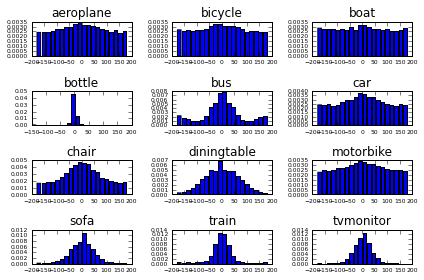

In [58]:
count = 1
print "Distribution of azimuth"
for (key, val) in sorted(pairLabels.items()):
    ax      = plt.subplot(4,3,count)
    azimuth = val[:,0]
    n, bins, patches = plt.hist(azimuth, 20, normed=1, histtype='bar', rwidth=0.8)
    plt.title(key)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)
    count += 1
plt.tight_layout()
    

Distribtuion of Elevations


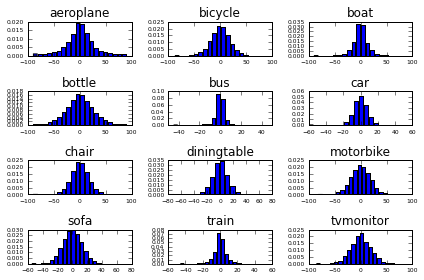

In [59]:
#pairLabels = p3d.get_pair_label_stats(prms, setName='val')
count = 1
fig = plt.figure()
print "Distribtuion of Elevations"
for (key, val) in sorted(pairLabels.items()):
    ax      = plt.subplot(4,3,count)
    elevation = val[:,1]
    n, bins, patches = plt.hist(elevation, 20, normed=1, histtype='bar', rwidth=0.8)
    plt.title(key)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)
    count += 1
plt.tight_layout()

/data1/pulkitag/pascal3d/snapshots/imSz128_lbl-uni-az30el10_crp-contPad16_ns4e+04_mb50/pascal3d_scratch_concat-fc6_iter_50000.caffemodel
Ignoring line: # Autotmatically generated solver prototxt
/data1/pulkitag/pascal3d/snapshots/pascal3d_imSz128_lbl-uni-az30el10_crp-contPad16_ns4e+04_mb50/caffenet_scratch_sup_noRot_fc6_iter_50000.caffemodel
Ignoring line: # Autotmatically generated solver prototxt
/data1/pulkitag/pascal3d/snapshots/pascal3d_imSz128_lbl-uni-az30el10_crp-contPad16_ns4e+04_mb50/caffenet_scratch_unsup_fc6_iter_50000.caffemodel
Ignoring line: # Autotmatically generated solver prototxt
/data1/pulkitag/pascal3d/snapshots/pascal3d_imSz128_lbl-uni-az30el10_crp-contPad16_ns4e+04_mb50/caffenet_scratch_unsup_fc6_drop_iter_50000.caffemodel


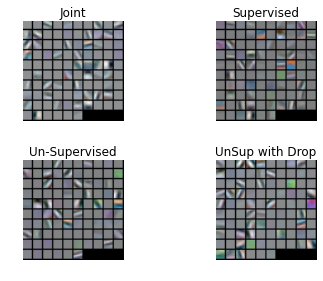

In [24]:
#New training where instead of taking the Medoid of the cluster, I trained on the bins of elevations and azimuth.
# These examples contain information from all boxes whose minimum size > 50px in the original image. 

prms  = p3d.get_exp_prms(cropType='contPad', numSamplesTrain=40000, lblType='uniform')
numIter = 50000
fig = plt.figure()
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

## Get Supervised + rotation loss example
#Unforutnately this was not done programattically :/
snapDir  = '/data1/pulkitag/pascal3d/snapshots/'
modelFile = os.path.join(snapDir, ("imSz128_lbl-uni-az30el10_crp-contPad16_ns4e+04_mb50/pascal3d_scratch_concat-fc6_"
                                   "iter_%d.caffemodel") % numIter)
defFile =   ("/work4/pulkitag-code/pkgs/caffe-v2-2/modelFiles/pascal3d/exp/"
             "imSz128_lbl-uni-az30el10_crp-contPad16_ns4e+04_mb50/caffenet_siamese_fc6.prototxt")
netJoint  = mp.MyNet(defFile, modelFile)
print modelFile
netJoint.vis_weights('conv1', ax=ax1, titleName='Joint')
ax1.axis('off')

#Get the Supervised example. 
cPrms = p3d.get_caffe_prms(isScratch=True, isClassLbl=True, concatLayer='fc6', noRot=True, concatDrop=False)
exp = p3d.get_experiment_object(prms, cPrms)
exp.init_from_self()
modelFile = exp.get_snapshot_name(numIter=numIter)
defFile   = exp.files_['netdef']
netSup    = mp.MyNet(defFile, modelFile)
print modelFile
netSup.vis_weights('conv1', ax=ax2, titleName='Supervised')
ax2.axis('off')

#Get  Unsupervised example. 
cPrms = p3d.get_caffe_prms(isScratch=True, isClassLbl=False, concatLayer='fc6', noRot=False, concatDrop=False)
exp = p3d.get_experiment_object(prms, cPrms)
exp.init_from_self()
modelFile = exp.get_snapshot_name(numIter=numIter)
defFile   = exp.files_['netdef']
netUnsup    = mp.MyNet(defFile, modelFile)
print modelFile
netUnsup.vis_weights('conv1', ax=ax3, titleName='Un-Supervised')
ax3.axis('off')

#Get  Unsupervised example. 
cPrms = p3d.get_caffe_prms(isScratch=True, isClassLbl=False, concatLayer='fc6', noRot=False, concatDrop=True)
exp = p3d.get_experiment_object(prms, cPrms)
exp.init_from_self()
modelFile = exp.get_snapshot_name(numIter=numIter)
defFile   = exp.files_['netdef']
netUnsup    = mp.MyNet(defFile, modelFile)
print modelFile
netUnsup.vis_weights('conv1', ax=ax4, titleName='UnSup with Drop')
ax4.axis('off')
plt.tight_layout()





This is weird that the filters with k-Medoid clustering look so much better than filters obtained with the Euler angle uniform binning. The critical differences between the two approaches is as following:

1. First only considers small rotations (< 30 degrees) and bins all the other rotation into twenty categories. 
2. First uses 0.005 weight std to initialize the FC layers, the latter uses 0.01 for initialization. This was done as with 0.005 init, the second case I was getting all zeros as output in the top layers.
3. First uses pascal only, whereas second used imagenet also. 
4. There is a difference in classes that are bein used. First uses a set of 15 manually chosen classes that are mostly rigid, 12 uses the 12 Rigid objects in pascal3d. The first includes the classes of person, sheep, bird, cow and horse that are ignored by the second. The second has bottle and diningtable which is not there in the first.


Possible things to do:

1. Compare accuracy on an auxiliary dataset - say Caltech101? Any suggestions? 
2. The issue with using less data - should I use the same architecture as the one used by the unsupervised method - which has a lot more training data available? Is that fine? 


In [ ]:
#The visualizations for the picking data. 
#I figured I havent trained a joint model for azimuth and polar angle which works - so this needs to be done. 


In [36]:
#Performance on caltech
ou = reload(ou)
maxLayer    = [1,2,3,4,5,6]
prms = pc.get_prms()
accScratch, accClassScratch = pc.read_accuracy(prms, isPreTrain=False, preTrainStr=None,
                                            isFineLast=True, initLr=0.01)

accPre60K, accClassPre60K = pc.read_accuracy(prms, isPreTrain=True, preTrainStr='rotObjs_kmedoids30_20_iter60K',
                                            isFineLast=True, initLr=0.001)

accPre120K, accClassPre120K = pc.read_accuracy(prms, isPreTrain=True, preTrainStr='rotObjs_kmedoids30_20_nodrop_iter120K',
                                            isFineLast=True, initLr=0.001)

alexPrms = pc.get_prms(imSz=256)
accAlex, accClassAlex = pc.read_accuracy(alexPrms, isPreTrain=True, preTrainStr='alex', isFineLast=True, initLr=0.01)
    
tableArgs = co.OrderedDict([('Layers',range(1,7)), ('Scratch', accClassScratch),
            ('Pre60K', accClassPre60K), ('Pre120K', accClassPre120K), ('Alex', accClassAlex)])
print "Mean Accuracy of classes - Finetune only the last layer."
print '-' * 50
ou.make_table(**tableArgs)


Mean Accuracy of classes - Finetune only the last layer.
--------------------------------------------------
Layers          Scratch         Pre60K          Alex            Pre120K         

---------------------------------------------------------------------------

1               0.395           0.447           0.529           0.429           

2               0.452           0.552           0.699           0.554           

3               0.443           0.538           0.745           0.545           

4               0.438           0.498           0.789           0.560           

5               0.252           0.507           0.860           0.531           

6               0.173           0.397           0.882           0.480           



In [2]:

accClassKit150K = pc.run_pretrain_experiment(preTrainStr='kitti_fc6', addDropLast=True, imSz=256,
                                            isFineLast=True, runType='acc')
print accClassKit150K

[array([ 0.38988385], dtype=float32), array([ 0.4911038], dtype=float32), array([ 0.4985359], dtype=float32), array([ 0.5113256], dtype=float32), array([ 0.53198242], dtype=float32)]


In [17]:
maxLayer    = [1,2,3,4]
prms = pc.get_prms()
accScratch, accClassScratch = pc.read_accuracy(prms, isPreTrain=False, preTrainStr=None,
                                            isFineLast=False, initLr=0.0001, maxLayer=maxLayer)

accPre60K, accClassPre60K = pc.read_accuracy(prms, isPreTrain=True, preTrainStr='rotObjs_kmedoids30_20_iter60K',
                                            isFineLast=False, initLr=0.01, maxLayer=maxLayer)

tableArgs = co.OrderedDict([('Layers',maxLayer), ('Scratch', accClassScratch),
            ('Pre60K', accClassPre60K)])
print "Mean Accuracy of classes - Finetune ALL the layers."
print '-' * 50
ou.make_table(**tableArgs)




IOError: unable to open file (File accessibilty: Unable to open file)

imSz128_ntr30_run0 pre-random_ft-all_mxl-1_inLr1e-04


In [39]:
accClassScratch


array([ 0.49164349,  0.5151068 ], dtype=float32)

Ignoring line: # Autotmatically generated solver prototxt
/data1/pulkitag/caltech101/snapshots/imSz128_ntr30_run0/caffenet_pre-rotObjs_kmedoids30_20_nodrop_iter120K_ft-last_mxl-1_inLr1e-03_iter_5001.caffemodel
Ignoring line: # Autotmatically generated solver prototxt
/data1/pulkitag/caltech101/snapshots/imSz128_ntr30_run0/caffenet_pre-rotObjs_kmedoids30_20_nodrop_iter120K_ft-all_mxl-1_inLr1e-06_inSd1e-03_iter_5001.caffemodel


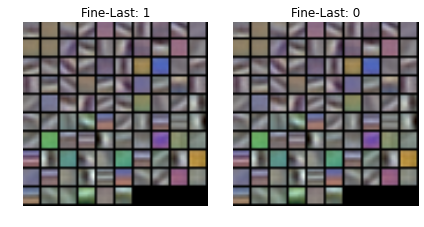

In [8]:
#Visualize weights after finetuning.
prms  = pc.get_prms() 
preTrainStr = 'rotObjs_kmedoids30_20_nodrop_iter120K'
isFineLast  = [True, False]
initLr = [0.001, 0.000001]
initStd = [0.01, 0.001]

for (i,ff) in enumerate(isFineLast):
    cPrms = pc.get_caffe_prms(isPreTrain=True, maxLayer=1,
                          preTrainStr=preTrainStr, isFineLast=ff,
                           initLr=initLr[i], initStd=initStd[i], testNum=None)
    ax = plt.subplot(1,len(isFineLast),i+1)
    exp = pc.get_experiment_object(prms, cPrms)
    exp.init_from_self()
    modelFile = exp.get_snapshot_name(numIter=5001)
    defFile   = exp.files_['netdef']
    netUnsup    = mp.MyNet(defFile, modelFile)
    print modelFile
    netUnsup.vis_weights('conv1',ax=ax, titleName='Fine-Last: %d' % ff)
    ax.axis('off')
plt.tight_layout()



## Current Thoughts 
One thing which is still unclear is what is the best way of supervision to train the networks.
Should it be regression, classification, within classification should it be predicting uniformaly across all bins, 
or limit the amount of transformation or something else? I have experiments with:

1. Regression - seems to be hard to train. 
2. Classifying euler angles uniformly -- seems to produce a lot of dead filters.
3. K-Medoid clustering only on objects within 30 degrees seems to produce the best filters at the moment. 
4. Now, I am going to try to predict the euler angles seperately but within 30 degrees only. 


All lines already read
[ 0.15122222  0.04547222  0.05127778  0.06038889  0.07338889  0.12858333
  0.1125      0.07088889  0.05988889  0.05086111  0.04402778  0.02777778
  0.12372222]


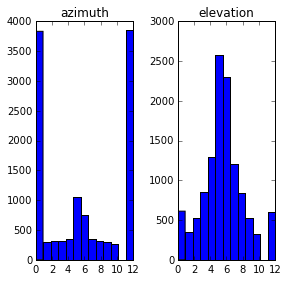

In [16]:
prms  = p3d.get_exp_prms(imSz=256, lblType='rotLim', numSamplesTrain=1e+05, azBin=6, elBin=6)
names = ['azimuth', 'elevation'] 
#Distribution in the val set
gen    = mpio.GenericWindowReader(prms['paths']['windowFile']['val'])
lbls   = gen.get_all_labels()
fig = plt.figure()
for i in range(2):
    ax = plt.subplot(1,lbls.shape[1], i+1)
    plt.hist(lbls[:,i], len(prms['azBinRange']) + 2)
    plt.title(names[i])
plt.tight_layout()
count = ou.count_unique(lbls, 12)
print count/sum(count)


All lines already read


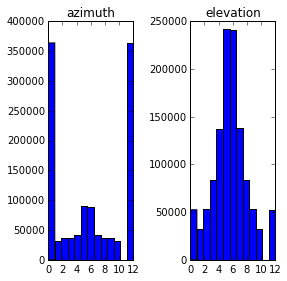

In [12]:
#Distribution in the val set
gen    = mpio.GenericWindowReader(prms['paths']['windowFile']['train'])
lbls   = gen.get_all_labels()
fig = plt.figure()
for i in range(2):
    ax = plt.subplot(1,lbls.shape[1], i+1)
    plt.hist(lbls[:,i], len(prms['azBinRange']) + 2)
    plt.title(names[i])
plt.tight_layout()

Ignoring line: # reduce learning rate after 120 epochs (60000 iters) by factor 0f 10
Ignoring line: # then another factor of 10 after 10 more epochs (5000 iters)
Skipping empty line:  
Ignoring line: # The train/test net protocol buffer definition
Ignoring line: # test_iter specifies how many forward passes the test should carry out.
Ignoring line: # In the case of CIFAR10, we have test batch size 100 and 100 test iterations,
Ignoring line: # covering the full 10,000 testing images.
Ignoring line: # Carry out testing every 1000 training iterations.
Ignoring line: # The base learning rate, momentum and the weight decay of the network.
Ignoring line: # The learning rate policy
Ignoring line: # Display every 200 iterations
Ignoring line: # The maximum number of iterations
Ignoring line: # snapshot intermediate results
Ignoring line: # solver mode: CPU or GPU


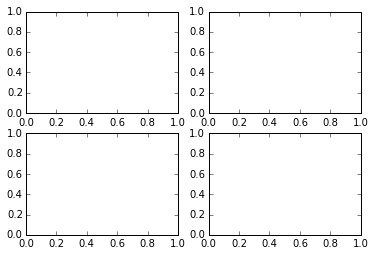

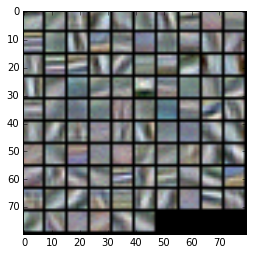

In [16]:
prms  = p3d.get_exp_prms(cropType='contPad', numSamplesTrain=100000, lblType='rotLim', azBin=6, elBin=6)
numIter = 60000
fig = plt.figure()
ax = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
cPrms = p3d.get_caffe_prms(isClassLbl=False)
p3d.vis_weights(prms, cPrms, numIter)



In [2]:
#SF City dataset
#Get the statistics of rotations and translations
prms = pci.get_prms()
_,_,euler, translation = pci.read_pairs(prms)
#Euler angles
euler = np.array([np.array(eu) for eu in euler])

Distribution of Euler angles


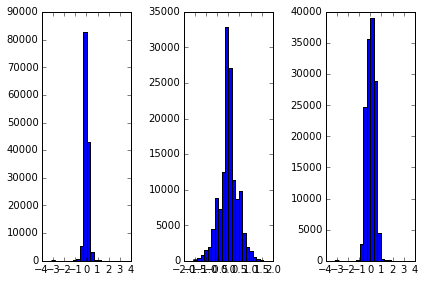

In [11]:
print "Distribution of Euler angles"
fig = plt.figure()
for i in range(3):
    ax = plt.subplot(1,euler.shape[1], i+1)
    plt.hist(euler[:,i], 20)
plt.tight_layout()

Distribution of Translation


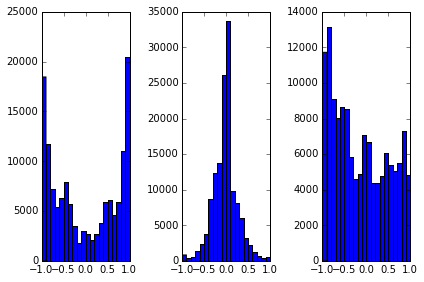

In [13]:
print "Distribution of Translation"
trns = np.array(translation)
fig = plt.figure()
for i in range(3):
    ax = plt.subplot(1,trns.shape[1], i+1)
    plt.hist(trns[:,i], 20)
plt.tight_layout()

All lines already read
[  9.   9.   9.  11.  11.  11.]
[ 1.  1.  1.  0.  0.  0.]
Translation
Rotation


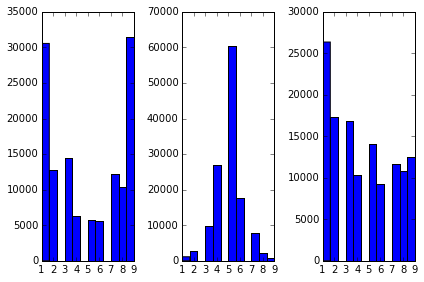

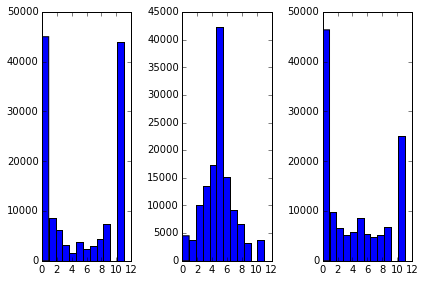

In [8]:
#Get the statistics of labels in the window file.
trnFile = mpio.GenericWindowReader(prms['paths']['windowFile']['train'])
lbls    = trnFile.get_all_labels()
fig = plt.figure()
print np.max(lbls, axis=0)
print np.min(lbls, axis=0)
print 'Translation'
for i in range(3):
    ax = plt.subplot(1,3, i+1)
    plt.hist(lbls[:,i],12)
plt.tight_layout()
print 'Rotation'
fig = plt.figure()
for i in range(3):
    ax = plt.subplot(1,3, i+1)
    plt.hist(lbls[:,i+3],12)
plt.tight_layout()


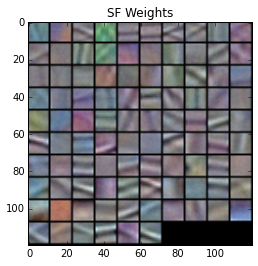

In [10]:
numIter = 40000
cPrms = pci.get_caffe_prms(concatLayer='conv5', convConcat=True, contextPad=16)
exp   = pci.get_experiment_object(prms, cPrms)
defFile = '/work4/pulkitag-code/pkgs/caffe-v2-2/modelFiles/kitti/base_files/kitti_conv1.prototxt'
exp.init_from_external(cPrms['solver'], defFile)
modelName = exp.get_snapshot_name(numIter)
net    = mp.MyNet(defFile, modelName)
ax1 = plt.subplot(1,1,1)
net.vis_weights('conv1', ax=ax1, titleName='SF Weights')
